# Library Preparation

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import skfuzzy as fuzz
import statsmodels.formula.api as smf

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Data Wrangling and Preprocessing

In [226]:
import os
import zipfile
import glob


# for file in glob.glob('zip_dataset/*.zip'):
#   print(file)
#   with zipfile.ZipFile(file, 'r') as zip_ref:
#     zip_ref.extractall('metadata')

In [227]:
def wrangling_data(dataset_type: str):
  wragled_data = pd.DataFrame()

  for folder in os.listdir('metadata'):
    if os.path.isdir(os.path.join('metadata', folder)):
      for file in os.listdir(f'metadata/{folder}'):
        if dataset_type in file and file.endswith('.csv'):
          data = pd.read_csv(f'metadata/{folder}/{file}')

          if dataset_type in ('produksi',):
            file_name = '_'.join(file.split('_')[3:-3])
            data = data[data['tahun'] >= 2015].drop_duplicates(['nama_kabupaten_kota', 'tahun'], keep='last')
            data = data.rename(
              columns={col: col.split('_')[0] + '_' + file_name for col in data.columns if col.startswith('produksi')})
          
          if dataset_type in ('luas_areal_tanam', 'luas_panen'):
            col_name = '_'.join(file.split("_")[2:-3])
            data.rename(columns={data.columns[5]: col_name}, inplace=True)

          if wragled_data.empty:
            wragled_data = data
            col_data = wragled_data.iloc[:, 5:6]
            wragled_data = wragled_data.drop(col_data, axis=1)
            wragled_data = pd.concat([wragled_data.reset_index(drop=True), col_data.reset_index(drop=True)], axis=1)
          else:
            column_name = [col for col in data.columns if dataset_type in col][0]
            data = data[[column_name]]
            wragled_data = pd.concat([wragled_data.reset_index(drop=True), data.reset_index(drop=True)], axis=1)

  return wragled_data

In [228]:
dataset_produktivitas = wrangling_data('produktivitas')
dataset_produktivitas.head()

id  kode_provinsi nama_provinsi  kode_kabupaten_kota nama_kabupaten_kota  \
0   1             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
1   2             32    JAWA BARAT                 3202  KABUPATEN SUKABUMI   
2   3             32    JAWA BARAT                 3203   KABUPATEN CIANJUR   
3   4             32    JAWA BARAT                 3204   KABUPATEN BANDUNG   
4   5             32    JAWA BARAT                 3205     KABUPATEN GARUT   

               satuan  tahun  produktivitas_kedelai  \
0  KUINTAL PER HEKTAR   2015                   0.00   
1  KUINTAL PER HEKTAR   2015                  14.16   
2  KUINTAL PER HEKTAR   2015                  12.30   
3  KUINTAL PER HEKTAR   2015                  17.47   
4  KUINTAL PER HEKTAR   2015                  16.43   

   produktivitas_kacang_tanah  produktivitas_kacang_hijau  \
0                       16.29                       10.77   
1                       24.94                       10.83   
2                       17.14                       10.73   
3                       10.15                        0.00   
4                       19.38                       12.30   

   produktivitas_ubi_kayu  produktivitas_ubi_jalar  
0                  249.14                   216.00  
1                  311.83                   164.22  
2                  239.30                   140.26  
3                  163.03                   146.00  
4                  245.53                   154.64

In [229]:
dataset_produksi = wrangling_data('produksi')
dataset_produksi

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0     53             32    JAWA BARAT                 3201   
1     54             32    JAWA BARAT                 3202   
2     55             32    JAWA BARAT                 3203   
3     56             32    JAWA BARAT                 3204   
4     57             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  238             32    JAWA BARAT                 3275   
185  239             32    JAWA BARAT                 3276   
186  240             32    JAWA BARAT                 3277   
187  241             32    JAWA BARAT                 3278   
188  242             32    JAWA BARAT                 3279   

    nama_kabupaten_kota satuan  tahun  produksi_ubi_kayu  produksi_ubi_jalar  \
0       KABUPATEN BOGOR    TON   2015             132519               72144   
1    KABUPATEN SUKABUMI    TON   2015             232715               14665   
2     KABUPATEN CIANJUR    TON   2015             147842               12708   
3     KABUPATEN BANDUNG    TON   2015              89553               21330   
4       KABUPATEN GARUT    TON   2015             629404               98444   
..                  ...    ...    ...                ...                 ...   
184         KOTA BEKASI    TON   2021                896                   0   
185          KOTA DEPOK    TON   2021                513                 103   
186         KOTA CIMAHI    TON   2021               1076                 149   
187    KOTA TASIKMALAYA    TON   2021               2843                 393   
188         KOTA BANJAR    TON   2021               3574                 425   

     produksi_kedelai  produksi_kacang_tanah  produksi_kacang_hijau  
0                   0                   1445                     14  
1                9365                  12223                   1132  
2                9905                  17239                    339  
3                 760                   1068                      0  
4               21433                  32551                   1326  
..                ...                    ...                    ...  
184                 0                      0                      0  
185                 0                     11                      0  
186                 0                     19                      0  
187                21                    146                      0  
188               232                    155                     63  

[189 rows x 12 columns]

In [230]:
dataset_luas_areal_tanam = wrangling_data('luas_areal_tanam')
dataset_luas_areal_tanam

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  185             32    JAWA BARAT                 3275   
185  186             32    JAWA BARAT                 3276   
186  187             32    JAWA BARAT                 3277   
187  188             32    JAWA BARAT                 3278   
188  189             32    JAWA BARAT                 3279   

    nama_kabupaten_kota  satuan  tahun  luas_areal_tanam_kacang_hijau  \
0       KABUPATEN BOGOR  HEKTAR   2015                             13   
1    KABUPATEN SUKABUMI  HEKTAR   2015                           1045   
2     KABUPATEN CIANJUR  HEKTAR   2015                            316   
3     KABUPATEN BANDUNG  HEKTAR   2015                              0   
4       KABUPATEN GARUT  HEKTAR   2015                           1128   
..                  ...     ...    ...                            ...   
184         KOTA BEKASI  HEKTAR   2021                              0   
185          KOTA DEPOK  HEKTAR   2021                              0   
186         KOTA CIMAHI  HEKTAR   2021                              0   
187    KOTA TASIKMALAYA  HEKTAR   2021                              0   
188         KOTA BANJAR  HEKTAR   2021                             41   

     luas_areal_tanam_ubi_kayu  luas_areal_tanam_ubi_jalar  \
0                         4494                        3306   
1                         7850                         865   
2                         6503                         848   
3                         5168                        1481   
4                        24691                        6274   
..                         ...                         ...   
184                         32                           0   
185                         16                           6   
186                         60                          12   
187                         63                          16   
188                         98                          74   

     luas_areal_tanam_kedelai  luas_areal_tanam_kacang_tanah  
0                          89                            844  
1                        8075                           4926  
2                        8588                          10048  
3                         422                           1055  
4                       13401                          16805  
..                        ...                            ...  
184                         0                              0  
185                         0                              9  
186                         0                             13  
187                       101                             96  
188                       200                            122  

[189 rows x 12 columns]

In [231]:
dataset_luas_panen = wrangling_data('luas_panen')
dataset_luas_panen

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  185             32    JAWA BARAT                 3275   
185  186             32    JAWA BARAT                 3276   
186  187             32    JAWA BARAT                 3277   
187  188             32    JAWA BARAT                 3278   
188  189             32    JAWA BARAT                 3279   

    nama_kabupaten_kota  satuan  tahun  luas_panen_kedelai  \
0       KABUPATEN BOGOR  HEKTAR   2015                   0   
1    KABUPATEN SUKABUMI  HEKTAR   2015                6614   
2     KABUPATEN CIANJUR  HEKTAR   2015                8052   
3     KABUPATEN BANDUNG  HEKTAR   2015                 435   
4       KABUPATEN GARUT  HEKTAR   2015               13045   
..                  ...     ...    ...                 ...   
184         KOTA BEKASI  HEKTAR   2021                   0   
185          KOTA DEPOK  HEKTAR   2021                   0   
186         KOTA CIMAHI  HEKTAR   2021                   0   
187    KOTA TASIKMALAYA  HEKTAR   2021                  18   
188         KOTA BANJAR  HEKTAR   2021                 198   

     luas_panen_kacang_tanah  luas_panen_kacang_hijau  luas_panen_ubi_kayu  \
0                        887                       13                 5319   
1                       4901                     1045                 7463   
2                      10056                      316                 6178   
3                       1052                        0                 5493   
4                      16798                     1078                25635   
..                       ...                      ...                  ...   
184                        0                        0                   28   
185                        7                        0                   20   
186                       14                        0                   37   
187                       96                        0                   92   
188                      124                       56                  112   

     luas_panen_ubi_jalar  
0                    3340  
1                     893  
2                     906  
3                    1461  
4                    6366  
..                    ...  
184                     0  
185                     4  
186                    11  
187                    17  
188                    74  

[189 rows x 12 columns]

In [232]:
# eksport all dataset to csv
dataset_produktivitas.to_csv('dataset_produktivitas.csv', index=False)
dataset_produksi.to_csv('dataset_produksi.csv', index=False)
dataset_luas_areal_tanam.to_csv('dataset_luas_areal_tanam.csv', index=False)
dataset_luas_panen.to_csv('dataset_luas_panen.csv', index=False)

In [233]:
# concat all dataset and remove satuan column
cwd = os.getcwd()
all_dataset = pd.DataFrame()

for file in os.listdir(cwd):
  if file.endswith('.csv') and file.startswith('dataset'):
    data = pd.read_csv(file)
    if all_dataset.empty:
      all_dataset = data
      all_dataset.drop('satuan', axis=1, inplace=True)
    else:
      all_dataset = pd.concat([all_dataset, data.iloc[:,6:]], axis=1)

all_dataset.to_csv('all_dataset.csv', index=False)

# Exploratory Data Analysis

In [234]:
data = pd.read_csv('all_dataset.csv')

for col in data.columns:
  if 'tahun.' in col:
    data.drop(col, axis=1, inplace=True)

data

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  185             32    JAWA BARAT                 3275   
185  186             32    JAWA BARAT                 3276   
186  187             32    JAWA BARAT                 3277   
187  188             32    JAWA BARAT                 3278   
188  189             32    JAWA BARAT                 3279   

    nama_kabupaten_kota  tahun  luas_areal_tanam_kacang_hijau  \
0       KABUPATEN BOGOR   2015                             13   
1    KABUPATEN SUKABUMI   2015                           1045   
2     KABUPATEN CIANJUR   2015                            316   
3     KABUPATEN BANDUNG   2015                              0   
4       KABUPATEN GARUT   2015                           1128   
..                  ...    ...                            ...   
184         KOTA BEKASI   2021                              0   
185          KOTA DEPOK   2021                              0   
186         KOTA CIMAHI   2021                              0   
187    KOTA TASIKMALAYA   2021                              0   
188         KOTA BANJAR   2021                             41   

     luas_areal_tanam_ubi_kayu  luas_areal_tanam_ubi_jalar  \
0                         4494                        3306   
1                         7850                         865   
2                         6503                         848   
3                         5168                        1481   
4                        24691                        6274   
..                         ...                         ...   
184                         32                           0   
185                         16                           6   
186                         60                          12   
187                         63                          16   
188                         98                          74   

     luas_areal_tanam_kedelai  luas_areal_tanam_kacang_tanah  \
0                          89                            844   
1                        8075                           4926   
2                        8588                          10048   
3                         422                           1055   
4                       13401                          16805   
..                        ...                            ...   
184                         0                              0   
185                         0                              9   
186                         0                             13   
187                       101                             96   
188                       200                            122   

     luas_panen_kedelai  luas_panen_kacang_tanah  luas_panen_kacang_hijau  \
0                     0                      887                       13   
1                  6614                     4901                     1045   
2                  8052                    10056                      316   
3                   435                     1052                        0   
4                 13045                    16798                     1078   
..                  ...                      ...                      ...   
184                   0                        0                        0   
185                   0                        7                        0   
186                   0                       14                        0   
187                  18                       96                        0   
188                 198                      124                       56   

     luas_panen_ubi_kayu  luas_panen_ubi_

## Descriptive Statistics

In [273]:
pd.set_option('display.max_columns', 100)
data.iloc[:, 6:].describe()

luas_areal_tanam_kacang_hijau  luas_areal_tanam_ubi_kayu  \
count                     189.000000                 189.000000   
mean                      282.746032                2324.973545   
std                       544.860541                4425.640436   
min                         0.000000                   0.000000   
25%                         0.000000                  39.000000   
50%                        37.000000                 223.000000   
75%                       202.000000                3096.000000   
max                      2736.000000               25594.000000   

       luas_areal_tanam_ubi_jalar  luas_areal_tanam_kedelai  \
count                  189.000000                189.000000   
mean                   772.640212               2017.470899   
std                   1471.579401               4273.344078   
min                      0.000000                  0.000000   
25%                     13.000000                  0.000000   
50%                    132.000000                308.000000   
75%                    710.000000               1751.000000   
max                   6656.000000              29785.000000   

       luas_areal_tanam_kacang_tanah  luas_panen_kedelai  \
count                     189.000000          189.000000   
mean                     1158.661376         1920.904762   
std                      2706.712356         4164.402326   
min                         0.000000            0.000000   
25%                        22.000000            0.000000   
50%                       192.000000          255.000000   
75%                       814.000000         1659.000000   
max                     17379.000000        27920.000000   

       luas_panen_kacang_tanah  luas_panen_kacang_hijau  luas_panen_ubi_kayu  \
count               189.000000               189.000000           189.000000   
mean               1155.883598               279.248677          2348.370370   
std                2700.527503               547.207472          4435.238102   
min                   0.000000                 0.000000             0.000000   
25%                  25.000000                 0.000000            38.000000   
50%                 182.000000                32.000000           237.000000   
75%                 809.000000               192.000000          2924.000000   
max               17223.000000              2736.000000         26134.000000   

       luas_panen_ubi_jalar  produksi_ubi_kayu  produksi_ubi_jalar  \
count            189.000000         189.000000          189.000000   
mean             773.306878       63140.947090        17779.645503   
std             1475.740572      119907.167643        36706.562909   
min                0.000000           0.000000            0.000000   
25%               14.000000         818.000000          162.000000   
50%              135.000000        5748.000000         2181.000000   
75%              712.000000       81136.000000        13502.000000   
max             6727.000000      752894.000000       196334.000000   

       produksi_kedelai  produksi_kacang_tanah  produksi_kacang_hijau  \
count        189.000000             189.000000             189.000000   
mean        3013.158730            1865.772487             343.417989   
std         6427.495074            4704.900246             691.217681   
min            0.000000               0.000000               0.000000   
25%            0.000000              26.000000               0.000000   
50%          386.000000             282.000000              48.000000   
75%         2978.000000            1199.000000             255.000000   
max        41351.000000           33508.000000            4450.000000   

       produktivitas_kedelai  produktivitas_kacang_tanah  \
count             189.000000                  189.000000   
mean               10.399101                   12.927354   
std                 7.779802                    5.882249   
min                 0.000000                

## Heatmap Plot Produktivitas, Produksi, Luas Areal Tanam, dan Luas Panen Provinsi Jawa Barat

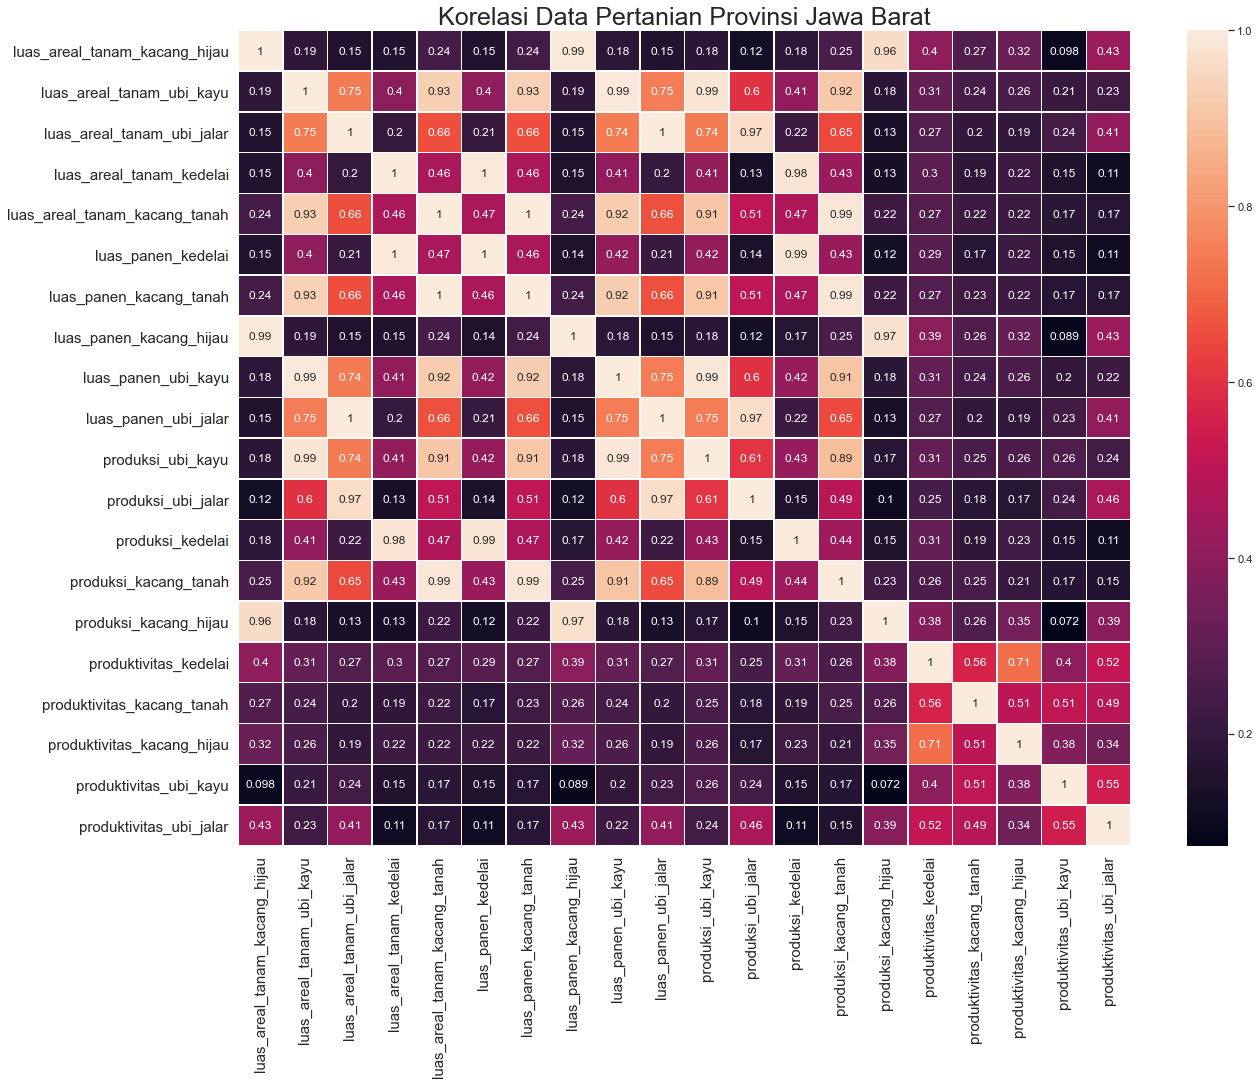

In [236]:
corr_data = data.iloc[:, 6:].corr()

plt.figure(figsize=(20,15))
sns.heatmap(
  data=corr_data,
  annot=True,
  linewidth=.5)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'Korelasi Data Pertanian Provinsi Jawa Barat', fontsize=25)
plt.show()

In [237]:
class Plotter:
  def __init__(self, data: pd.DataFrame):
    self.data = data

  def create_plot(self, col: str, satuan_col: str = "", type_plot: str = "", data_showed: int = 5):

    sorted_index = self.data.groupby('nama_kabupaten_kota').mean(numeric_only=True).sort_values(by=col, ascending=False).index

    sorted_plot_data = self.data.copy().set_index('nama_kabupaten_kota').loc[sorted_index].reset_index()

    col_title = col.replace('_', ' ').title()
    plt.figure(figsize=(20, 15))
    sns.set_theme()

    if type_plot == 'line':
      sns.lineplot(
        x='tahun', 
        y=col, 
        markers=True,
        data=self.data)
      plt.xlabel('Tahun', fontsize=20)

    elif type_plot == 'box':
      sns.boxplot(
        x='nama_kabupaten_kota',
        y=col,
        showmeans=True,
        meanprops={"marker":"o",
                  "markerfacecolor":"white",
                  "markeredgecolor":"black",
                  "markersize":"12"},
        data=sorted_plot_data)
      plt.axhline(self.data[col].mean(), color='r', linestyle='--', linewidth=3)
      plt.xticks(rotation=90)

    elif type_plot == 'grouped-bar':
      top_kabupaten_kota = sorted_plot_data['nama_kabupaten_kota'].unique()[:data_showed]

      sns.barplot(
        x=col,
        y='nama_kabupaten_kota',
        hue='tahun',
        orient='h',
        data=sorted_plot_data[sorted_plot_data['nama_kabupaten_kota'].isin(top_kabupaten_kota)])

    else:
      raise ValueError('type_plot must be in ["line", "box", "grouped-bar"]')

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True, color='grey', linestyle='--', linewidth=0.5)

    title = ""
    xlable = ""
    ylable = ""

    if type_plot == 'line':
      xlable = 'Tahun'
      ylable = f'{col_title} ({satuan_col})'
      title = f'Tren {col_title} di Provinsi Jawa Barat Tahun 2015-2021'
    elif type_plot == 'box':
      xlable = 'Kabupaten/Kota'
      ylable = f'{col_title} ({satuan_col})'
      title = f'Rata-Rata {col_title} di Provinsi Jawa Barat Tahun 2015-2021 Berdasarkan Kabupaten/Kota'
    elif type_plot == 'grouped-bar':
      xlable = f'{col_title} ({satuan_col})'
      ylable = 'Kabupaten/Kota'
      title = f'Top 5 Rata-Rata {col_title} di Provinsi Jawa Barat Berdasarkan Tahun'

    plt.title(title, fontsize=25)
    plt.xlabel(xlable, fontsize=20)
    plt.ylabel(ylable, fontsize=20)
    plt.show()

plotter = Plotter(data)

## Box Plot Rata-Rata Data Produktivitas, Produksi, Luas Areal Tanam, dan Luas Panen Provinsi Jawa Barat Berdasarkan Kabupaten Kota Tahun 2015-2019

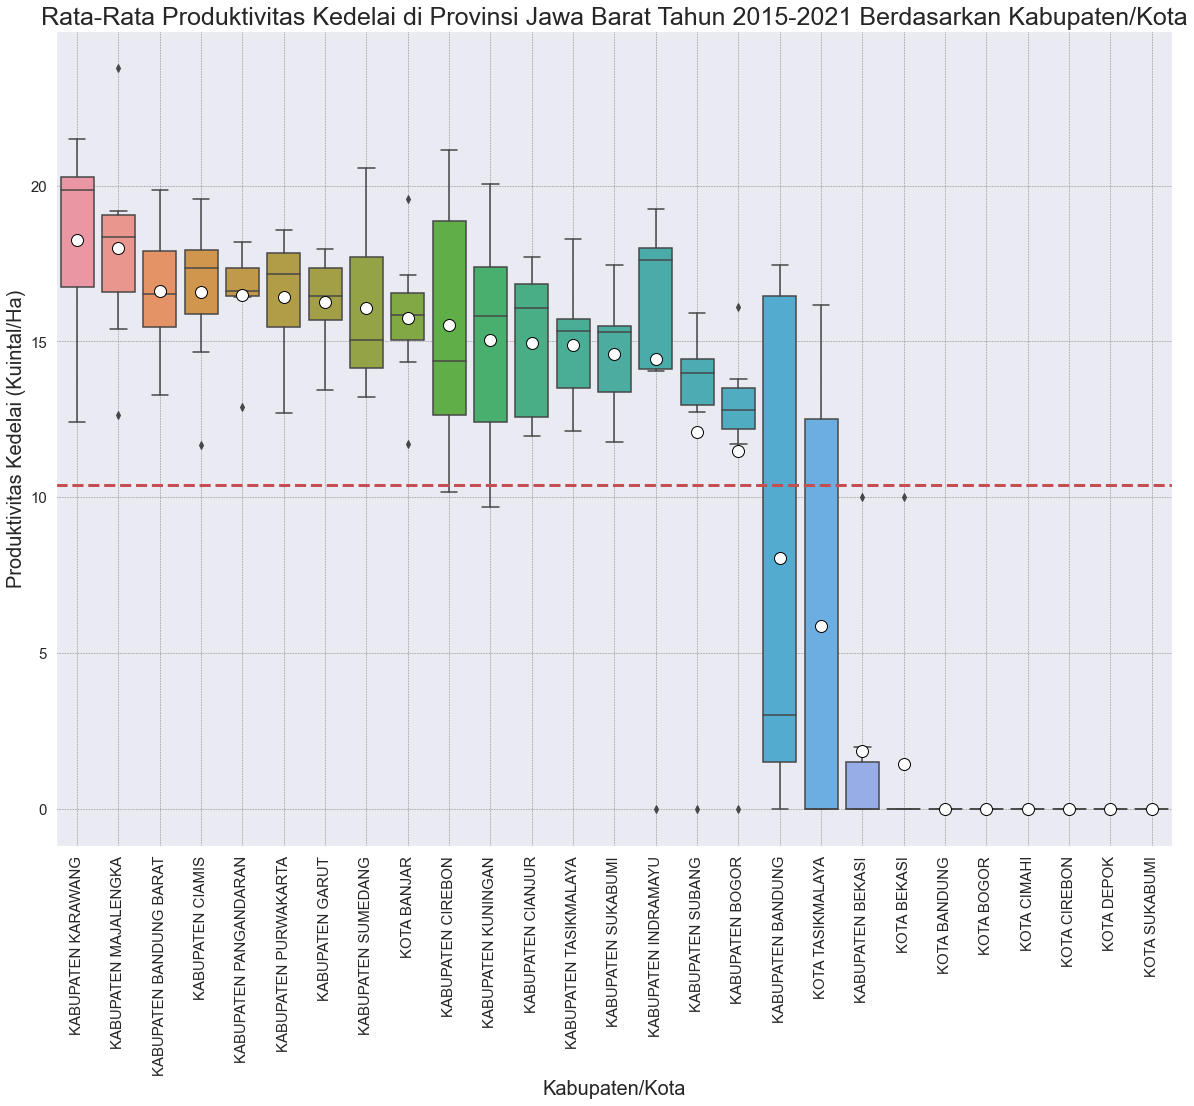

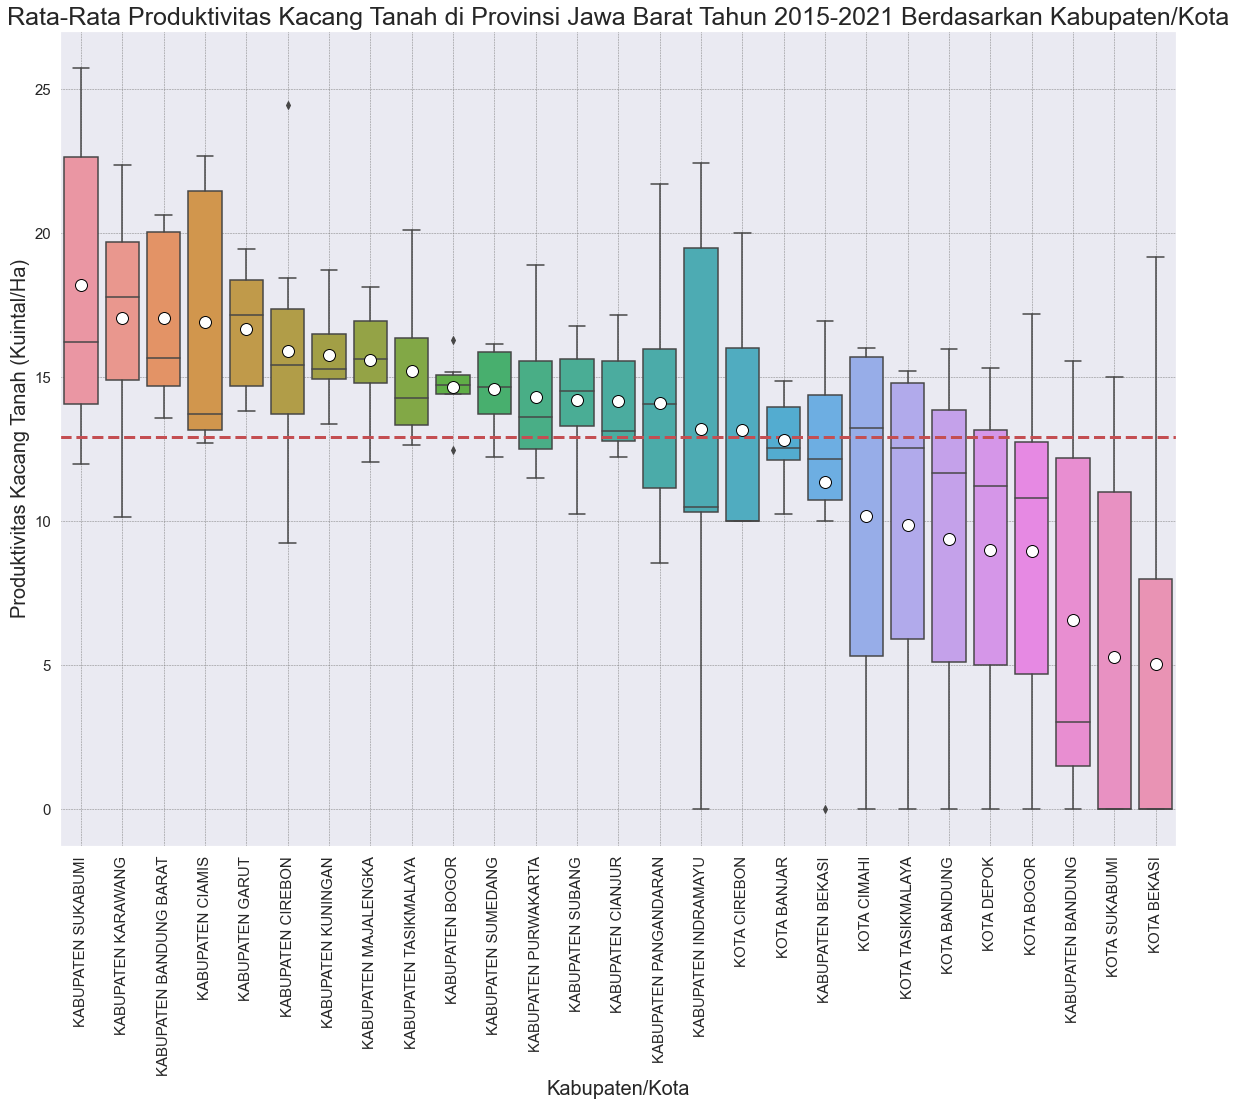

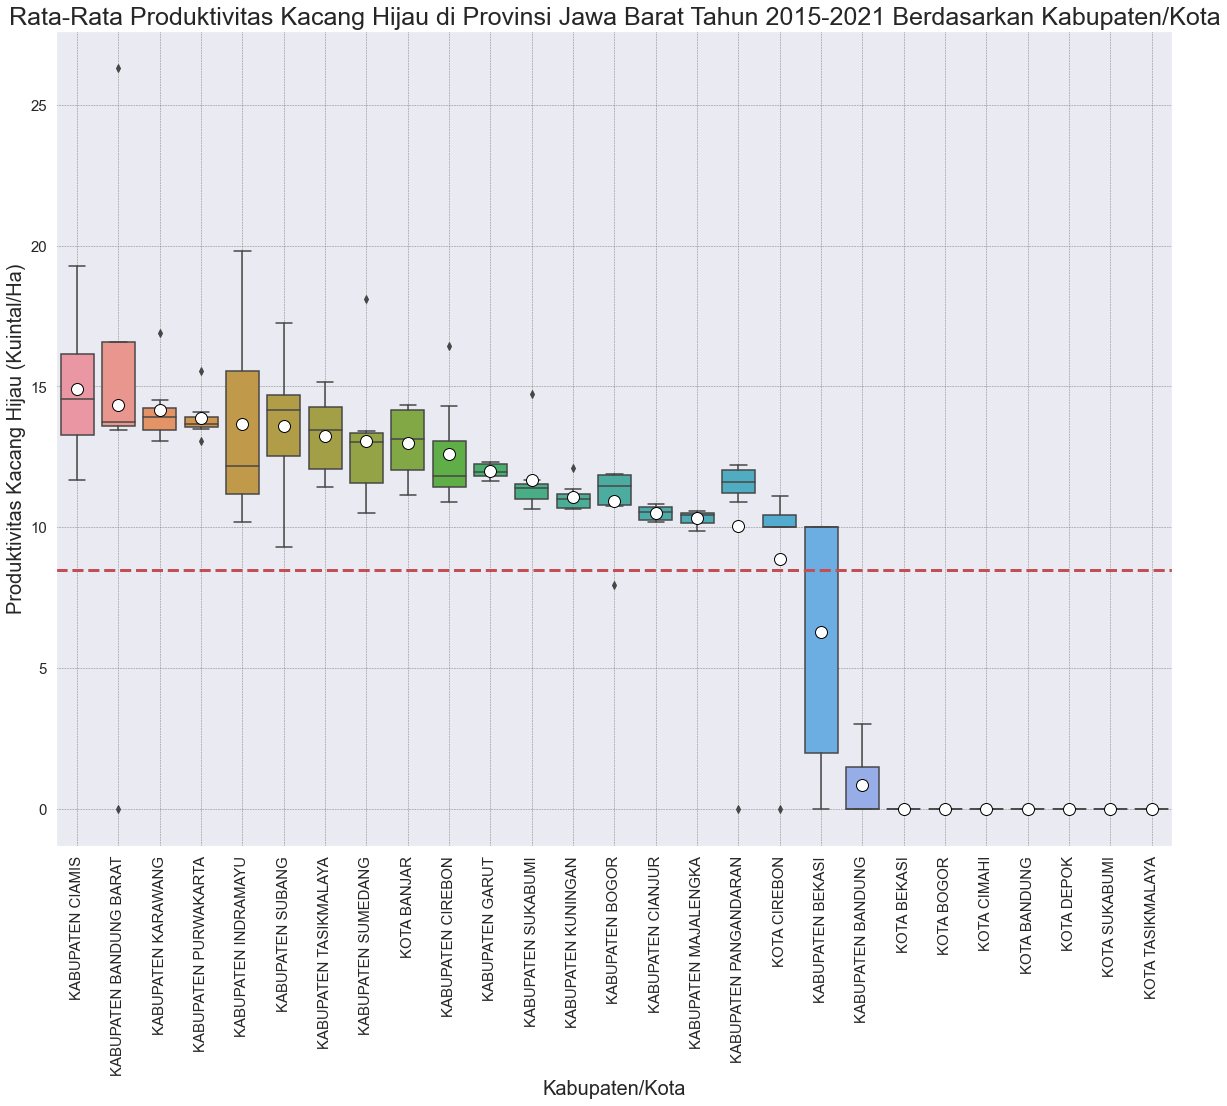

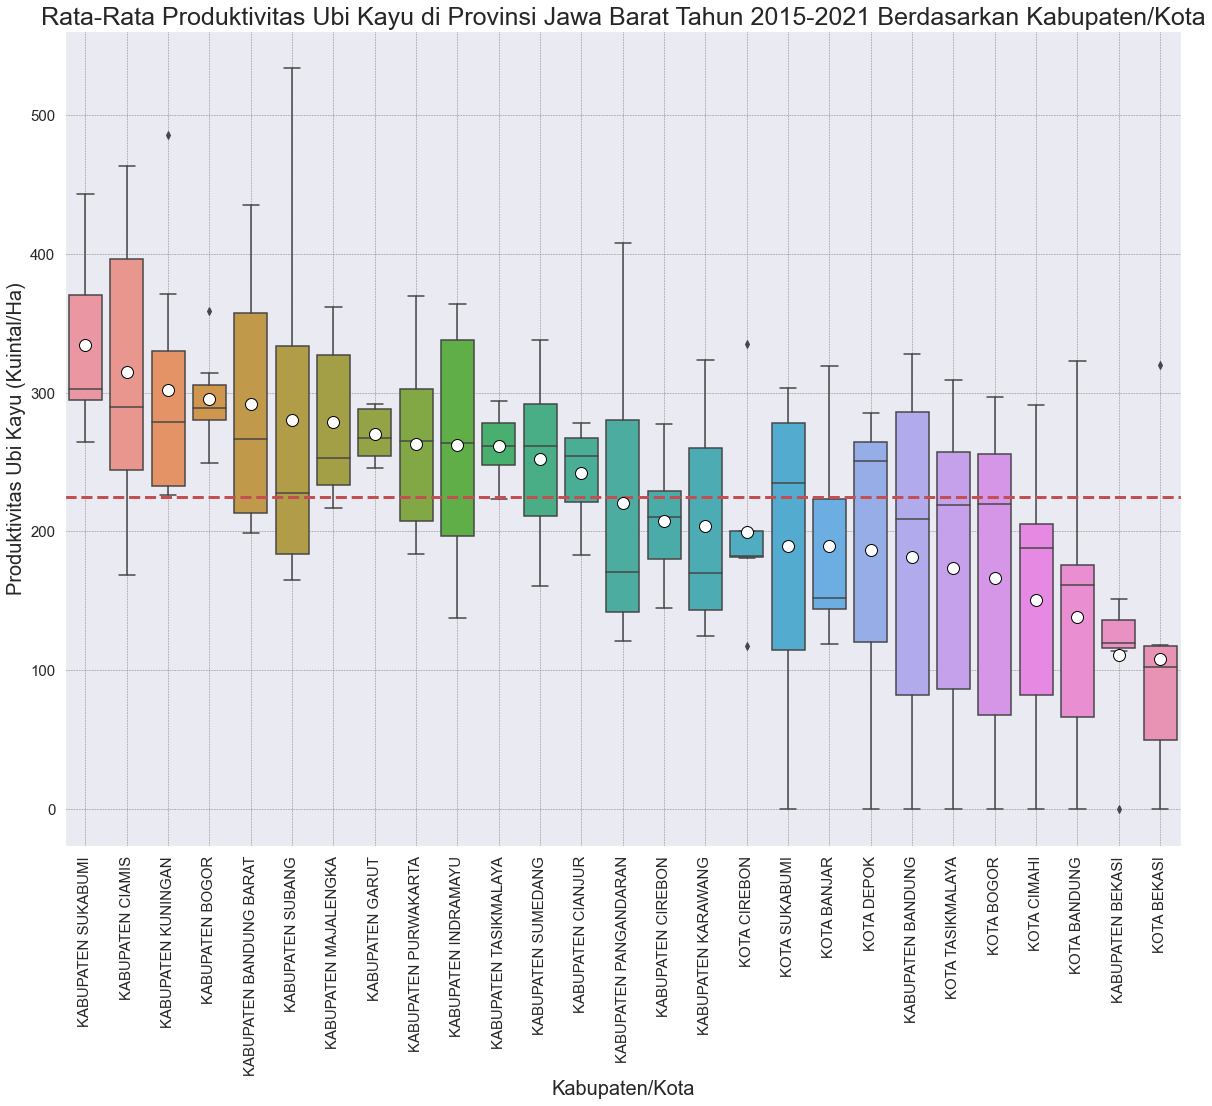

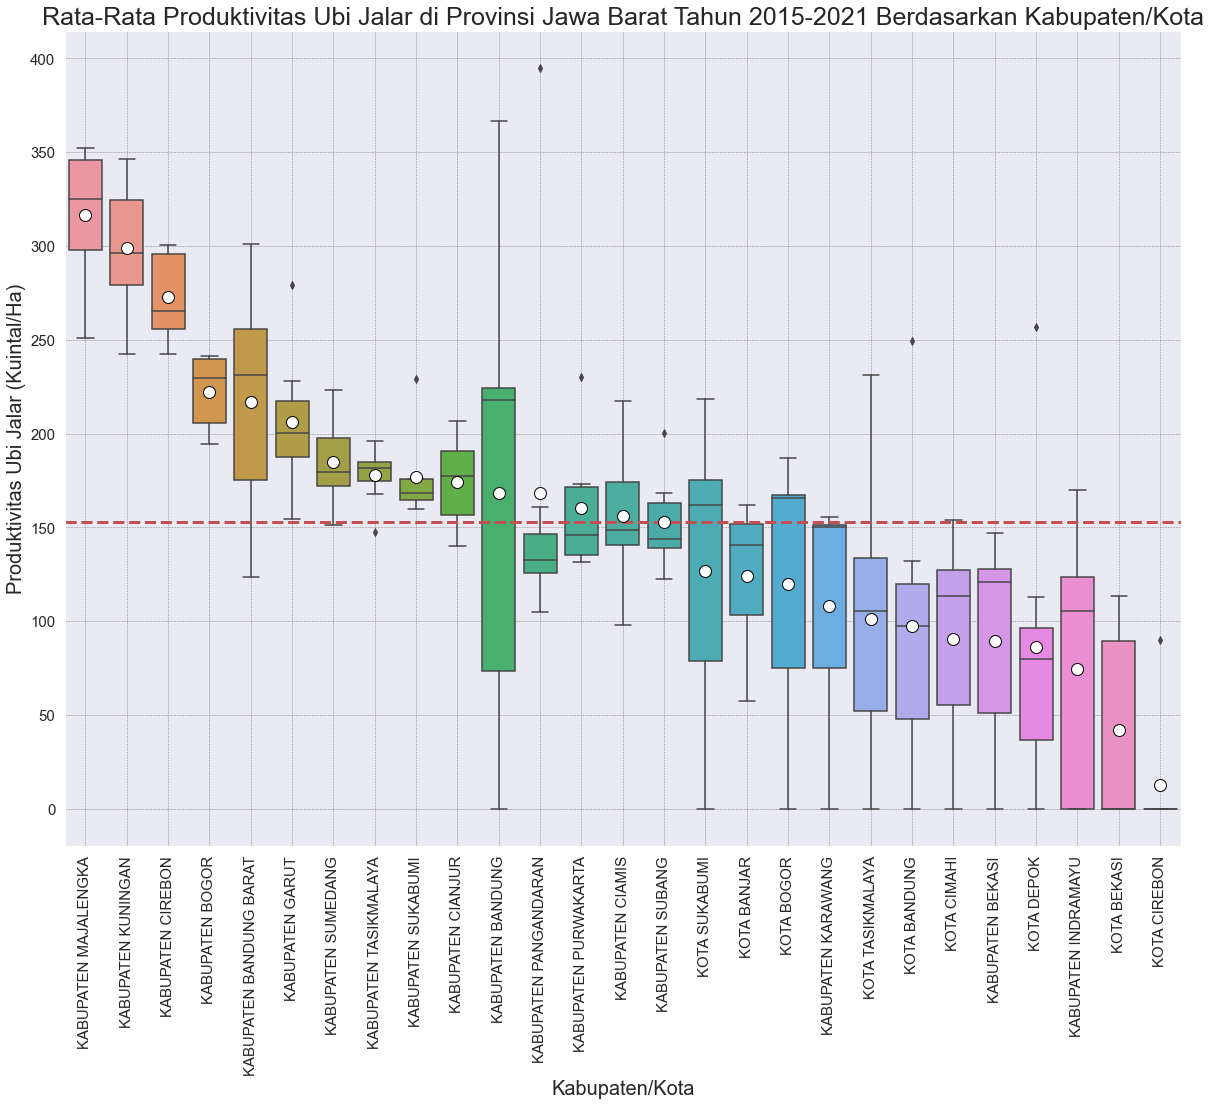

In [238]:
for col in data.columns[6:]:
  if 'produktivitas' in col:
    plotter.create_plot(col, 'Kuintal/Ha', 'box')

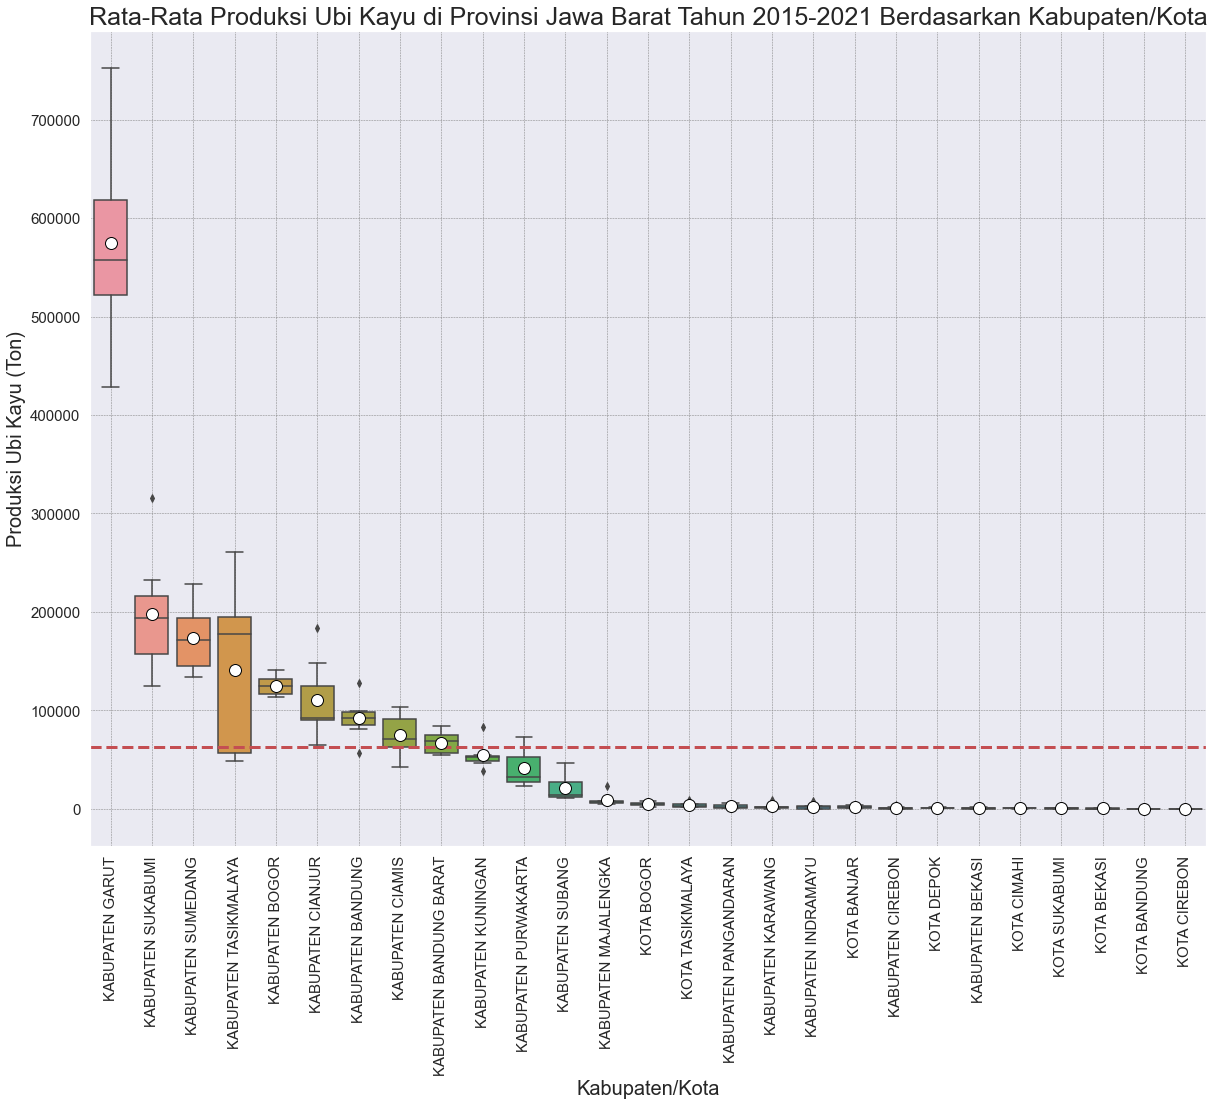

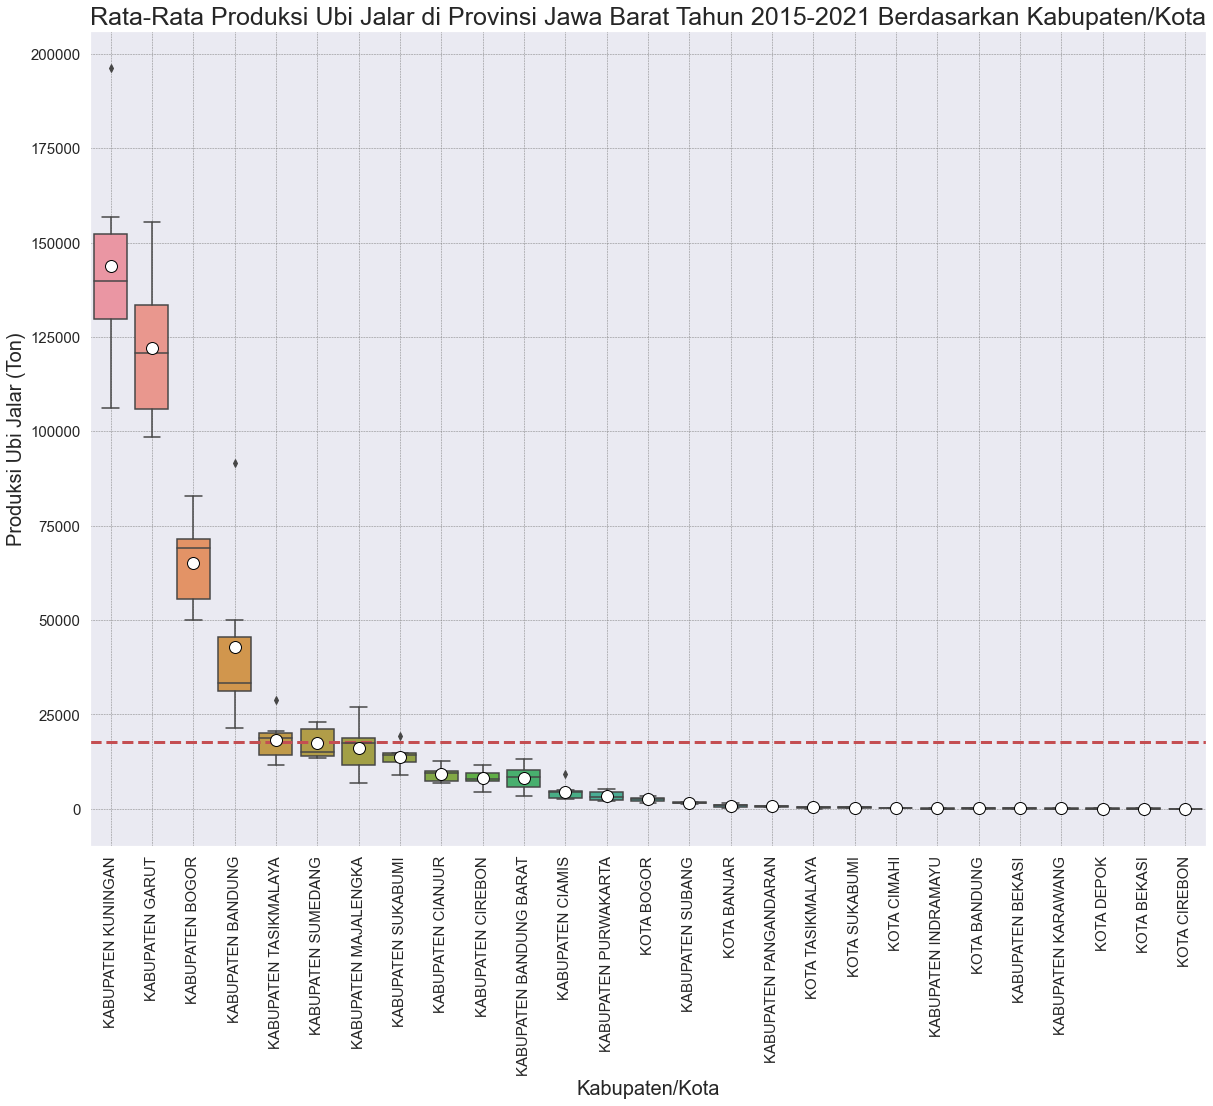

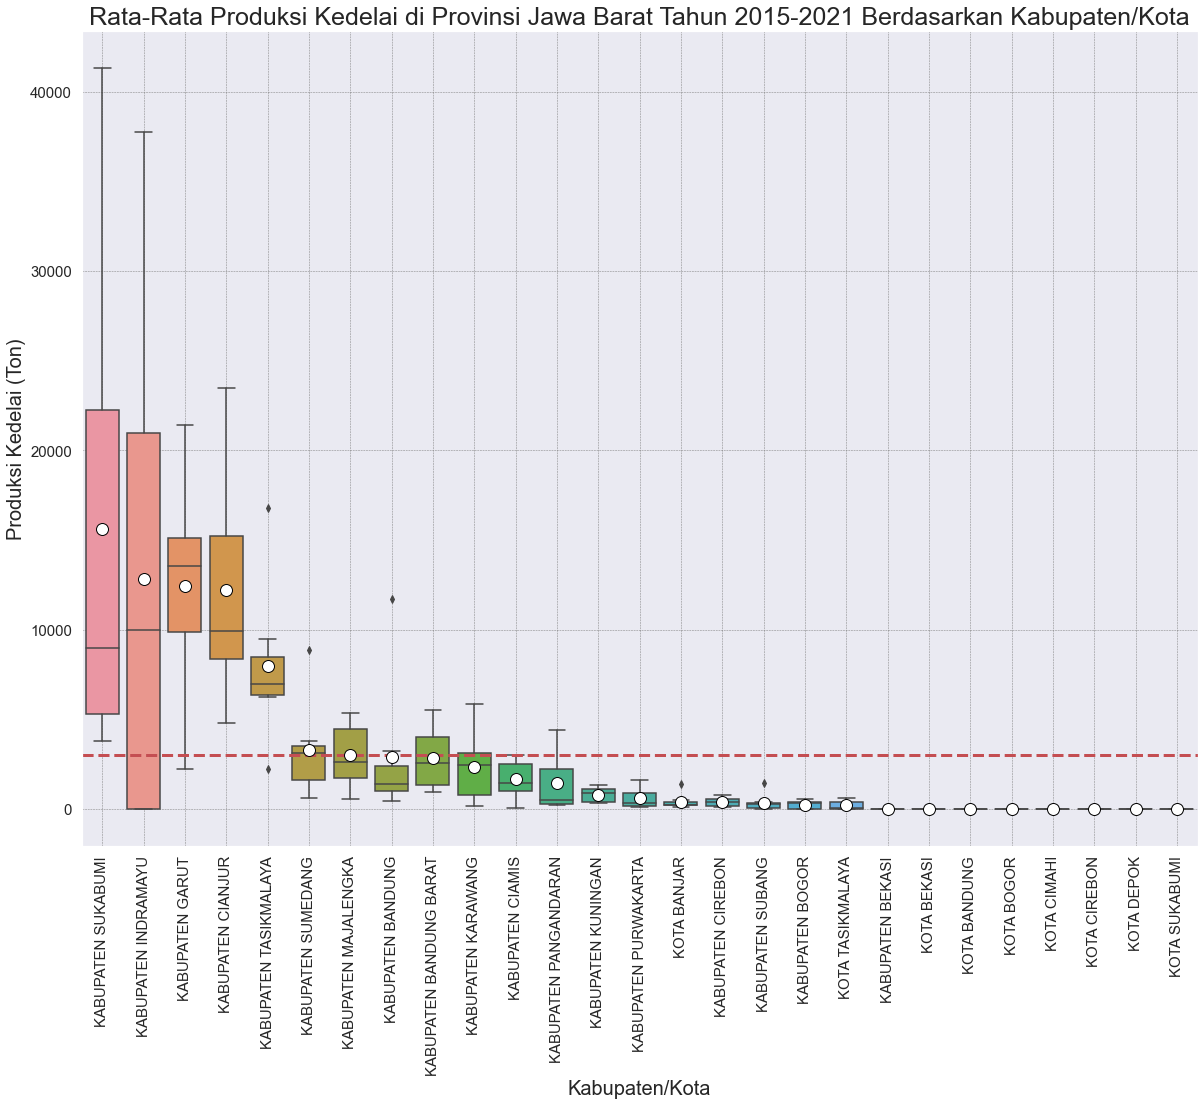

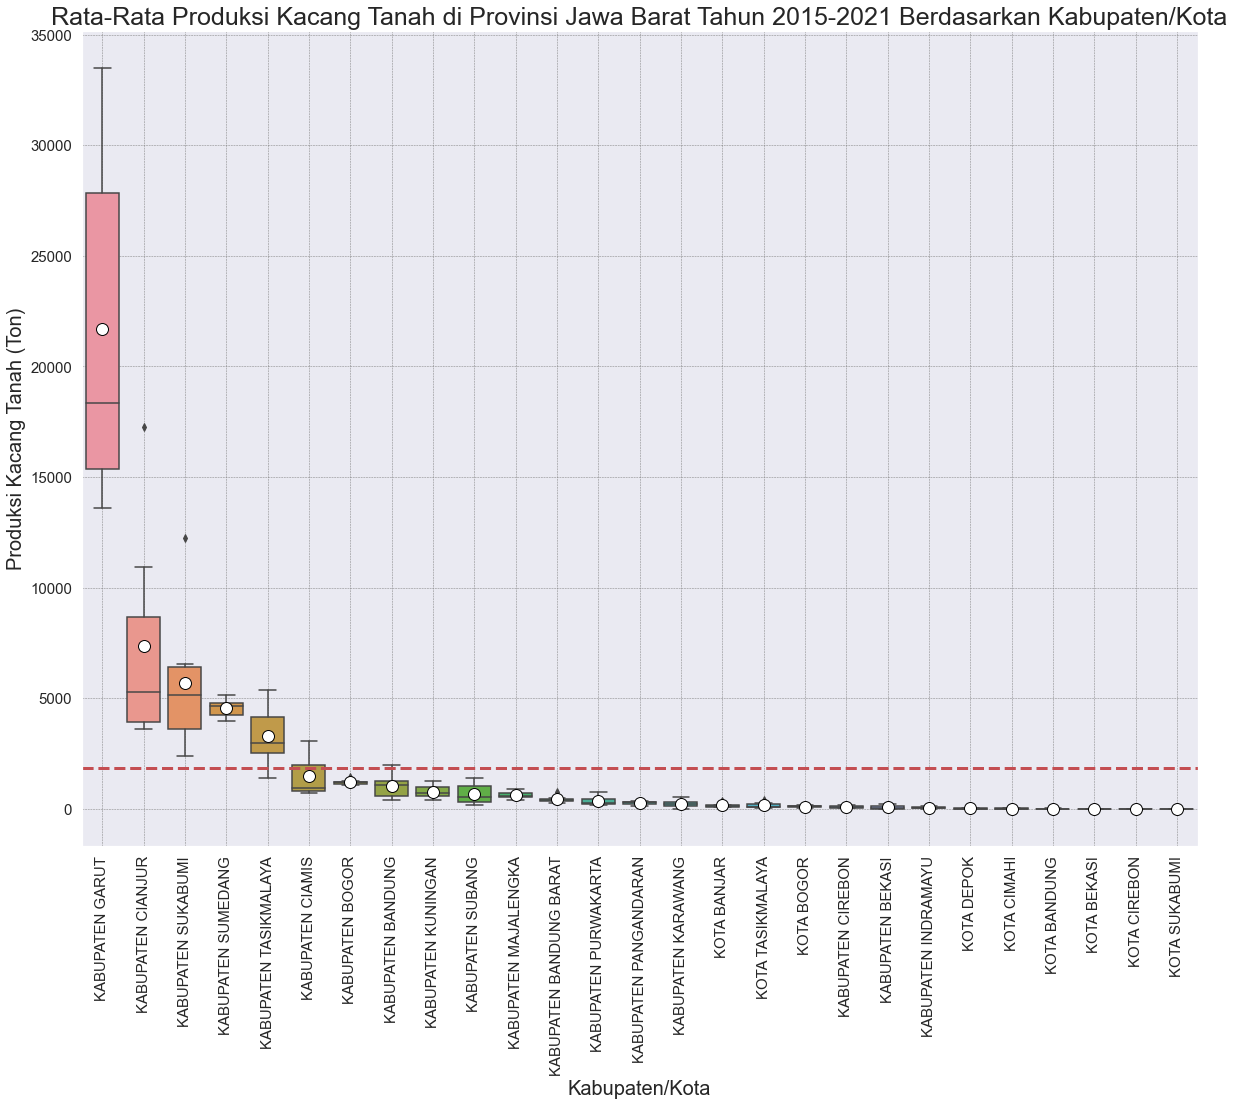

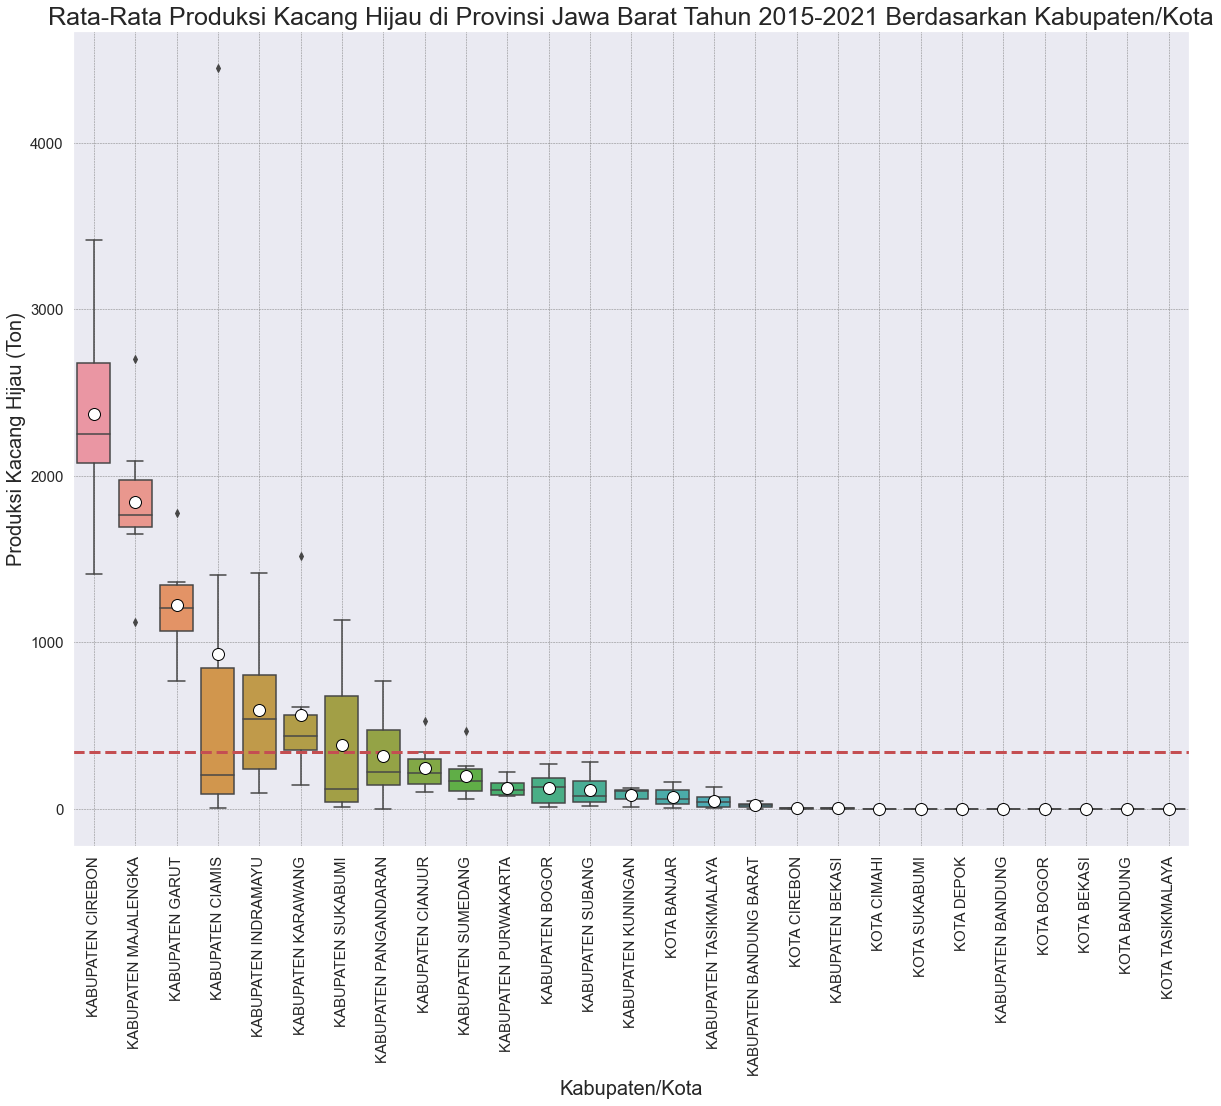

In [239]:
for col in data.columns[6:]:
  if 'produksi' in col:
    plotter.create_plot(col, 'Ton', 'box')

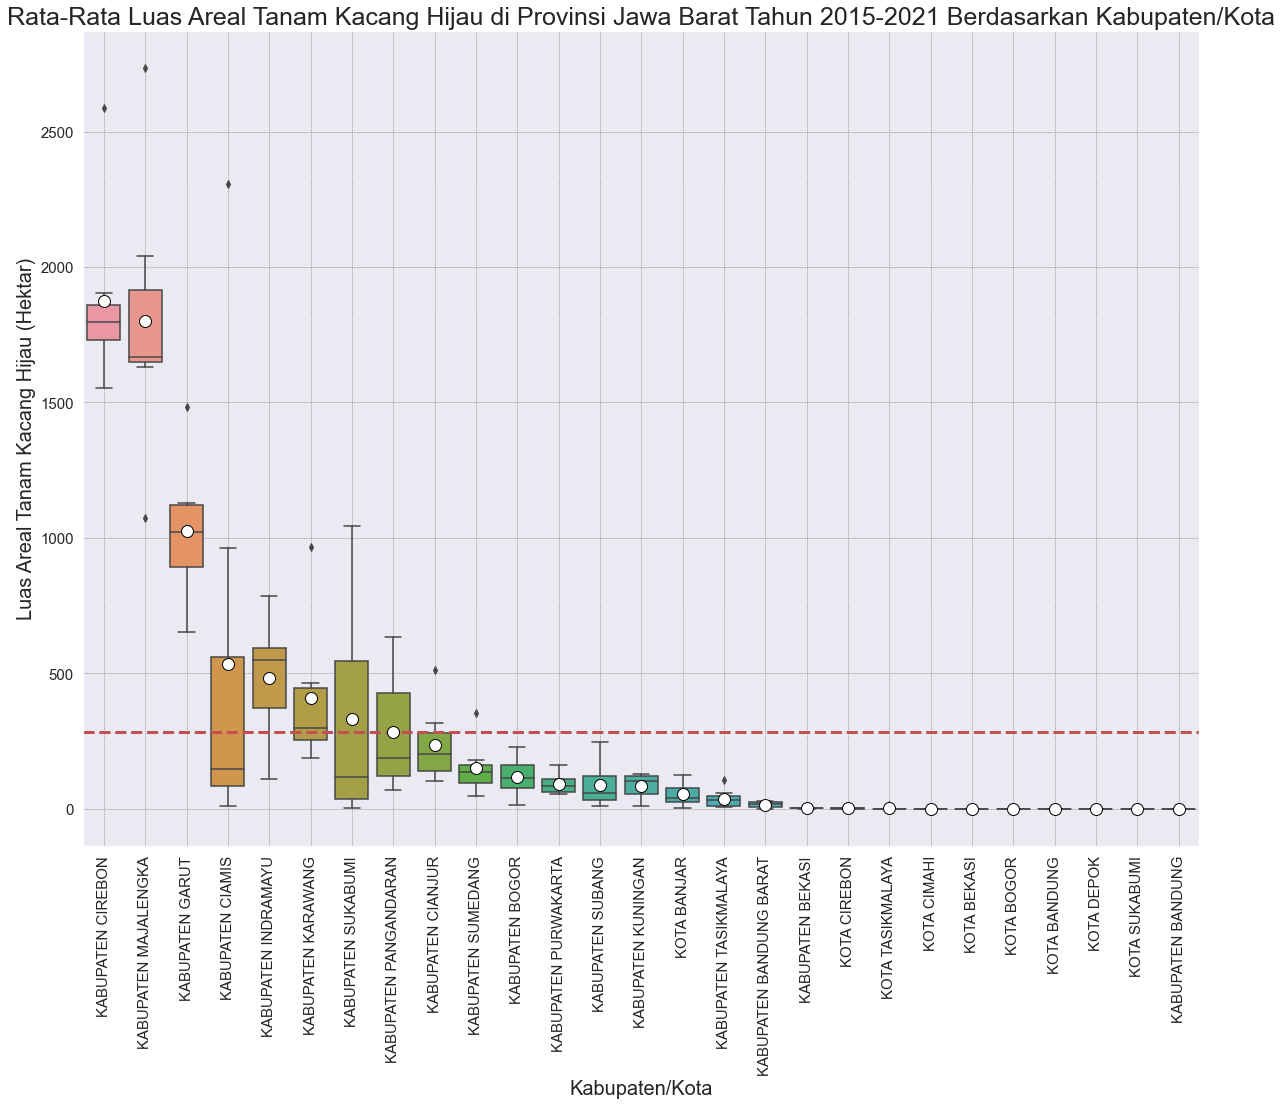

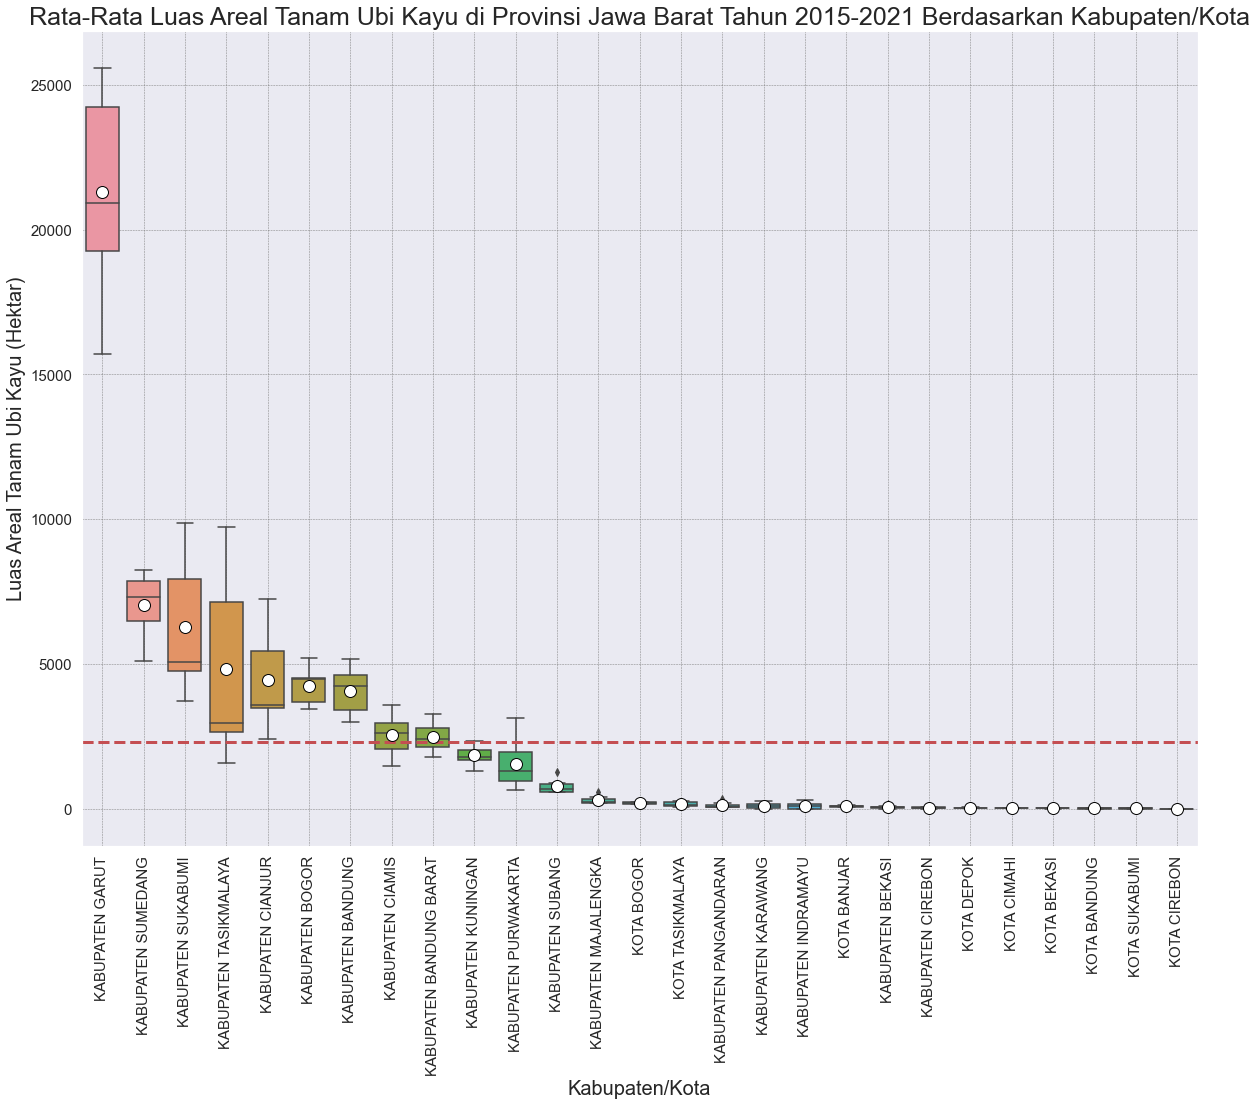

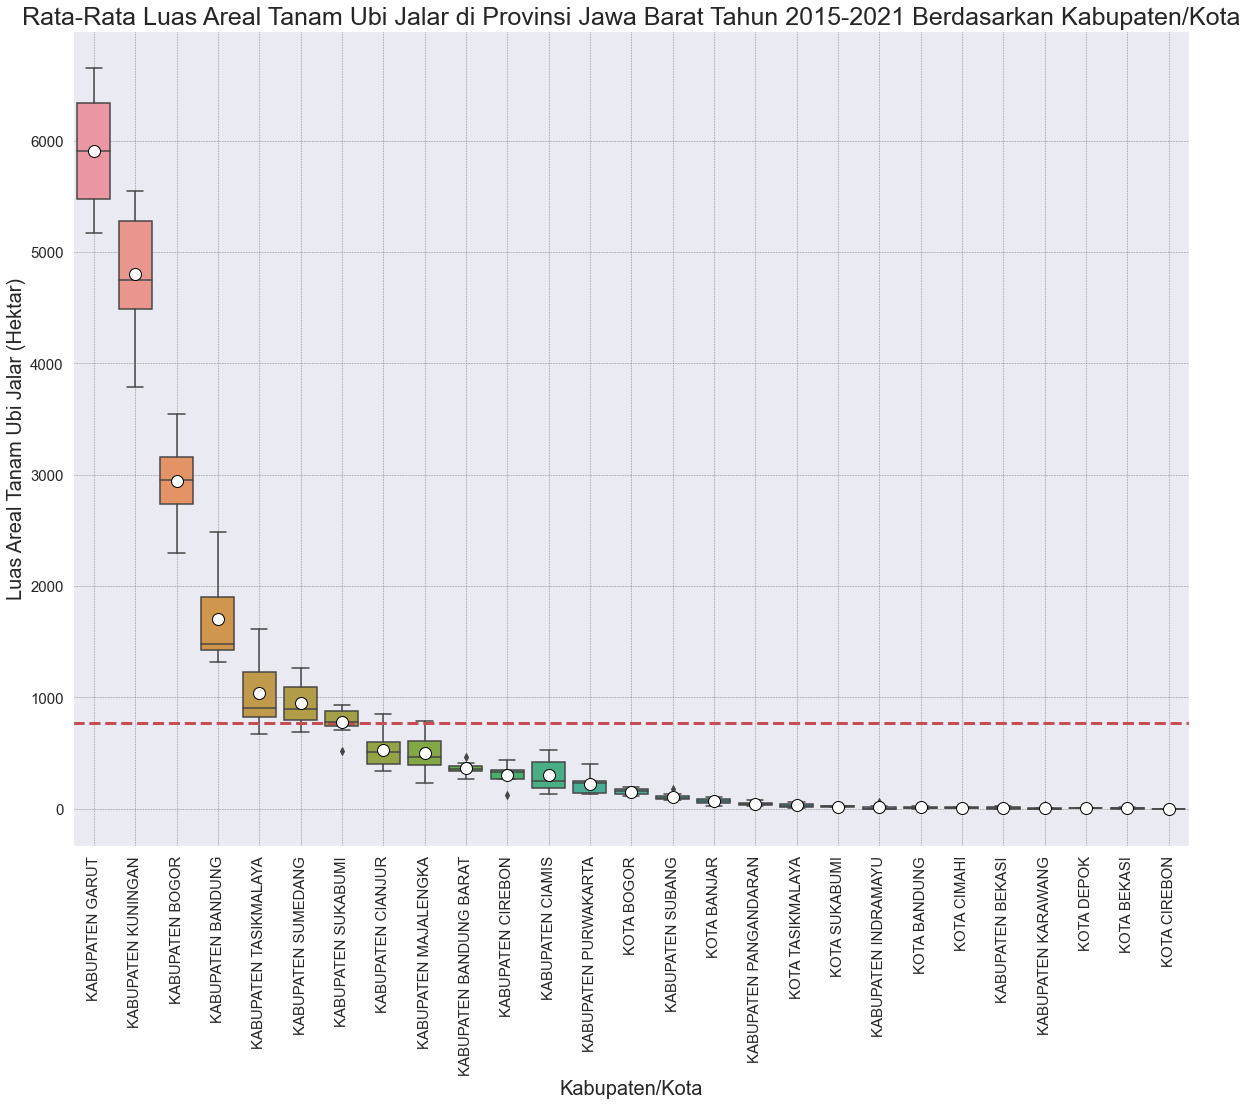

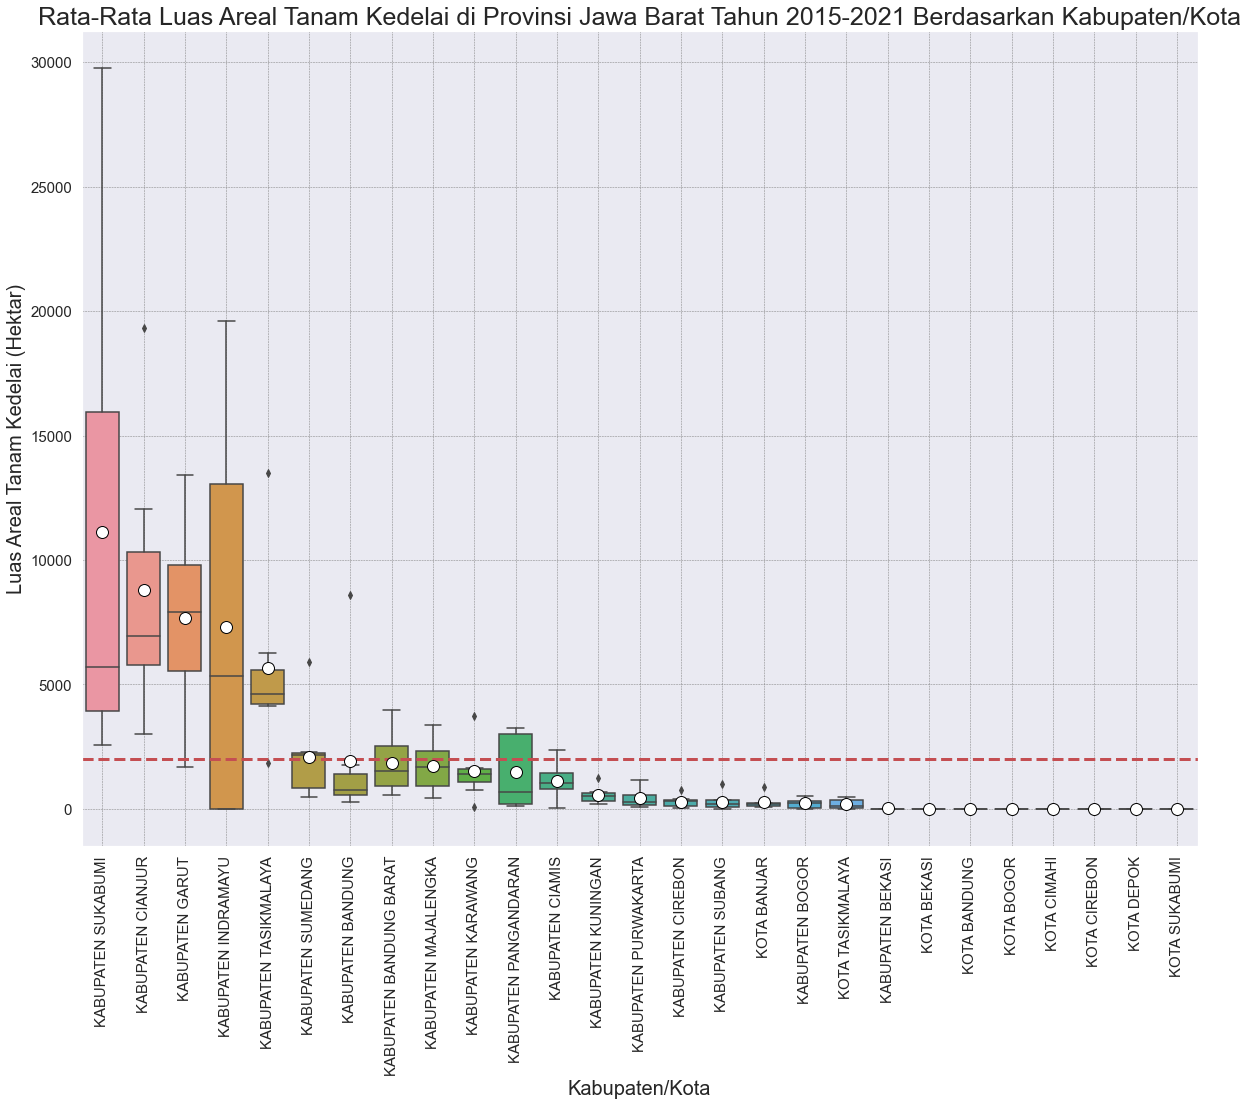

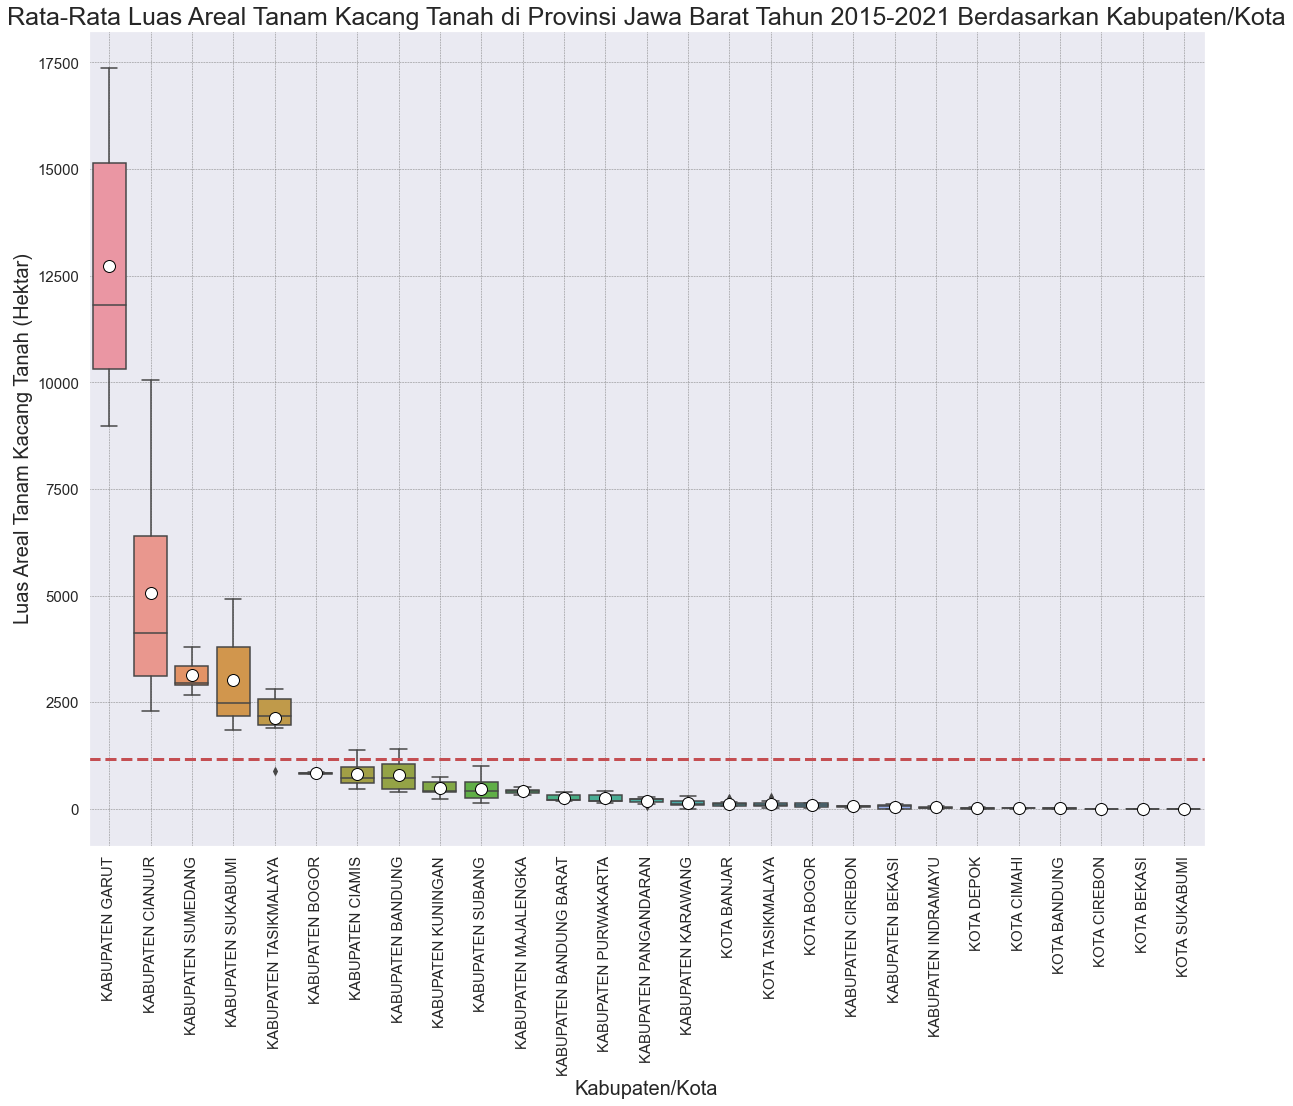

In [240]:
for col in data.columns[6:]:
  if 'luas_areal_tanam' in col:
    plotter.create_plot(col, 'Hektar', 'box')

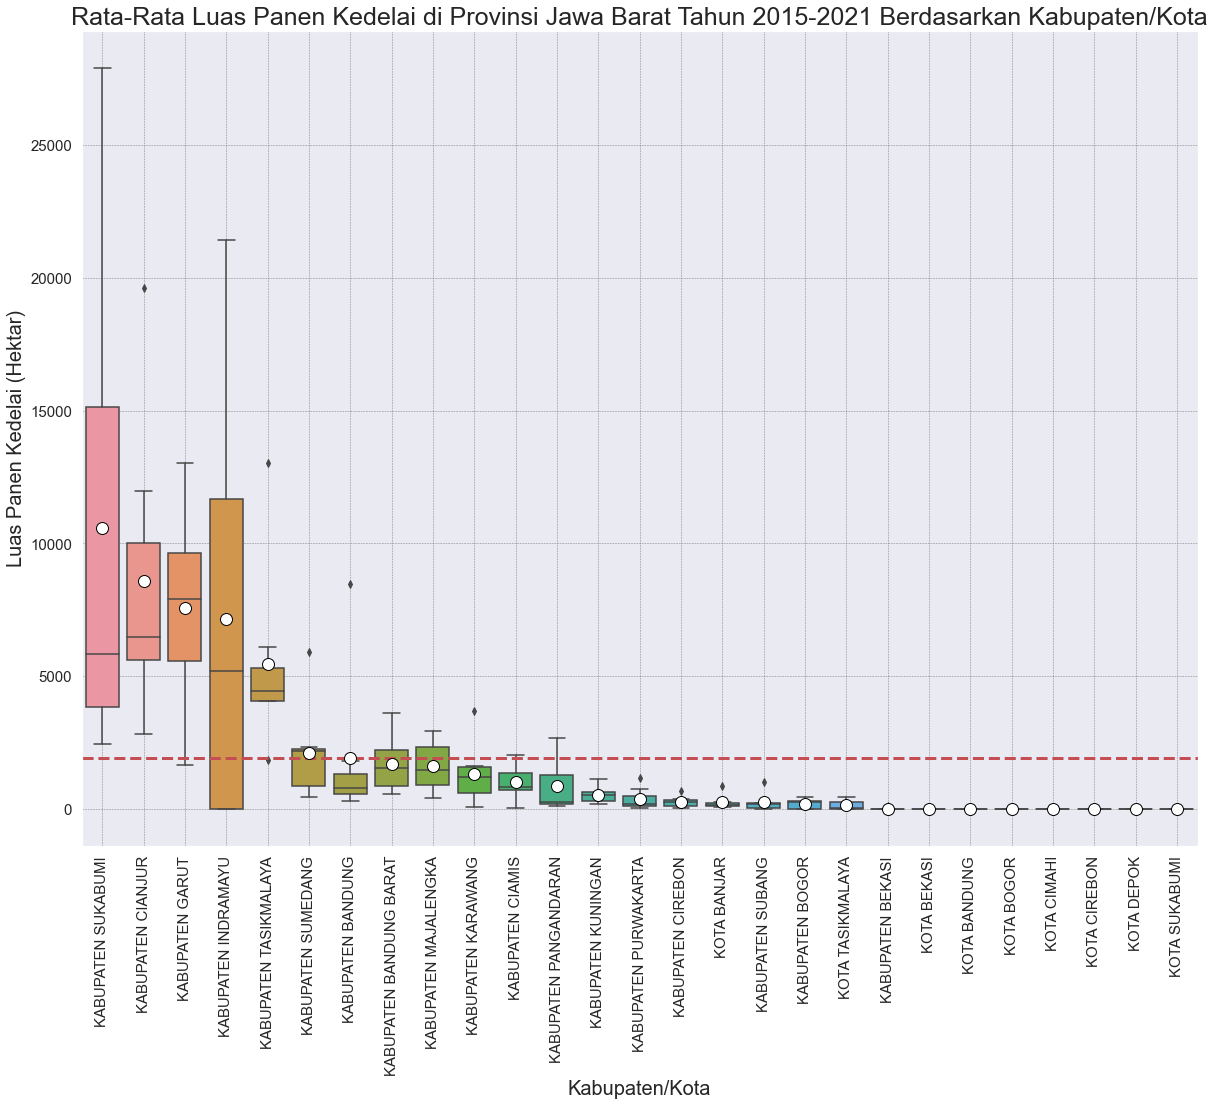

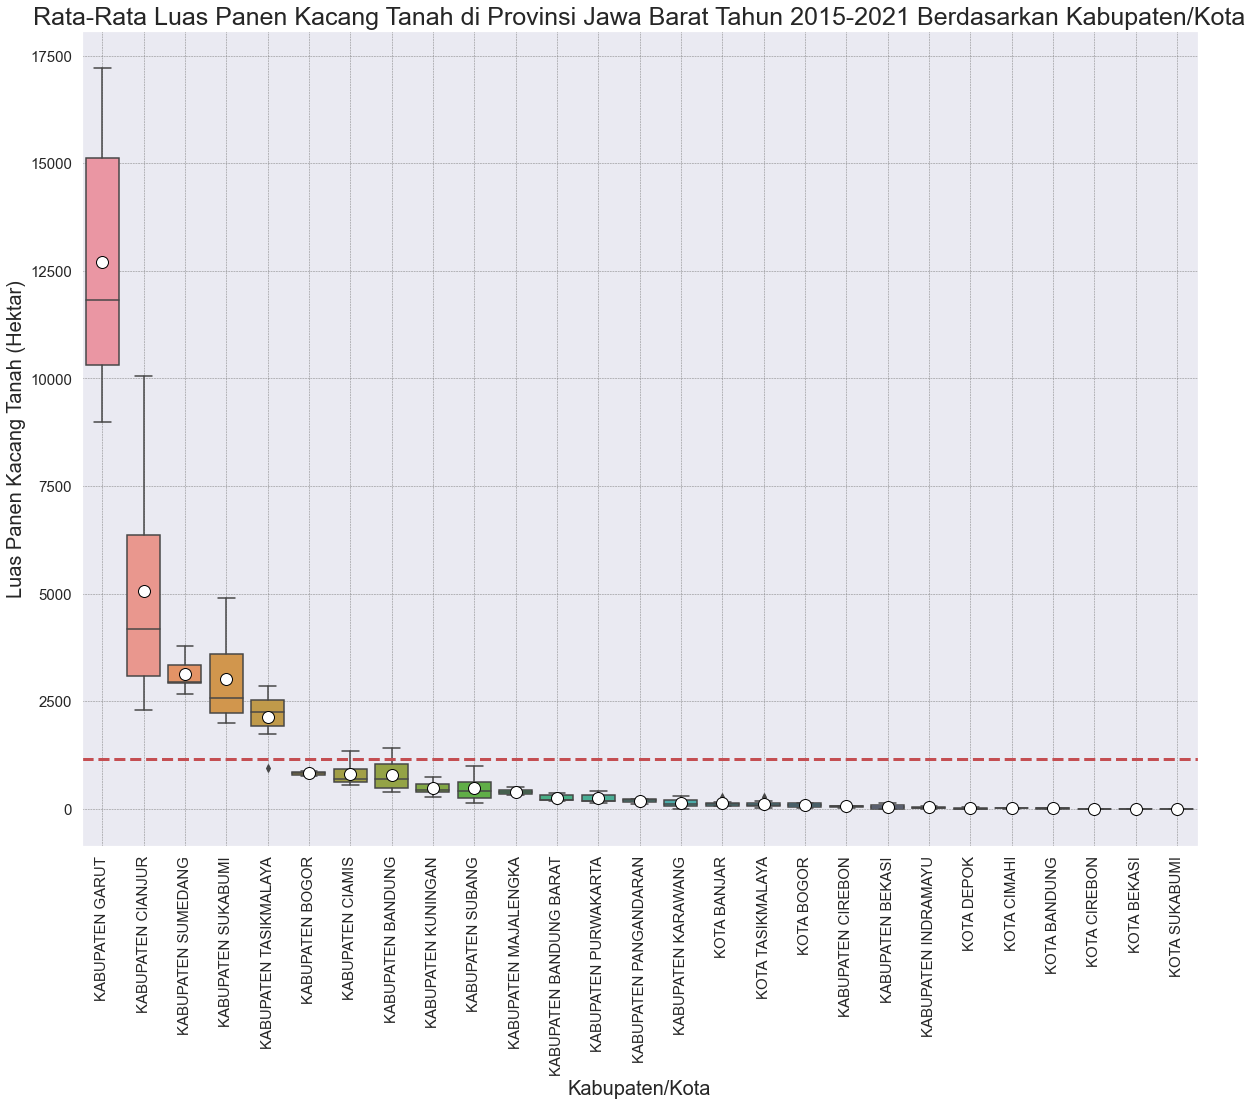

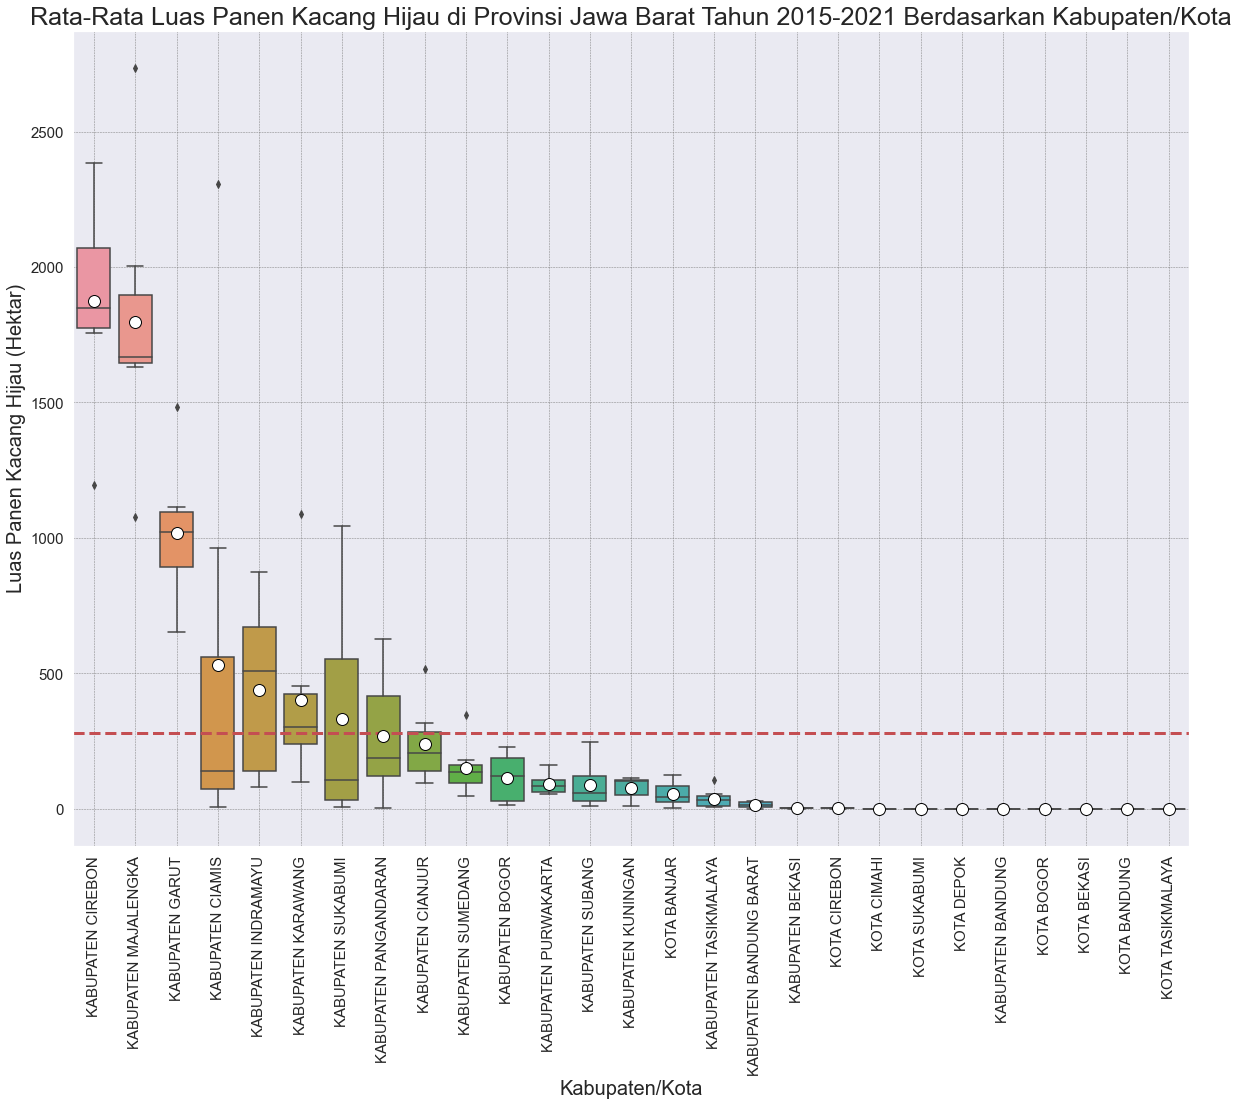

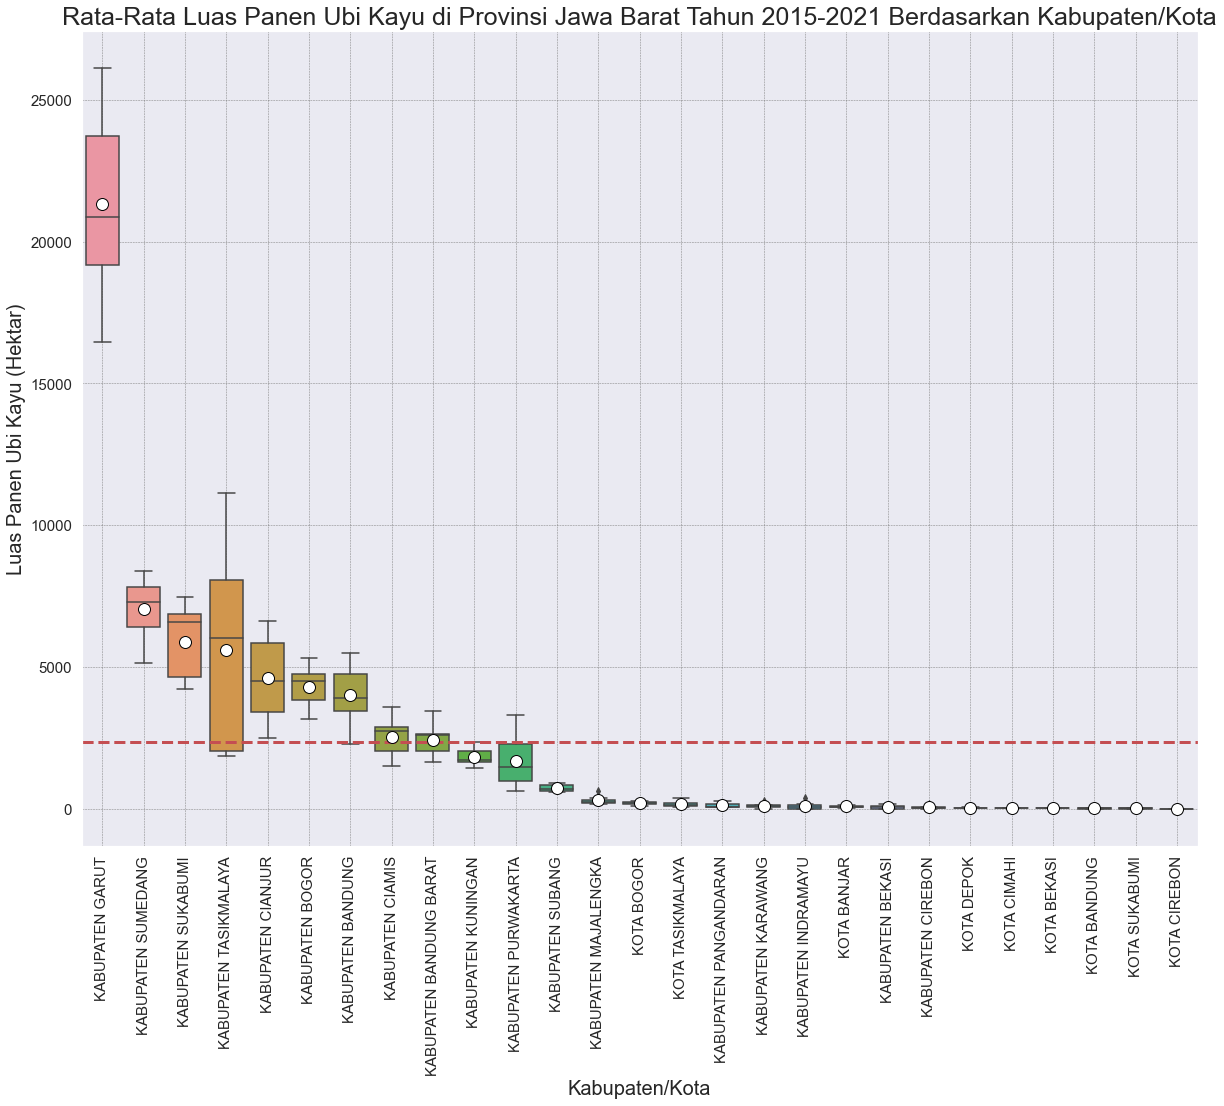

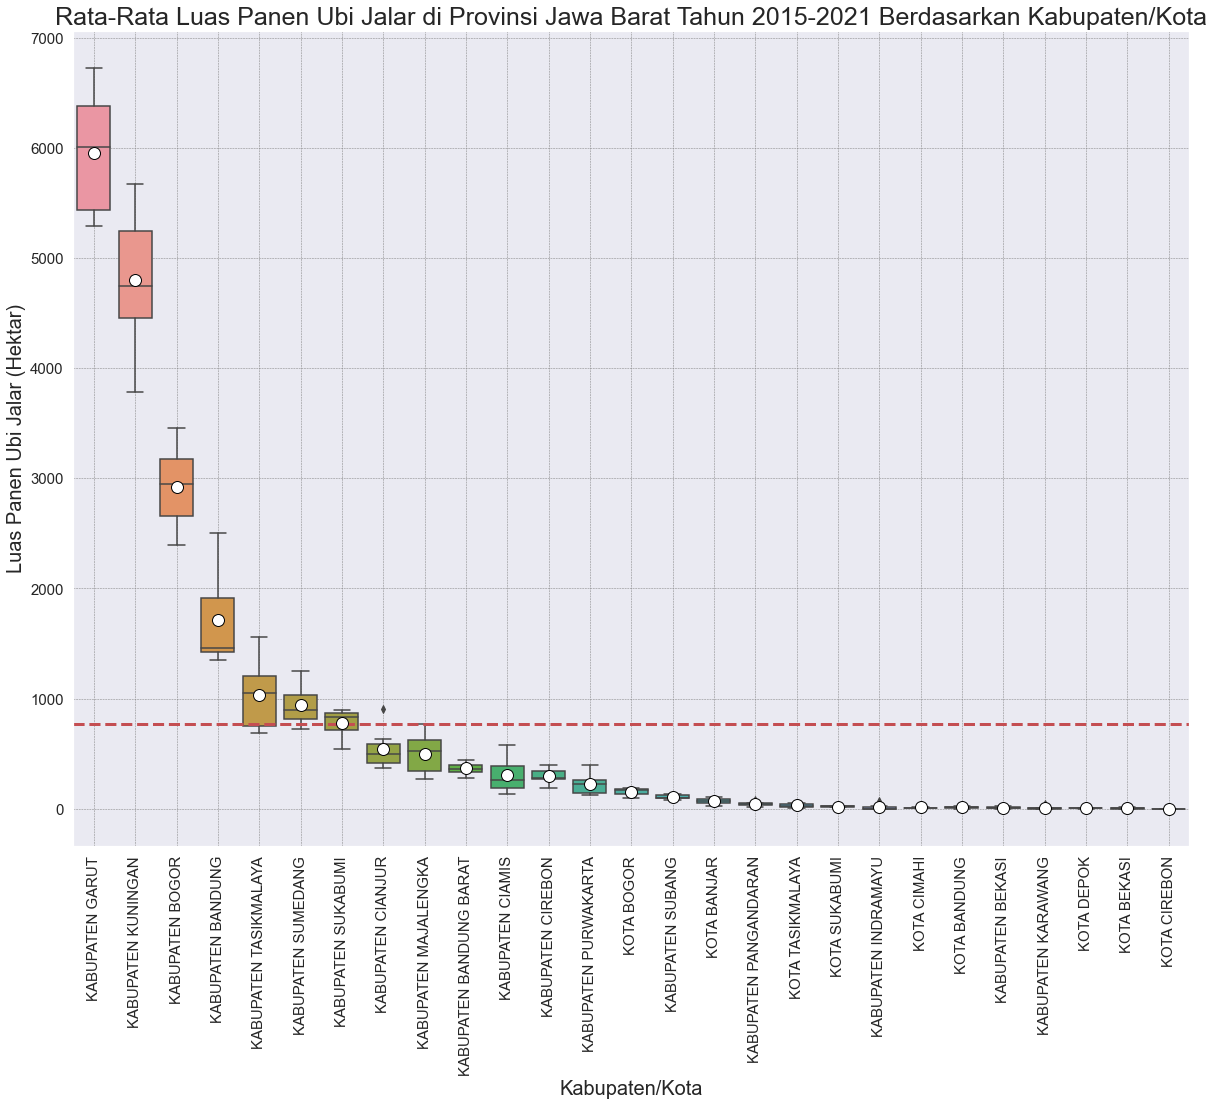

In [241]:
for col in data.columns[6:]:
  if 'luas_panen' in col:
    plotter.create_plot(col, 'Hektar', 'box')

## Line Plot Tren Data Produktivitas, Produksi, Luas Areal Tanam, dan Luas Panen Provinsi Jawa Barat

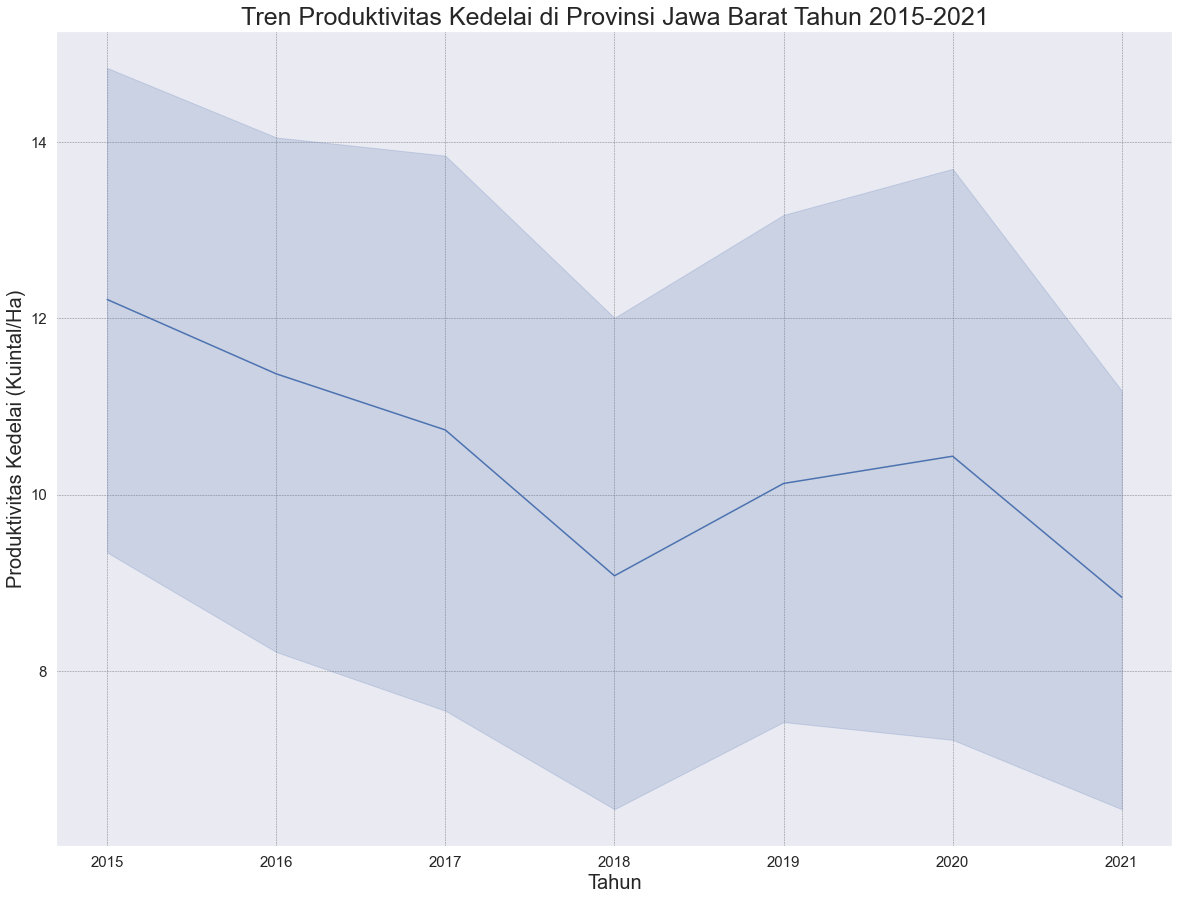

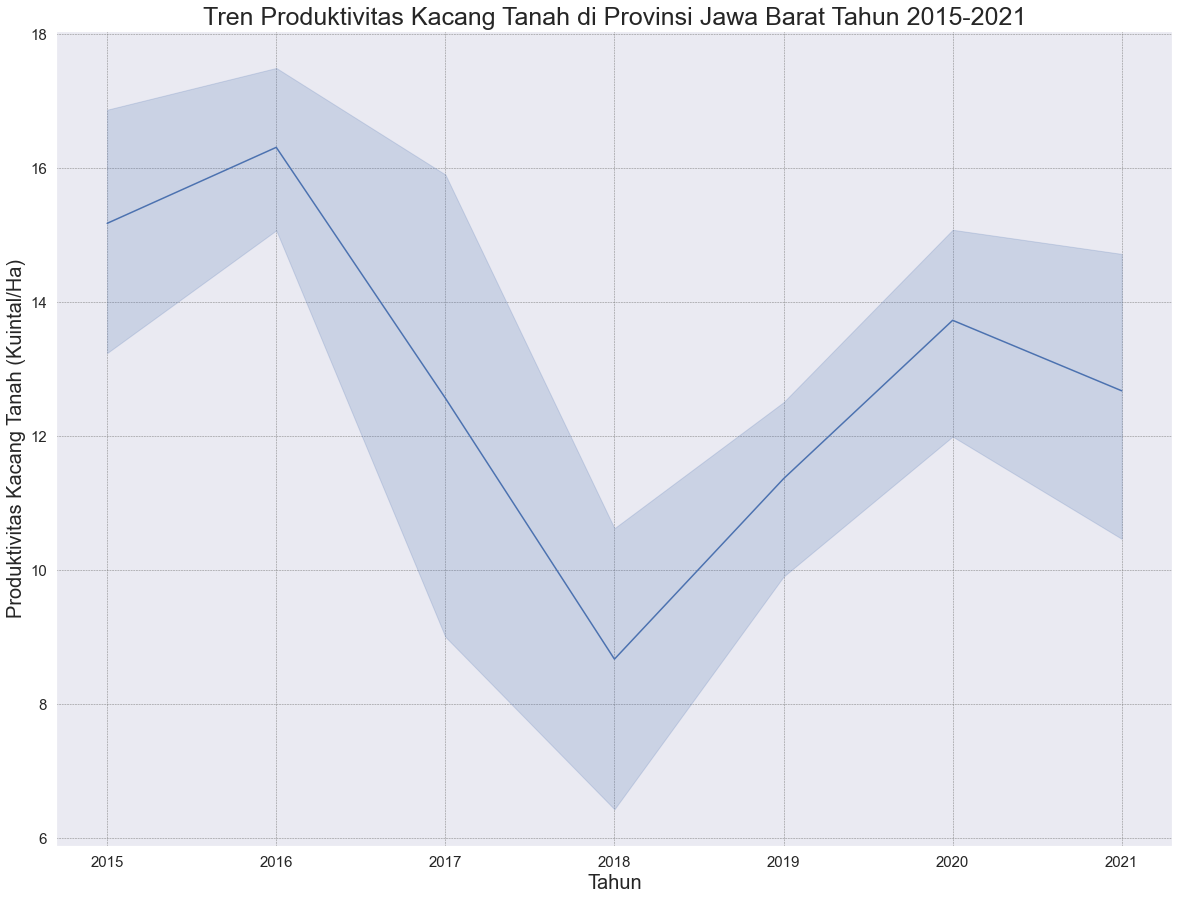

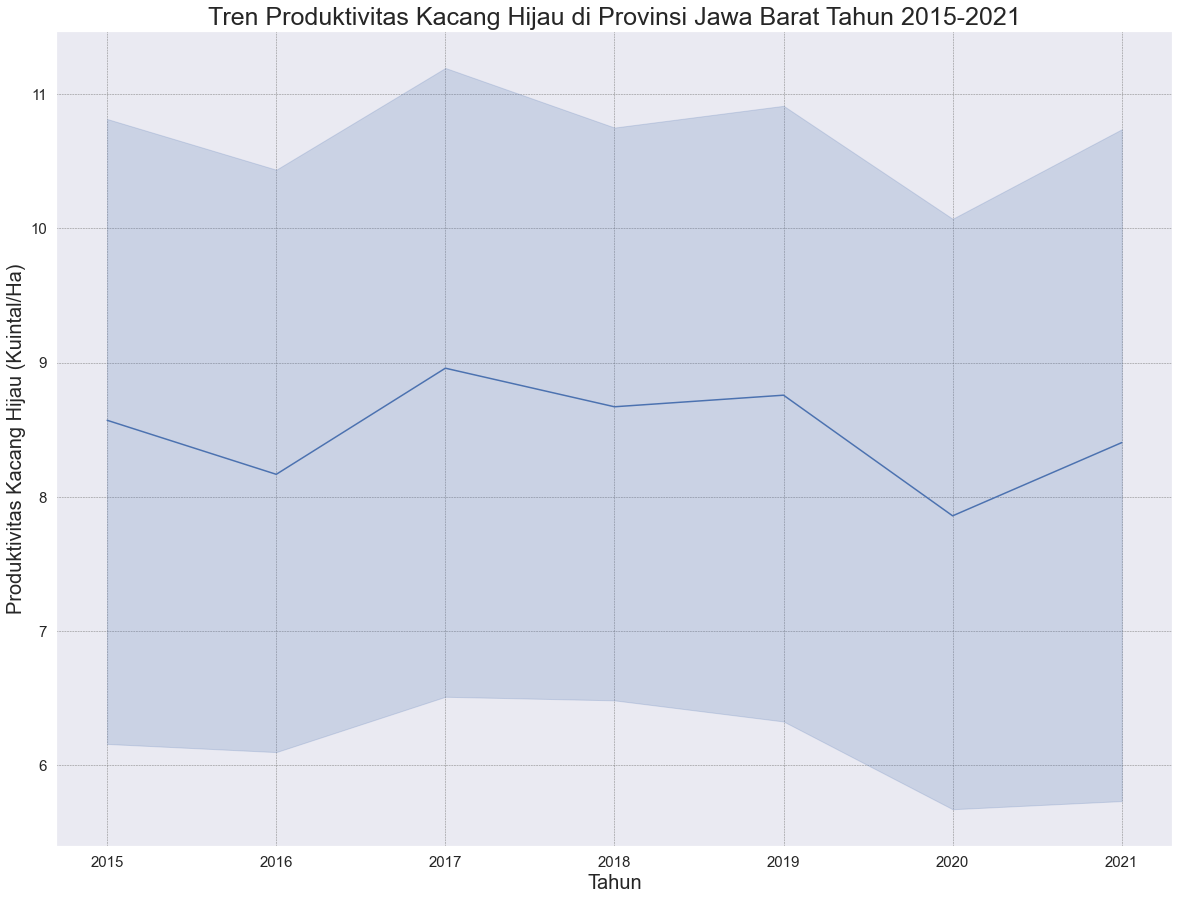

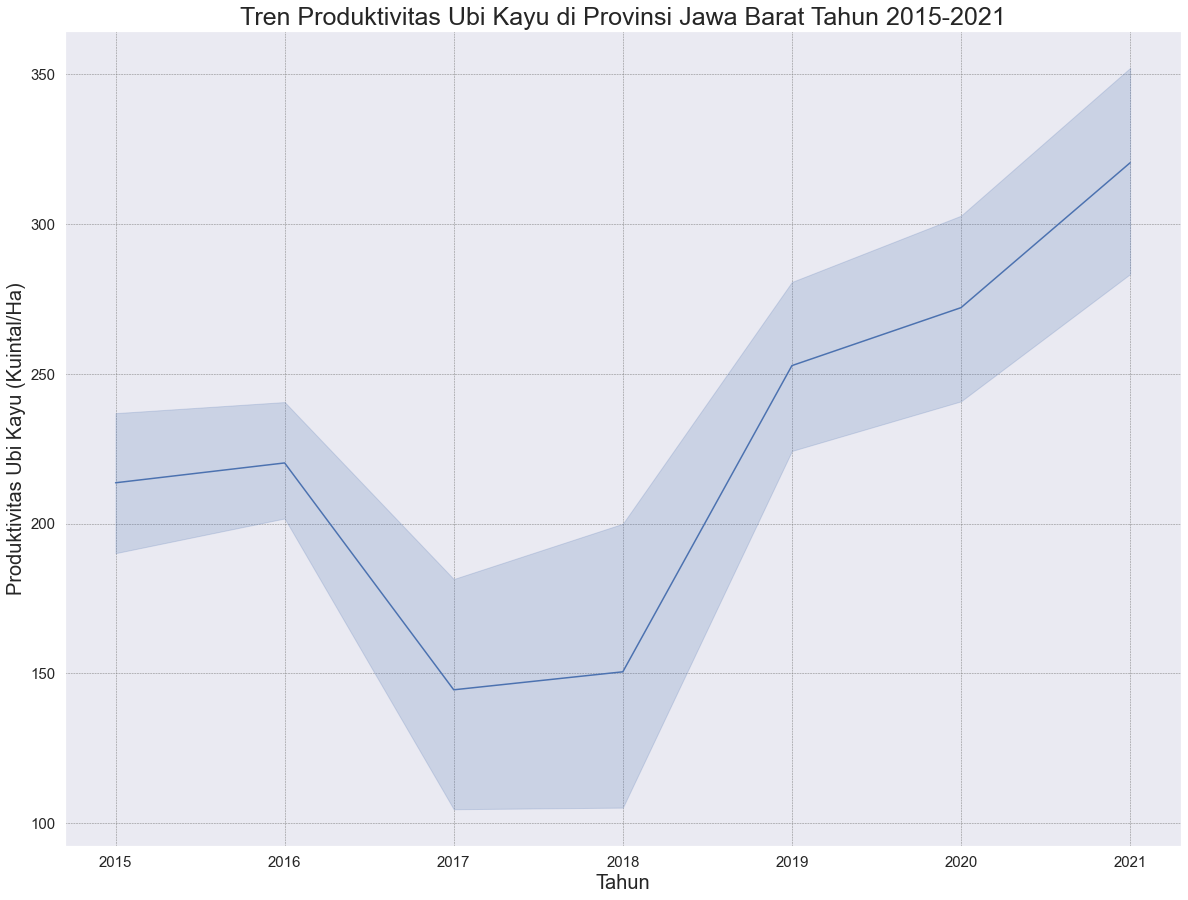

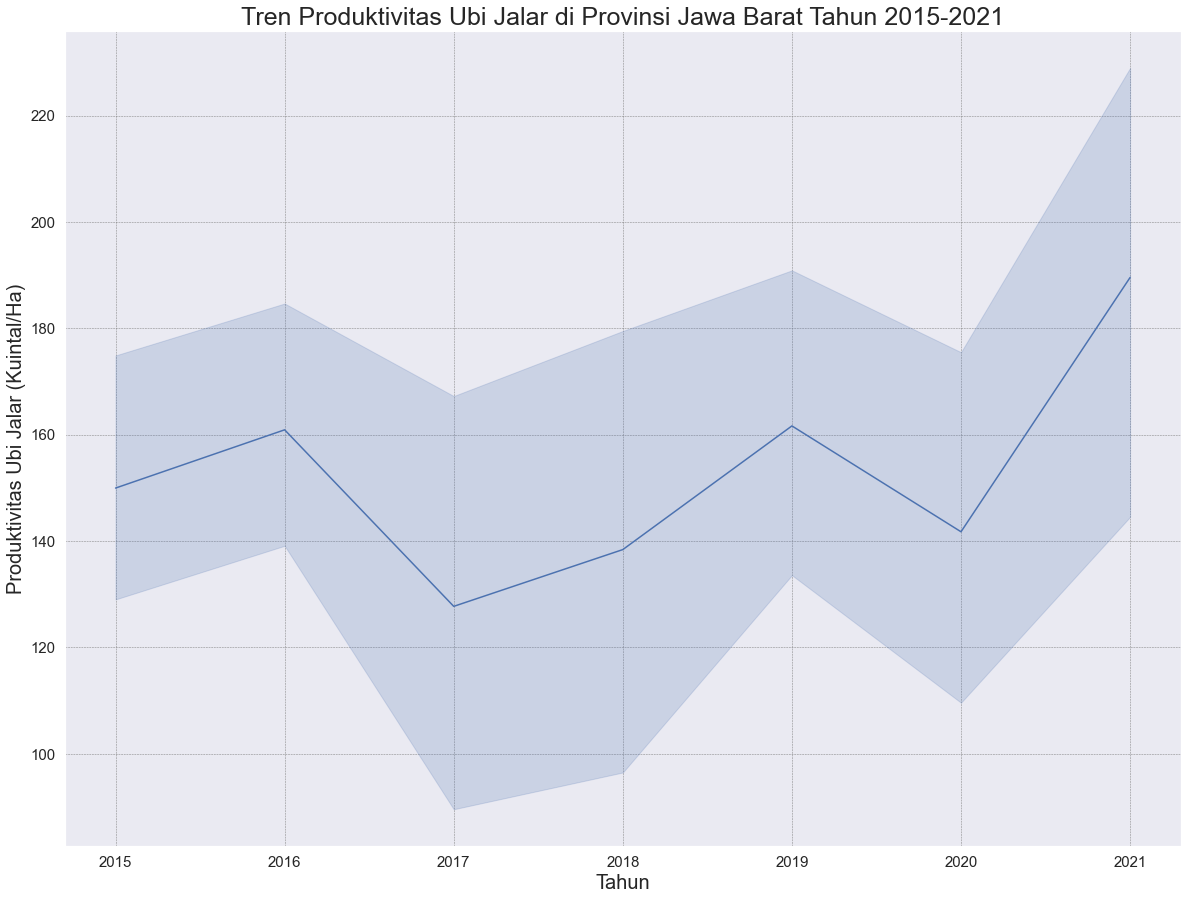

In [242]:
for col in data.columns[6:]:
  if 'produktivitas' in col:
    plotter.create_plot(col, 'Kuintal/Ha', 'line')

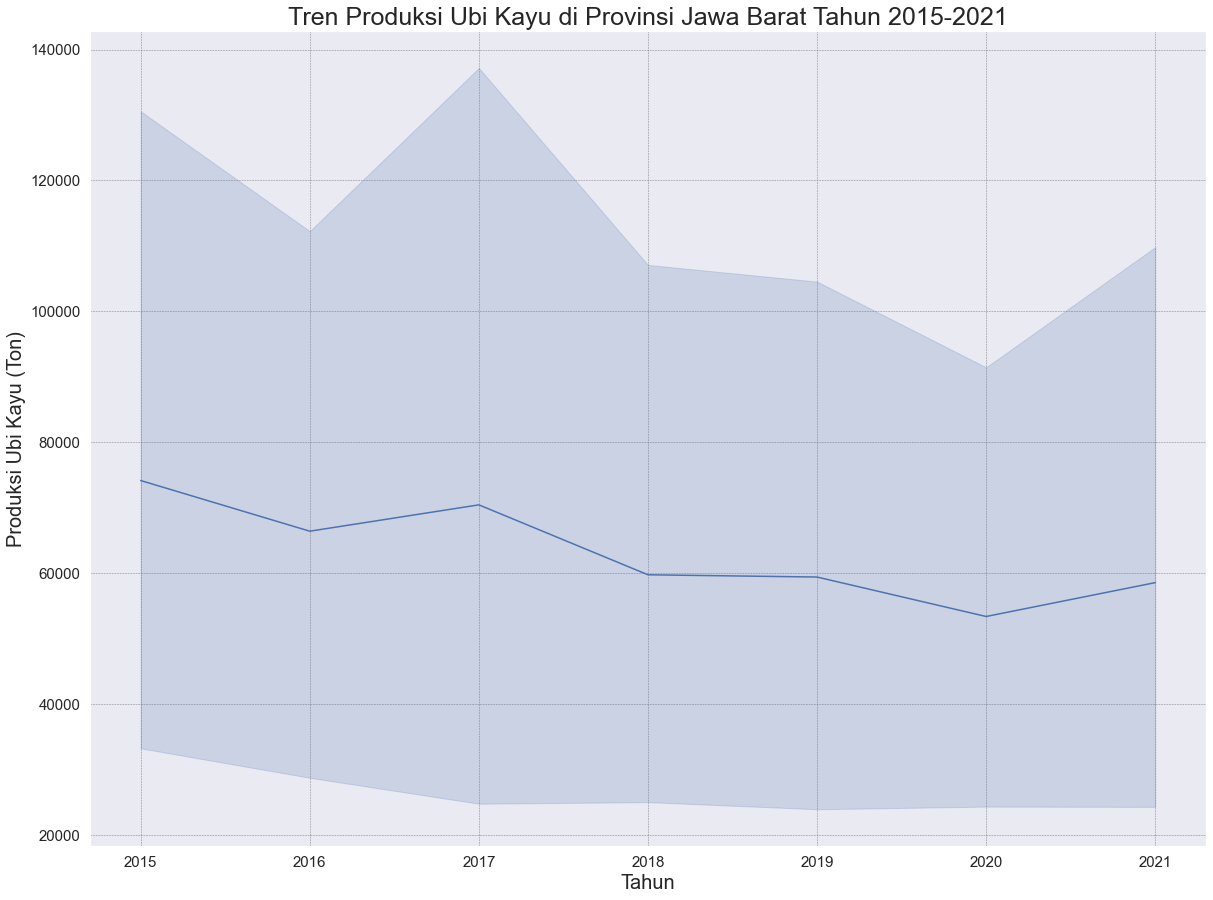

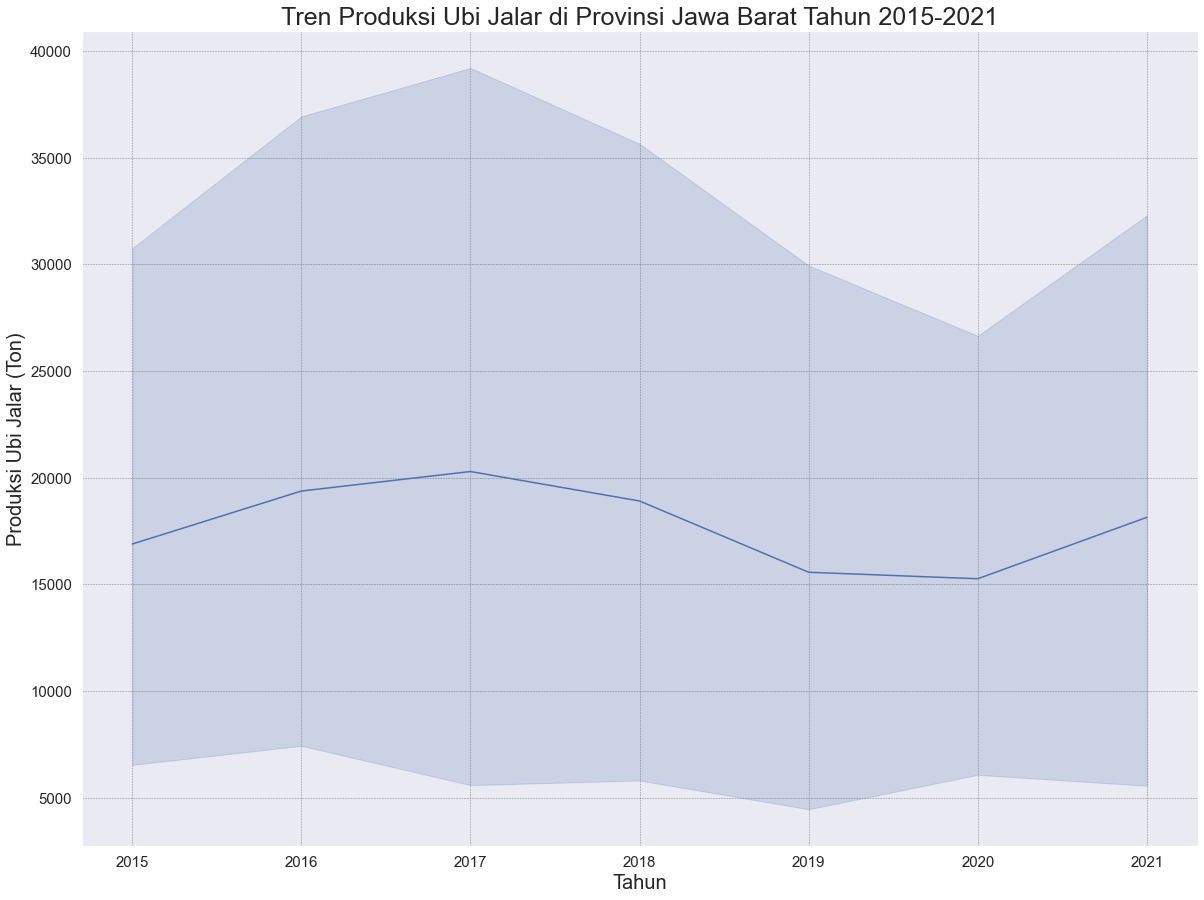

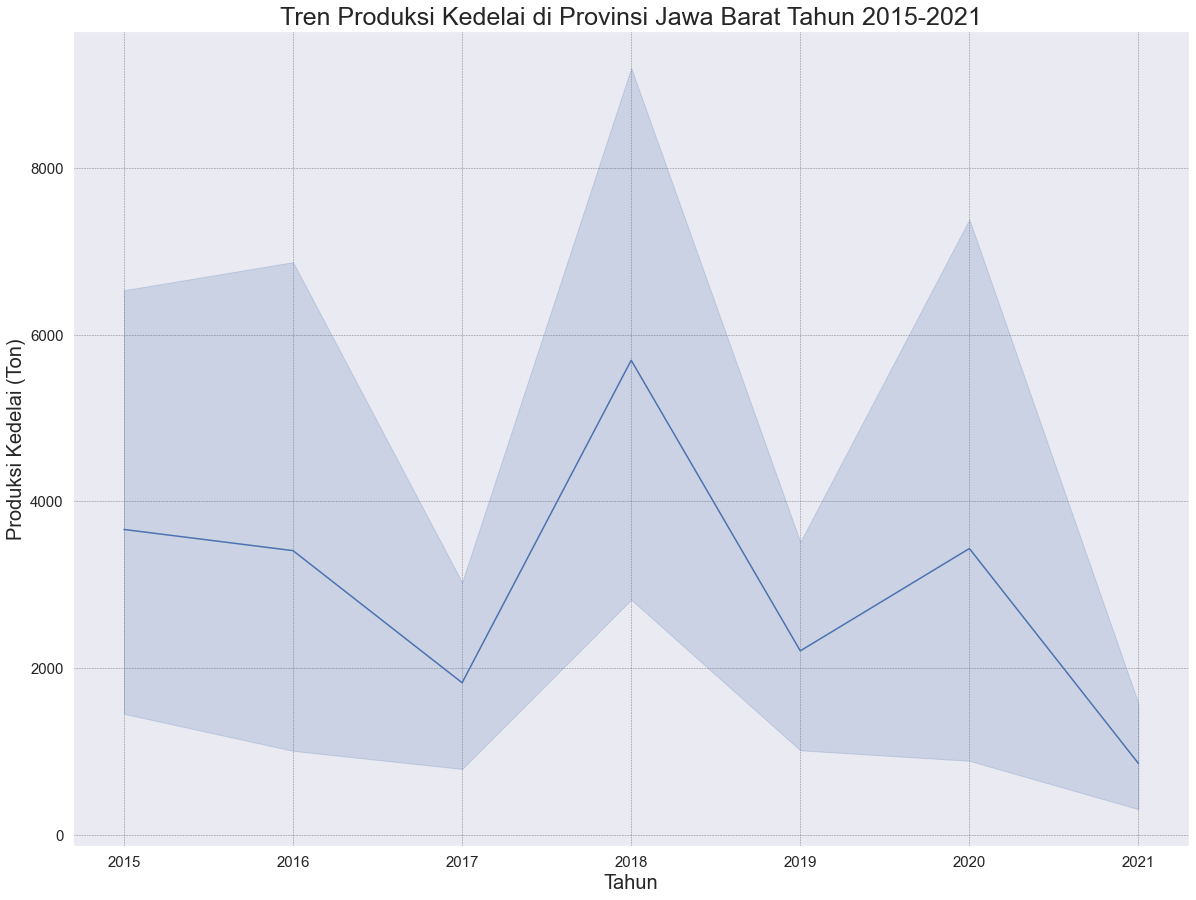

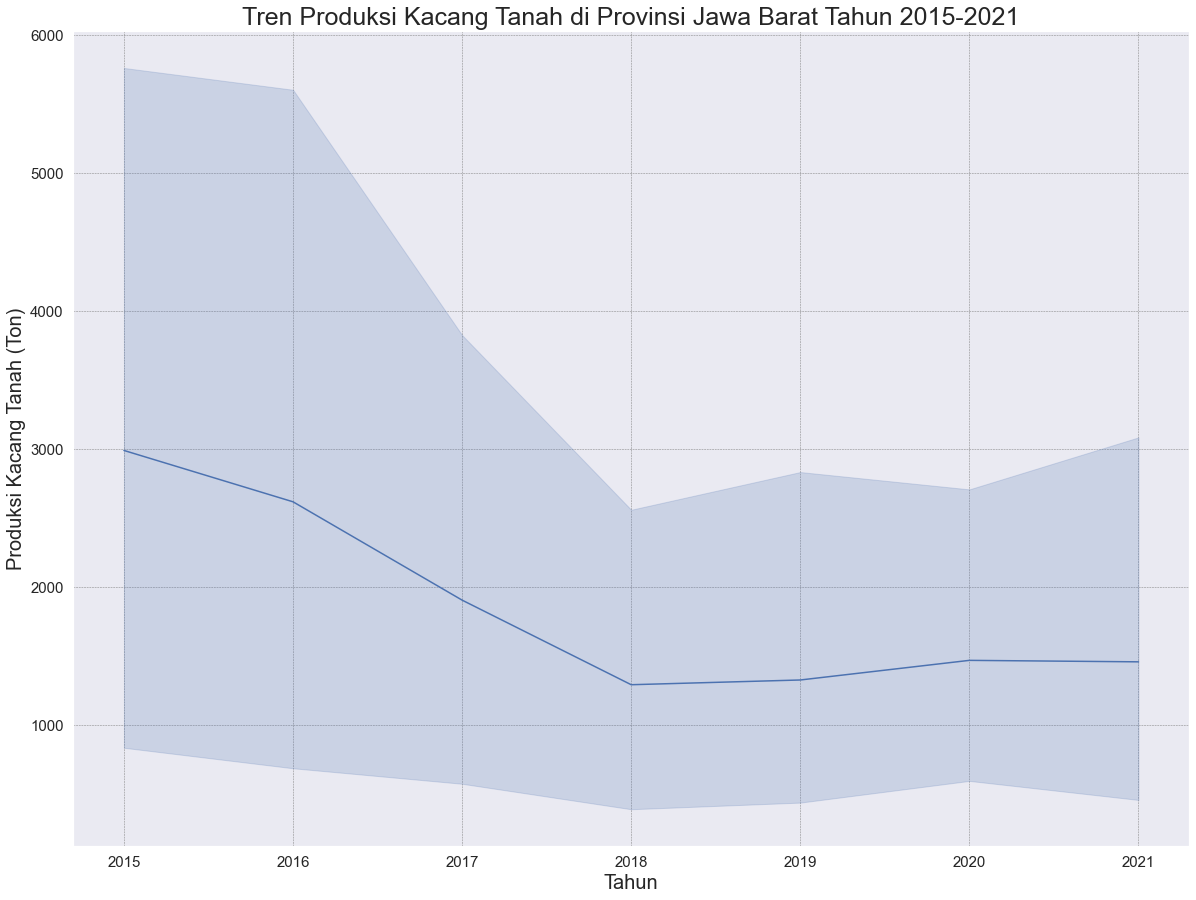

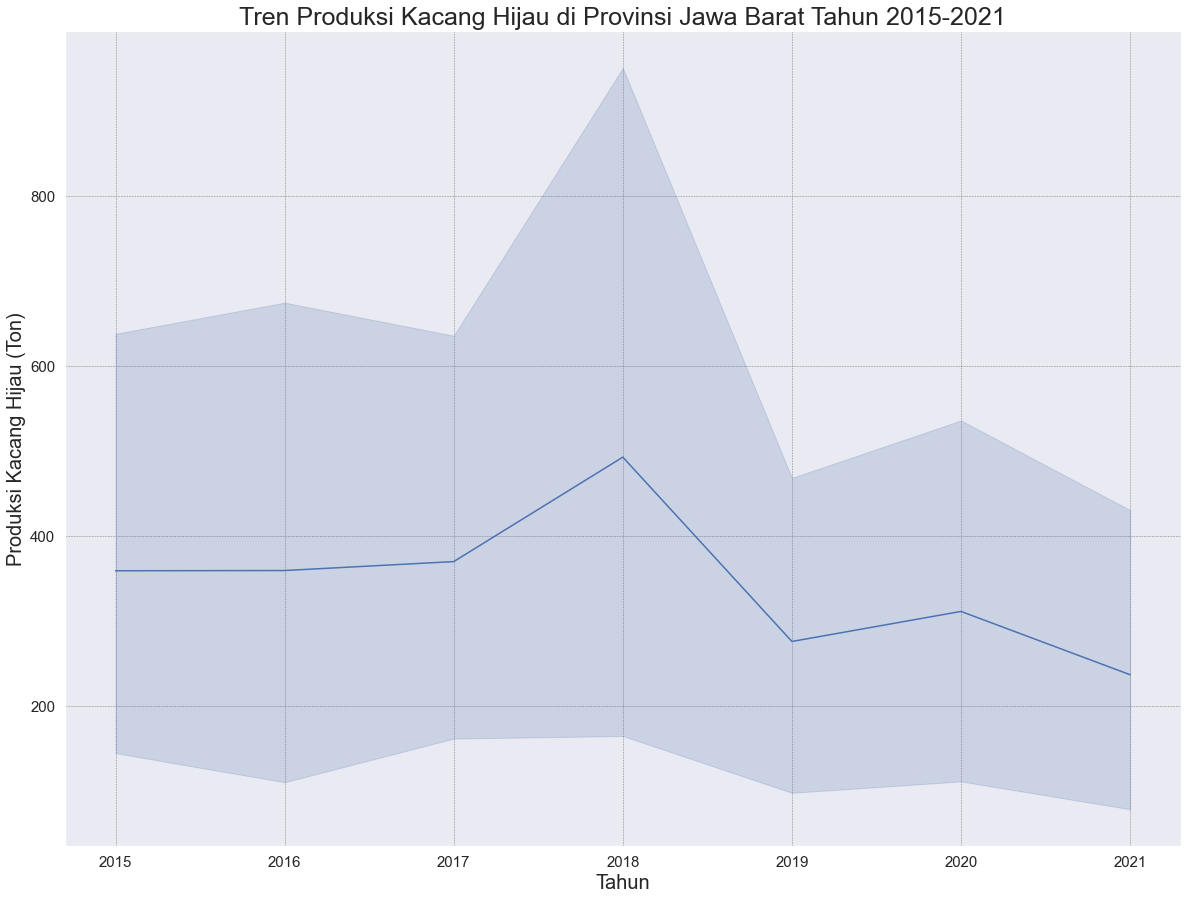

In [243]:
for col in data.columns[6:]:
  if 'produksi' in col:
    plotter.create_plot(col, 'Ton', 'line')

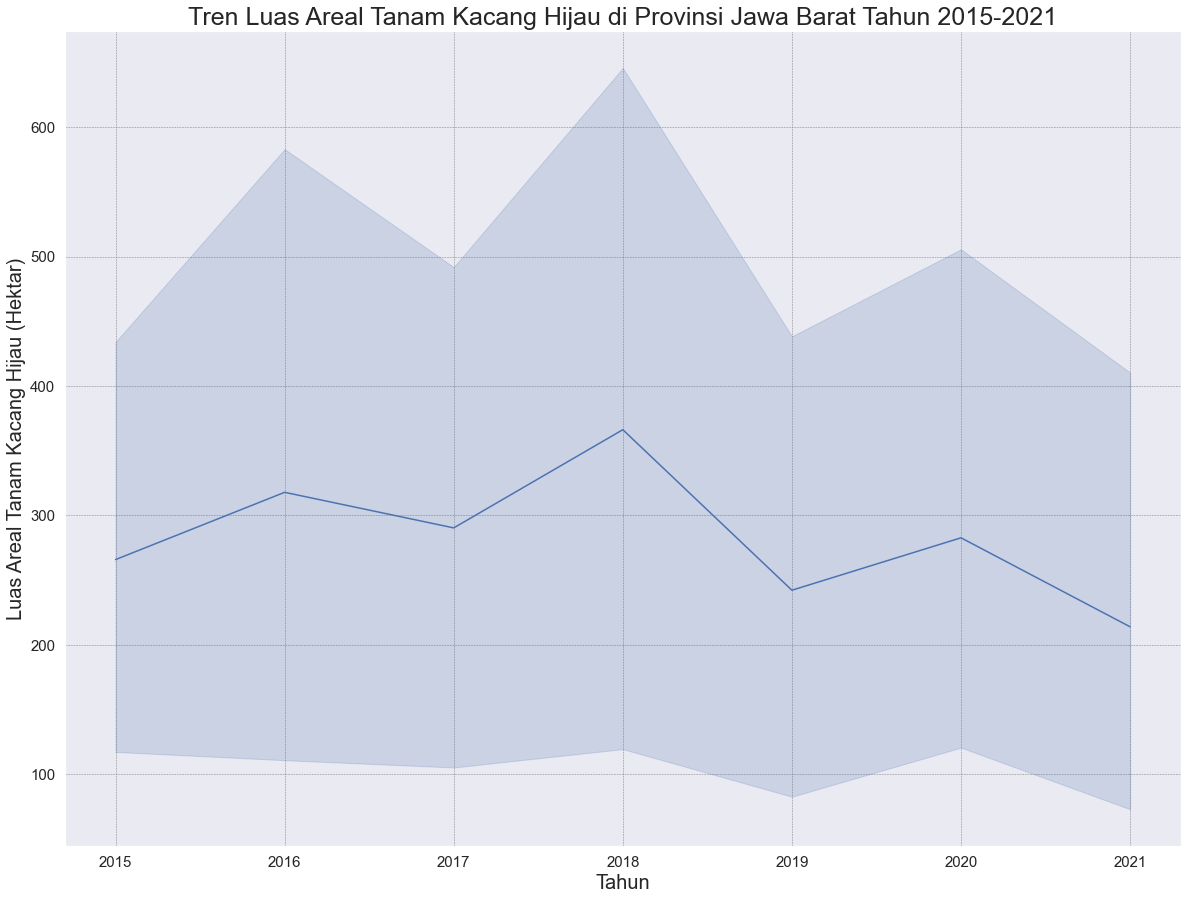

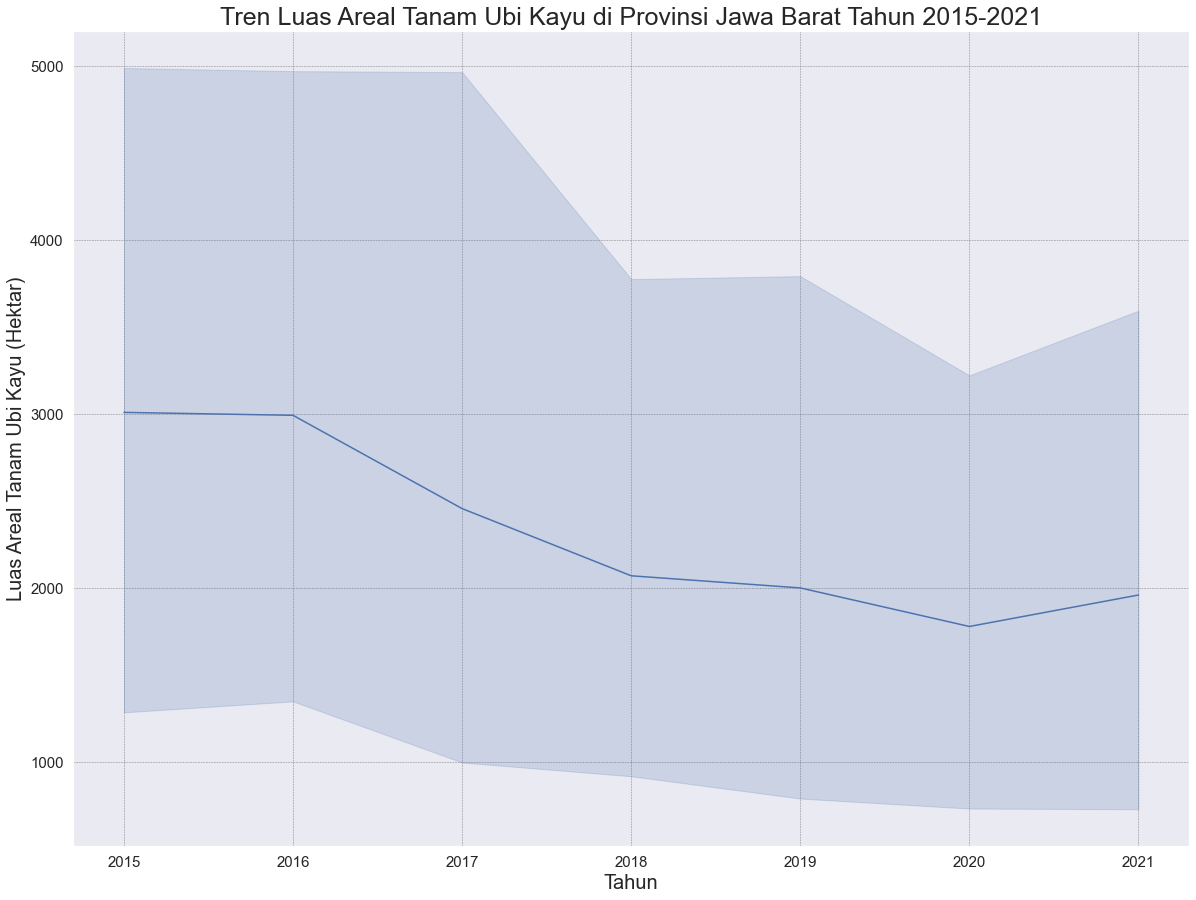

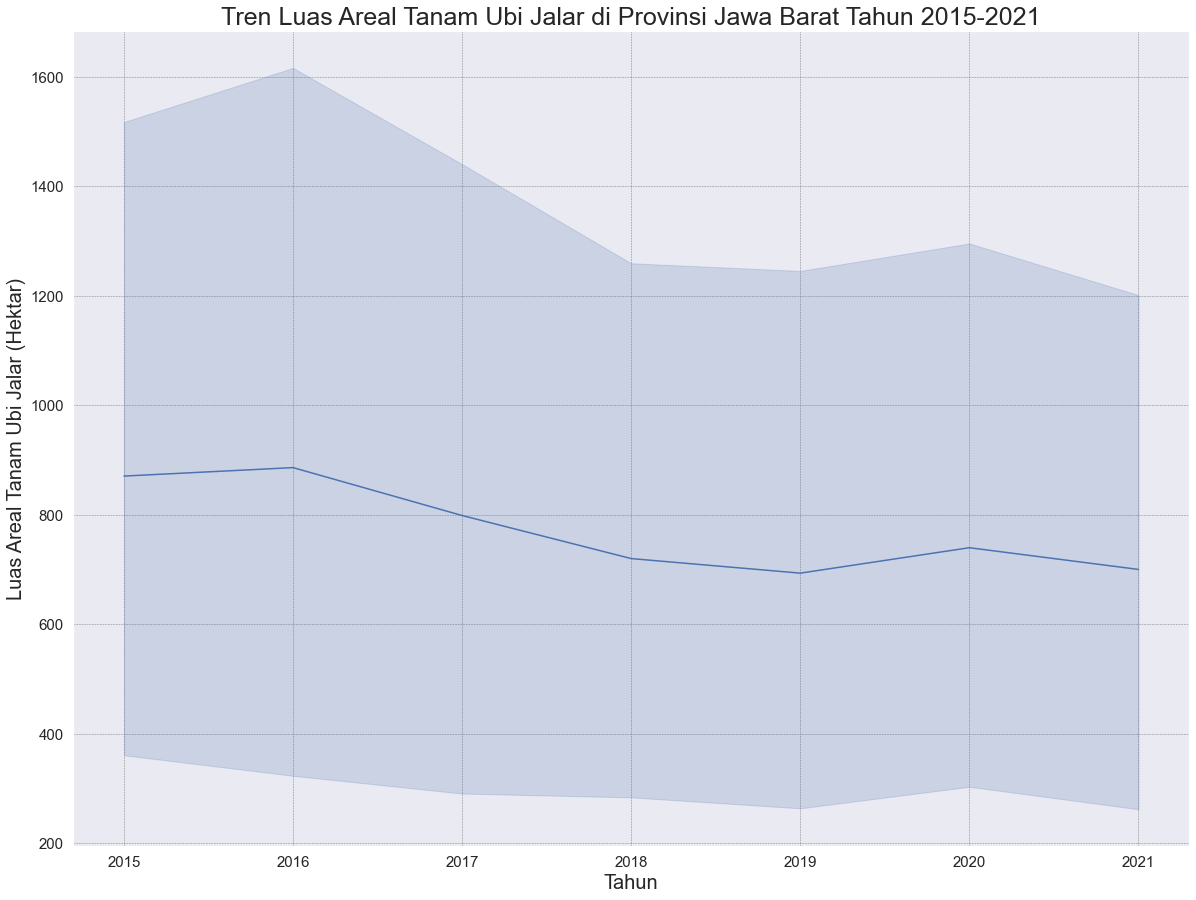

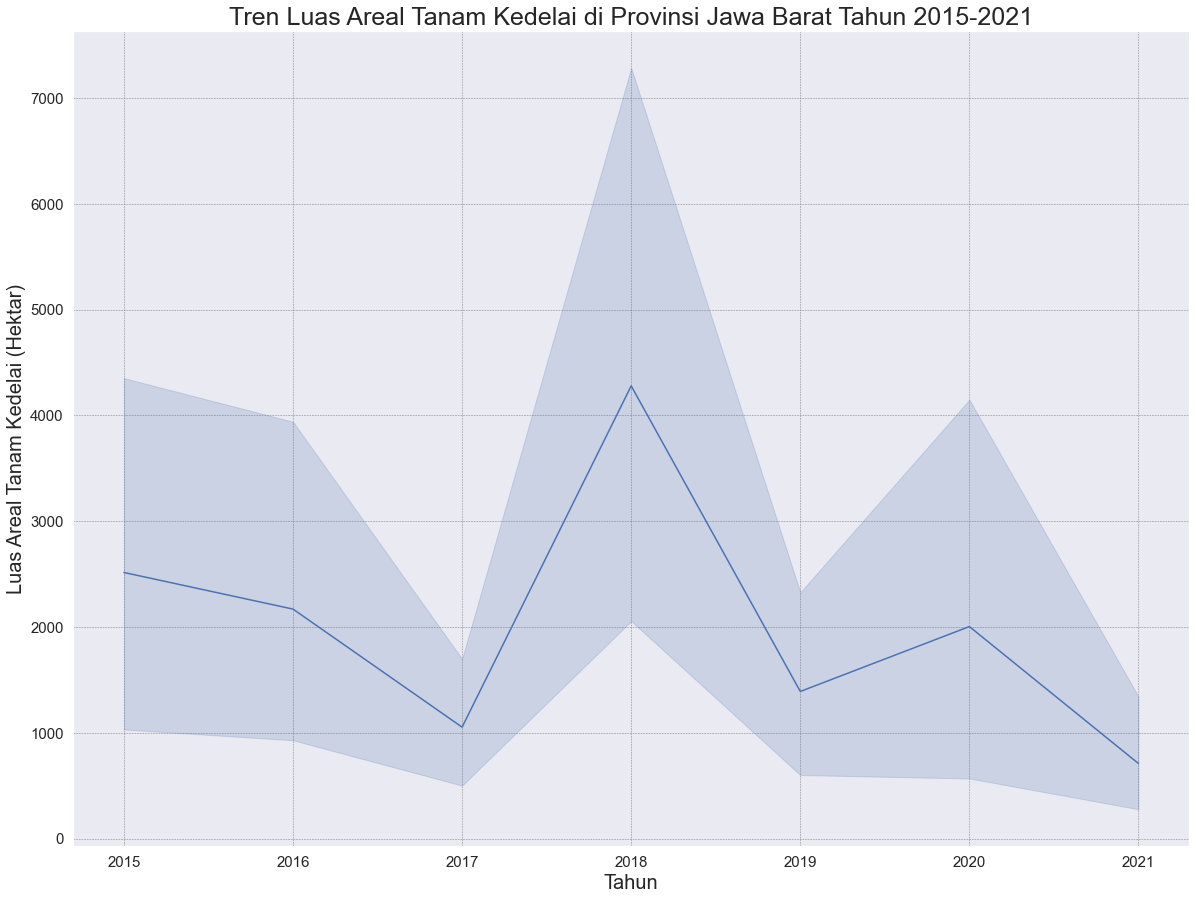

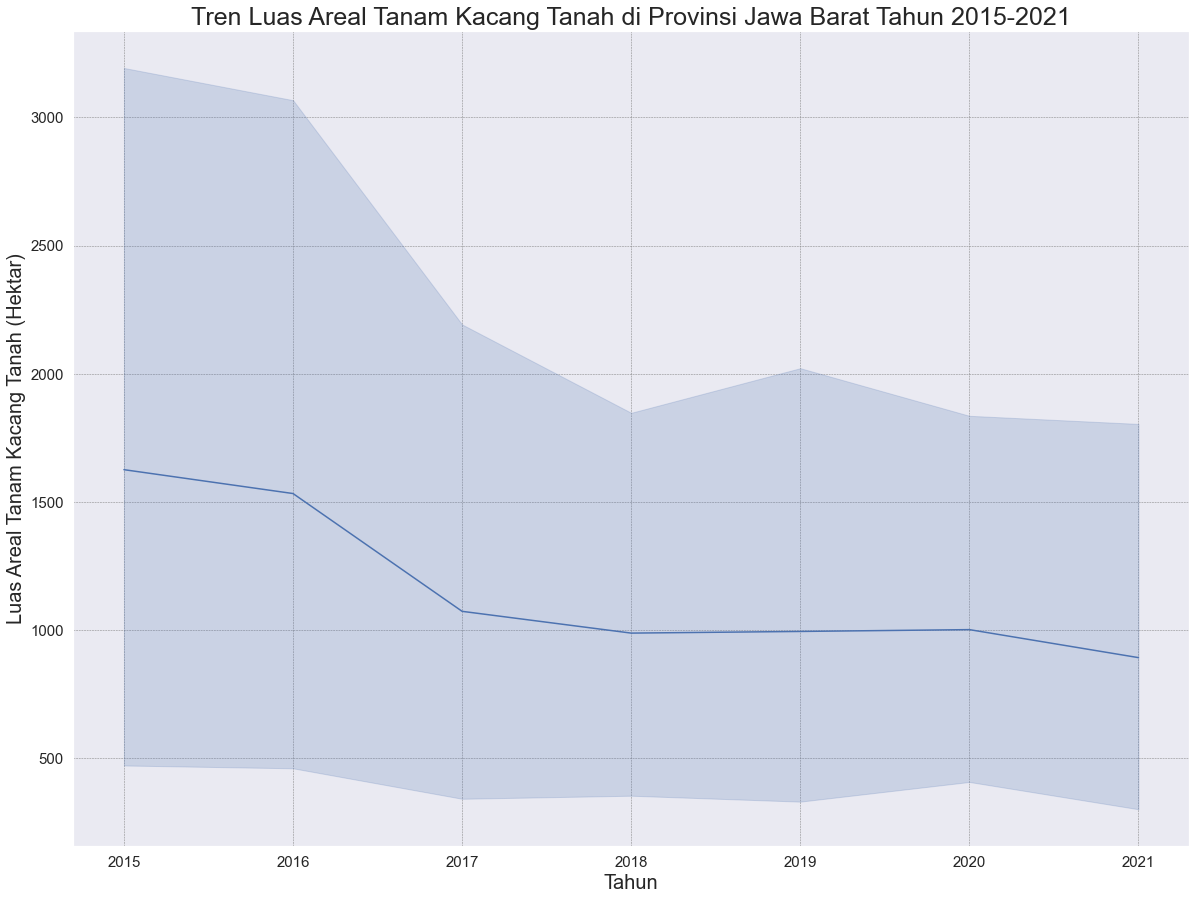

In [244]:
for col in data.columns[6:]:
  if 'luas_areal_tanam' in col:
    plotter.create_plot(col, 'Hektar', 'line')

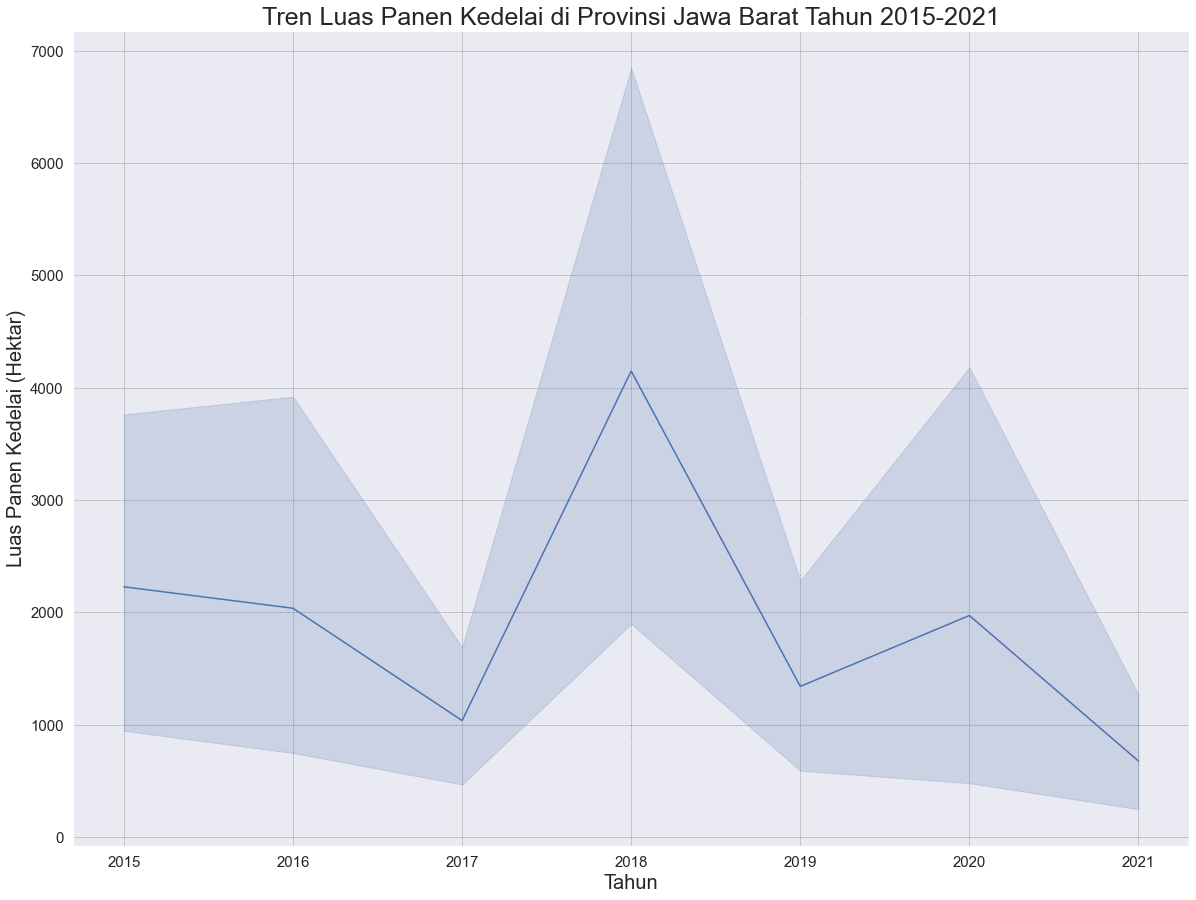

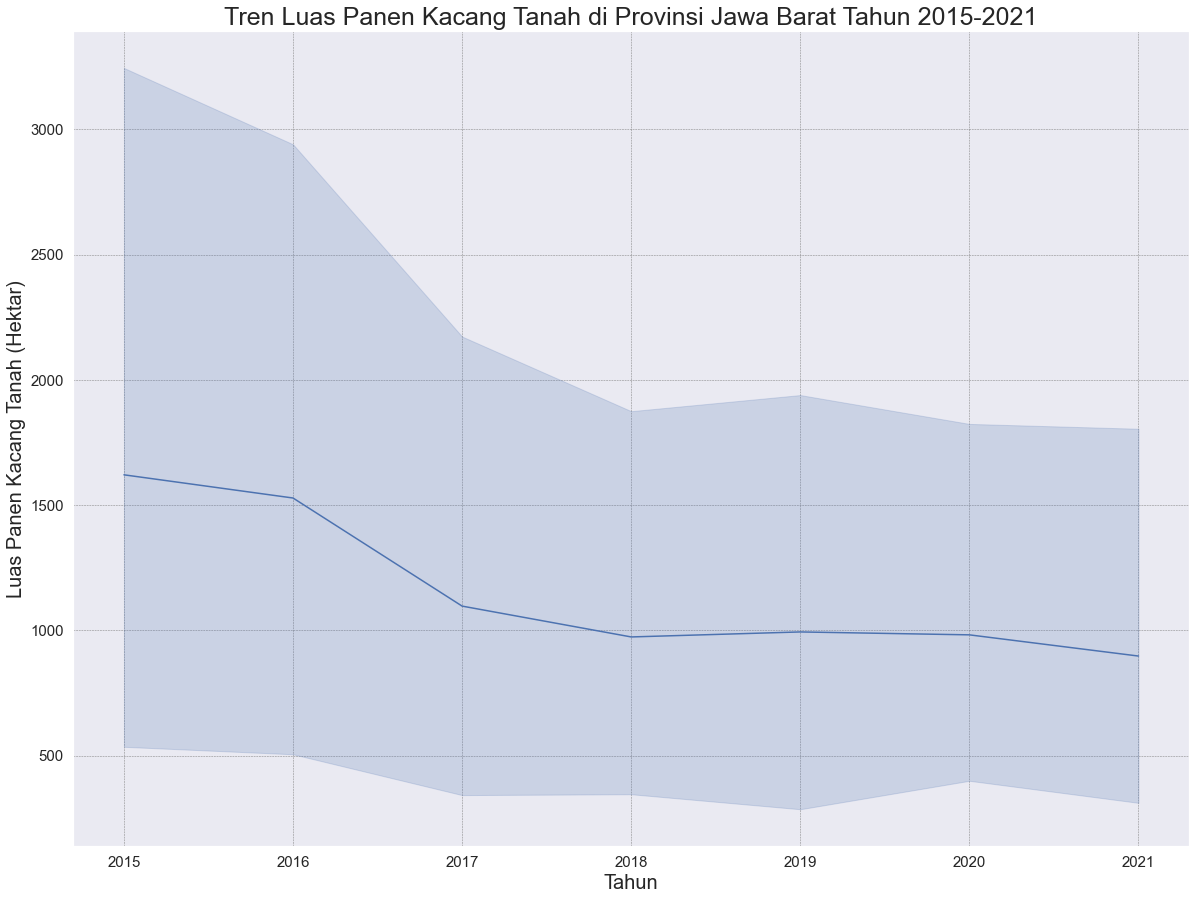

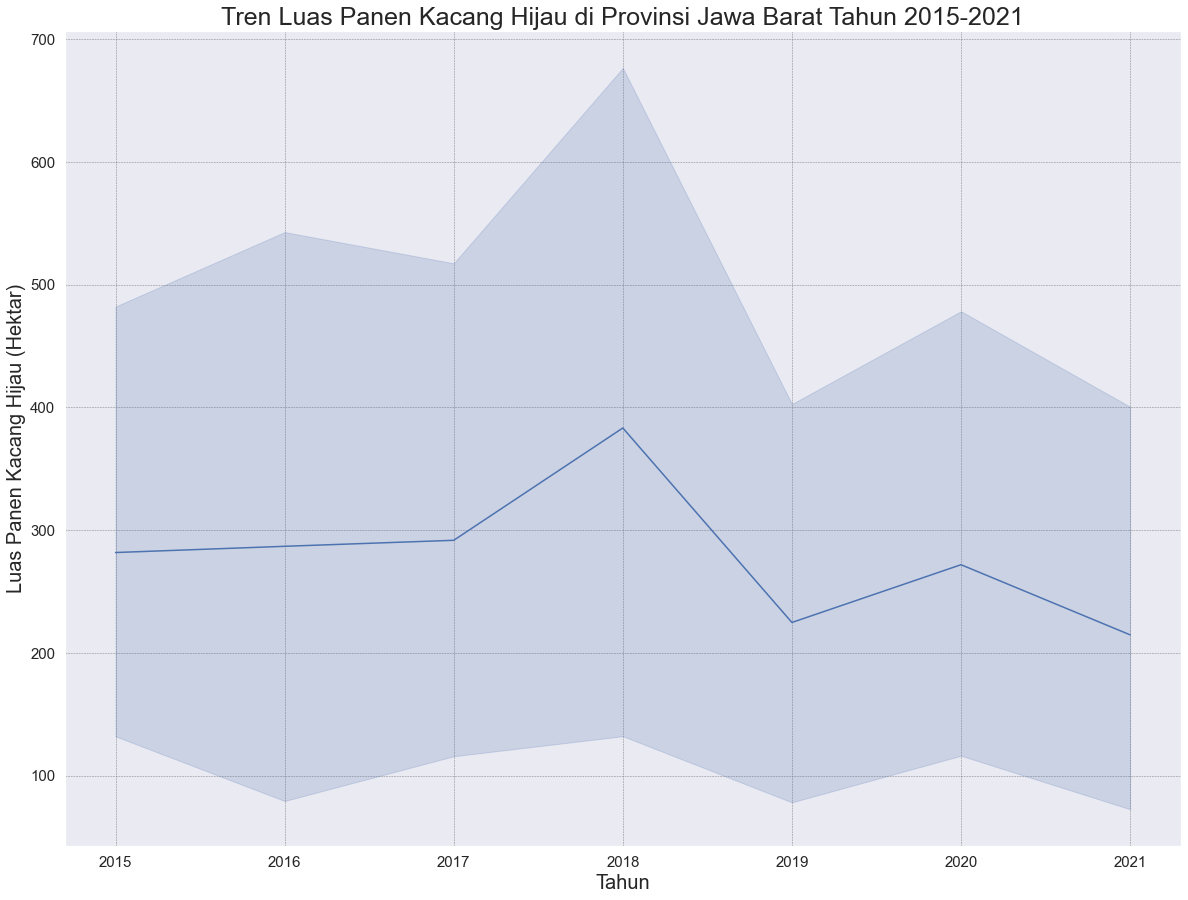

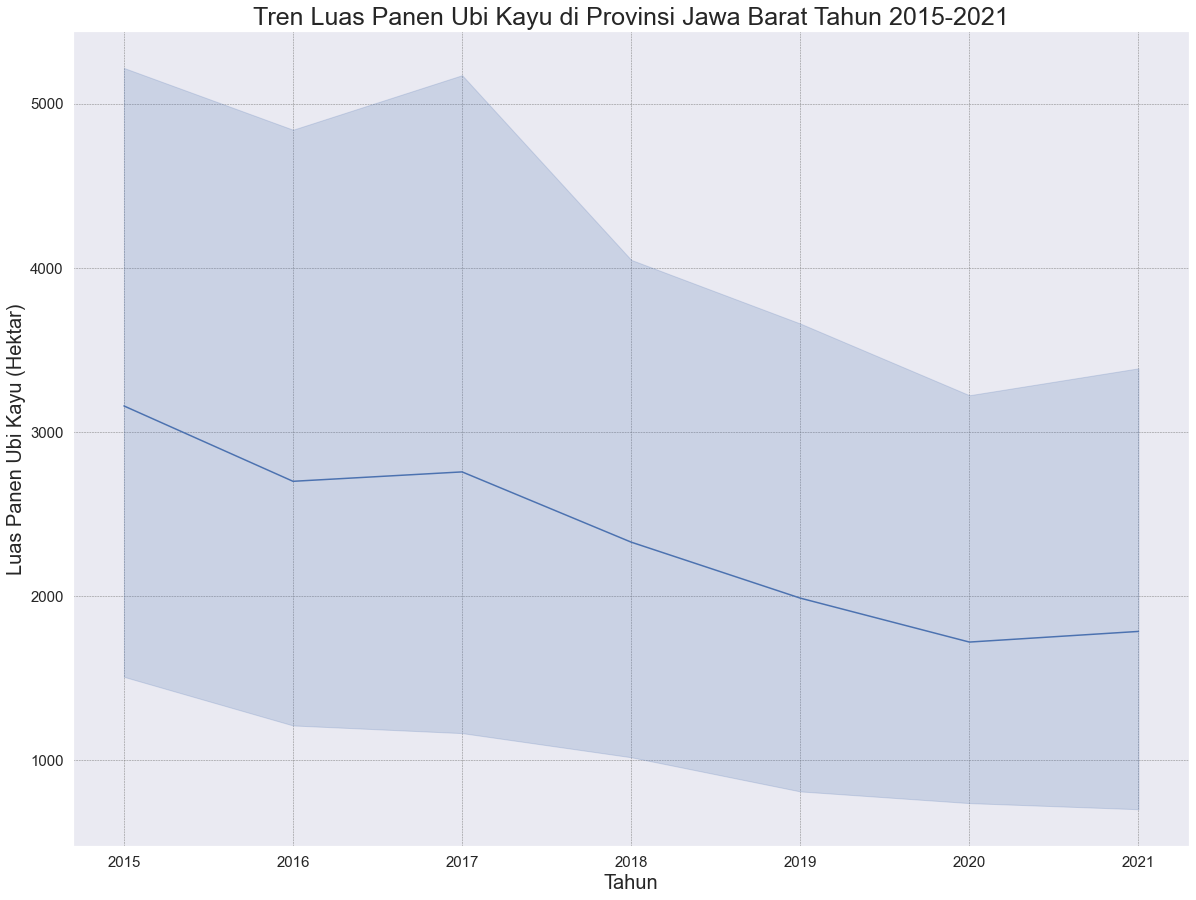

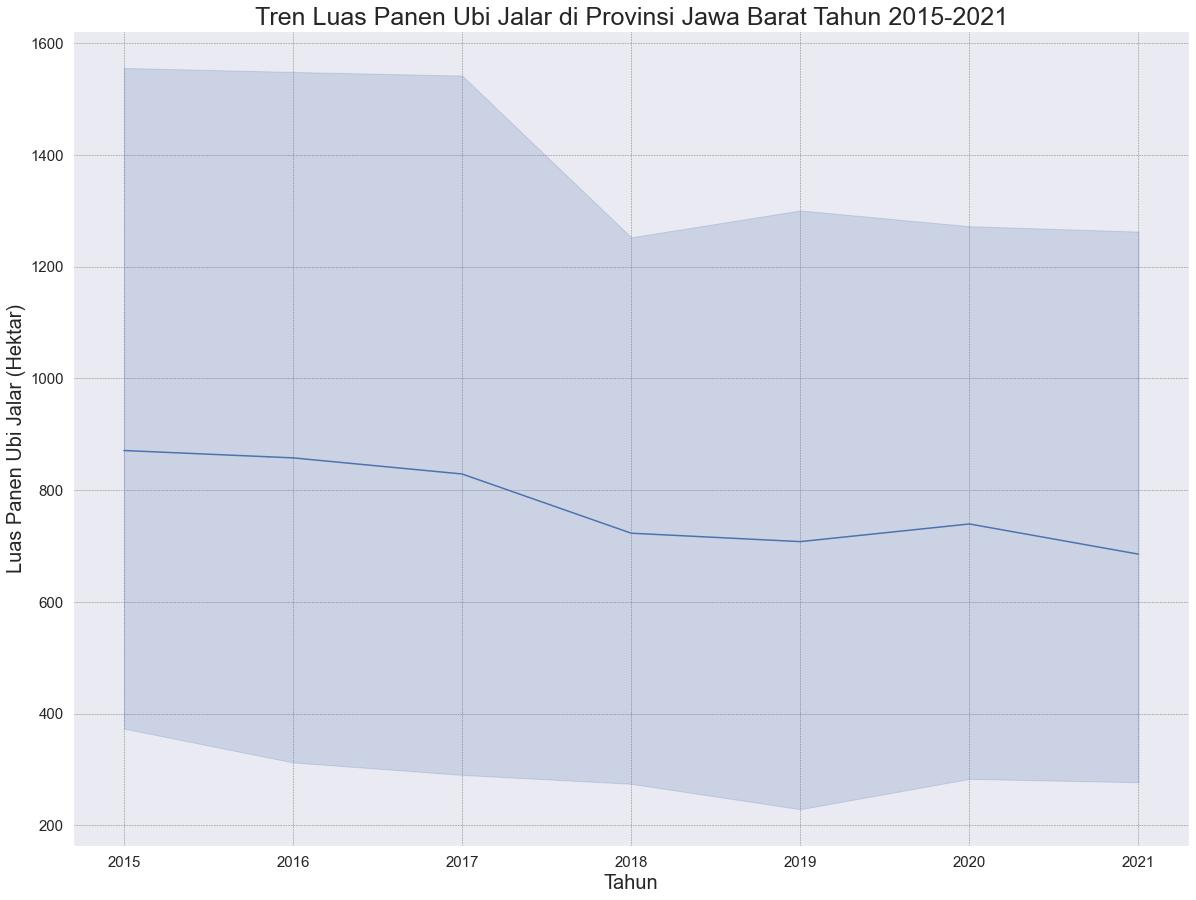

In [245]:
for col in data.columns[6:]:
  if 'luas_panen' in col:
    plotter.create_plot(col, 'Hektar', 'line')

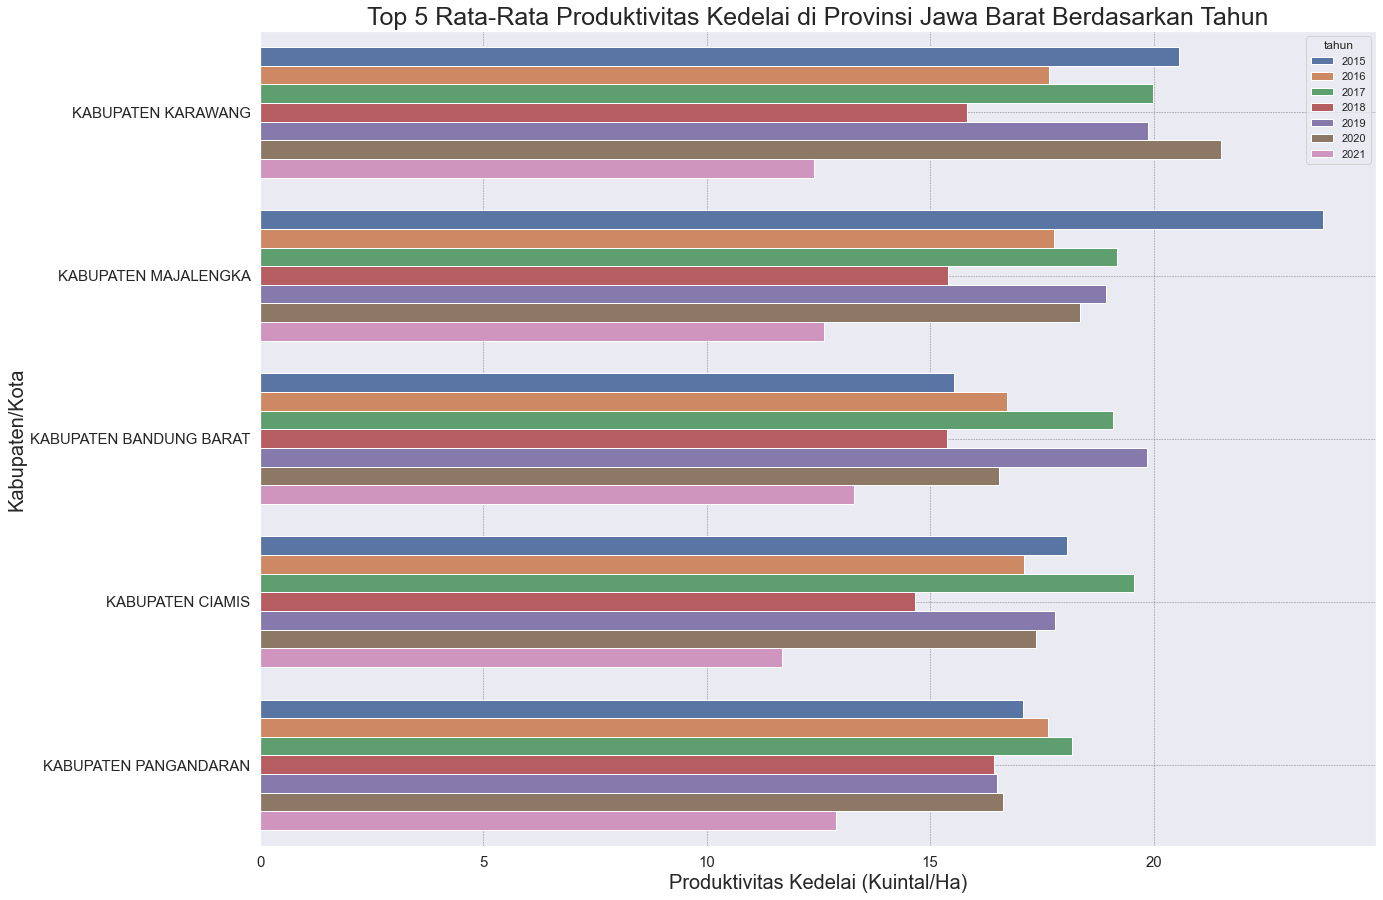

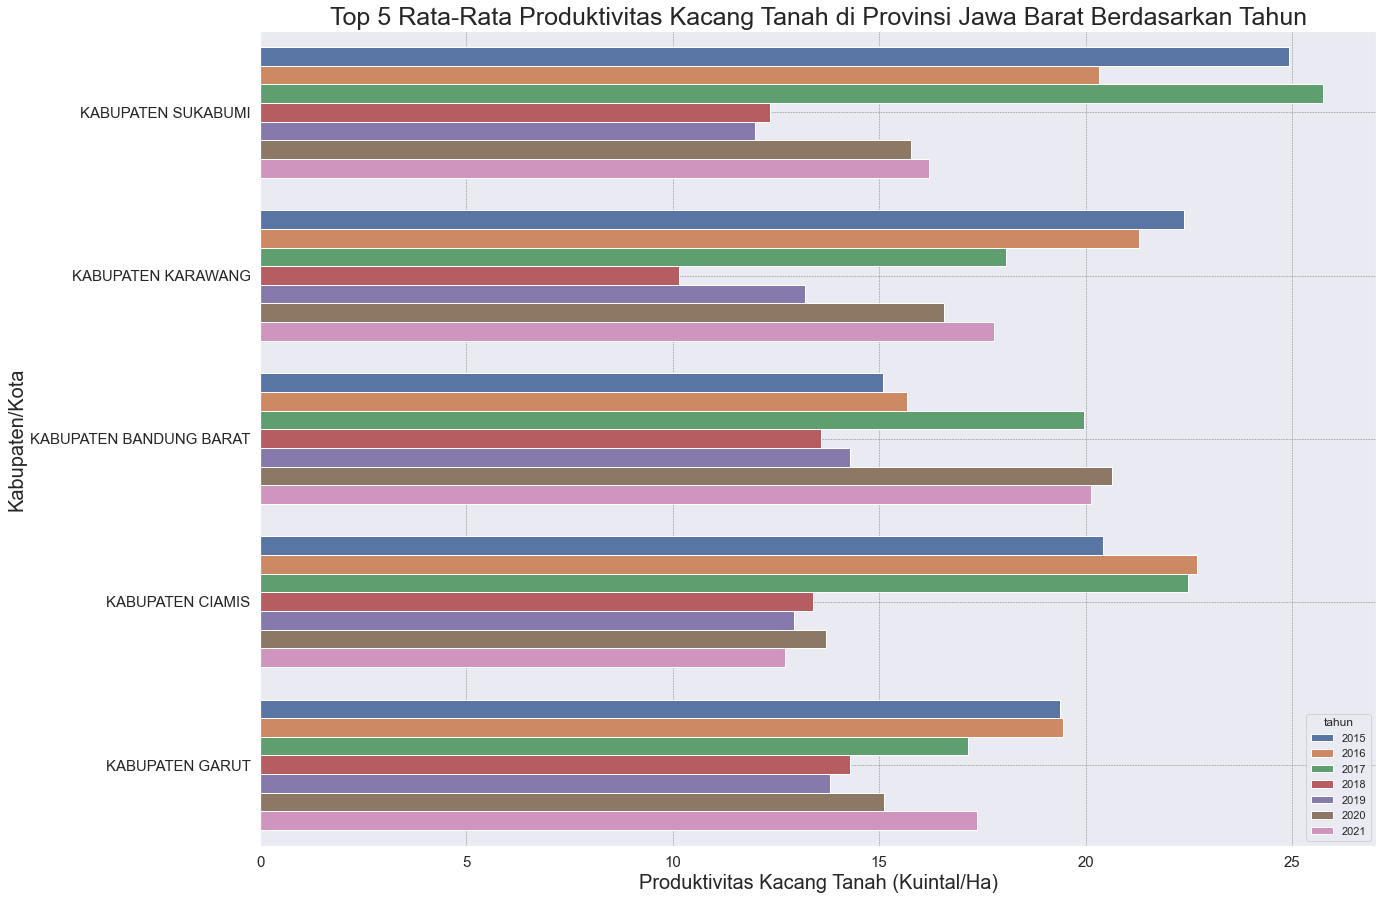

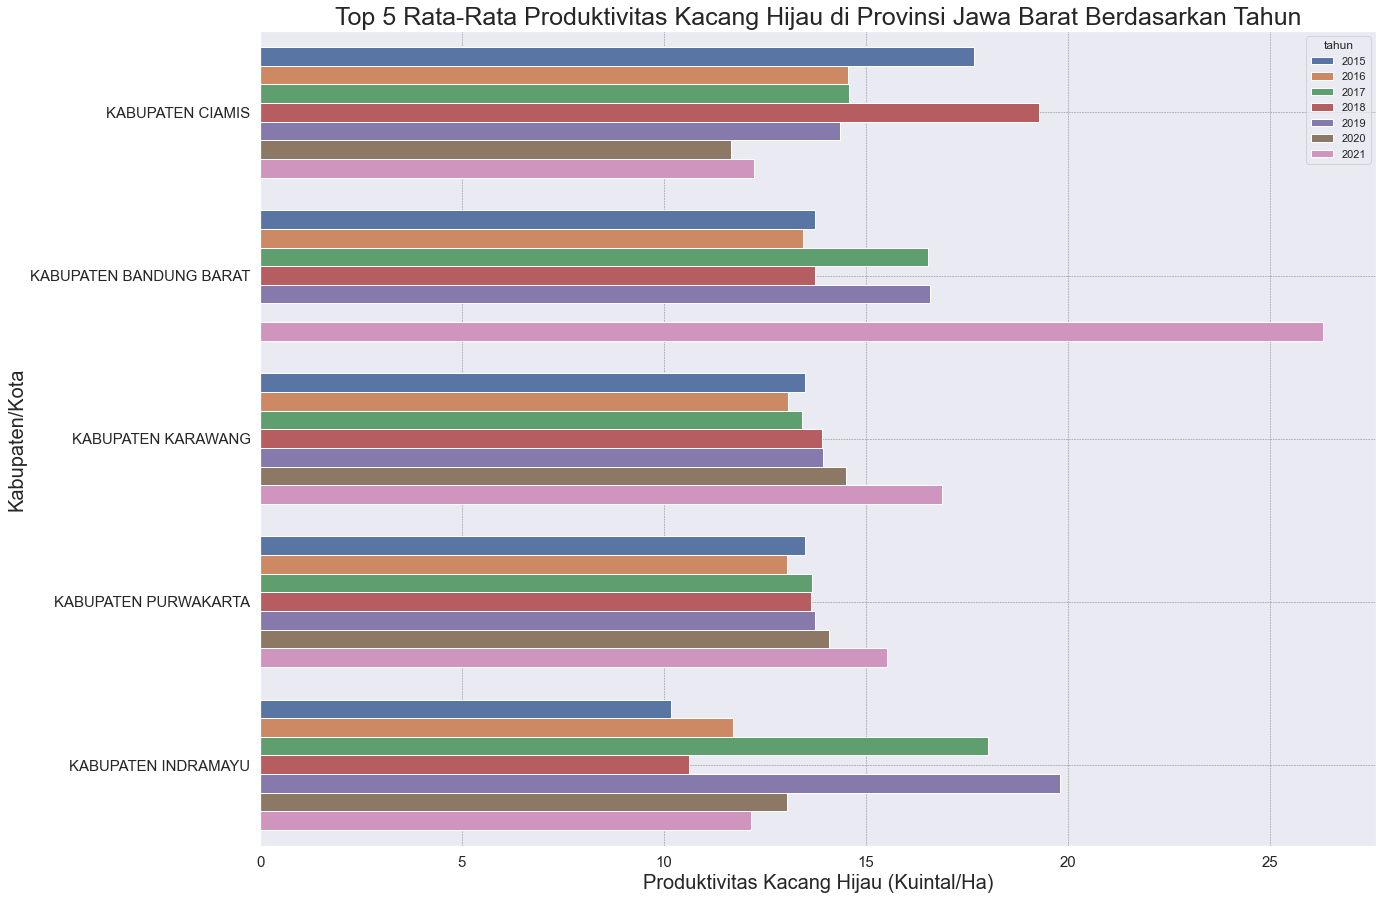

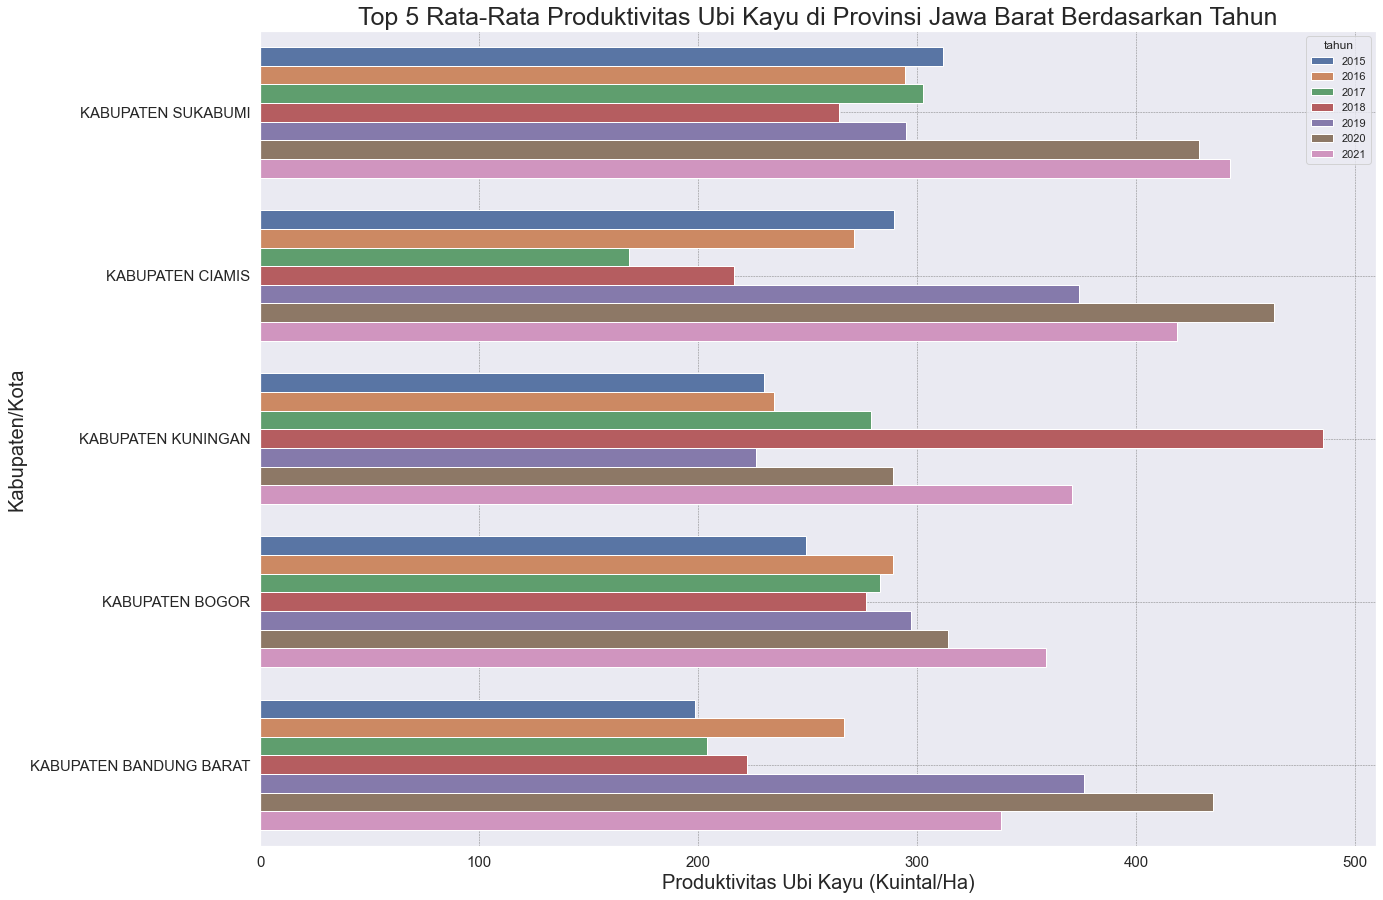

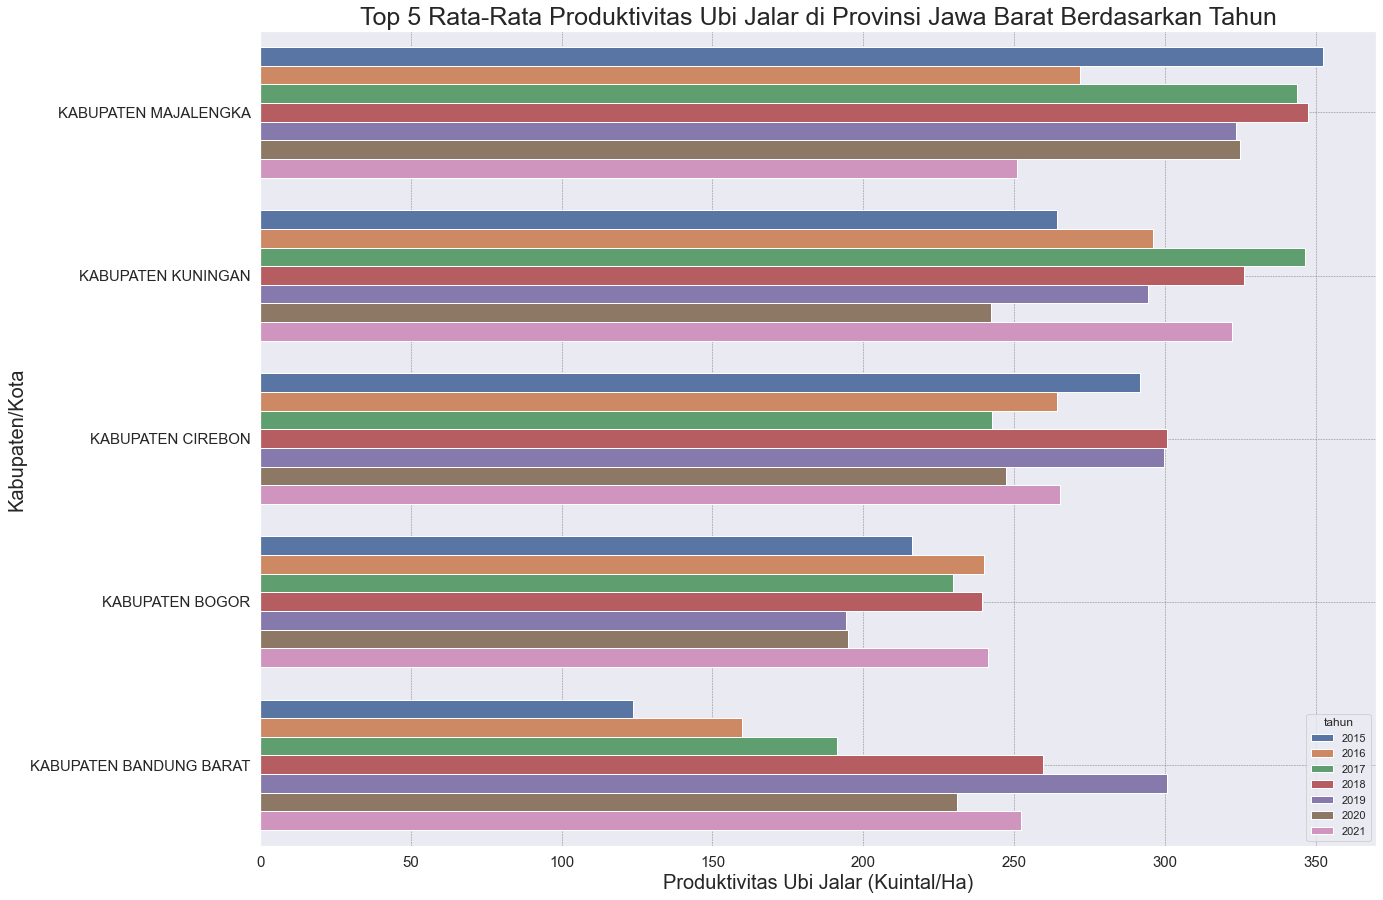

In [246]:
for col in data.columns[6:]:
  if 'produktivitas' in col:
    plotter.create_plot(col, 'Kuintal/Ha', 'grouped-bar')

# Unsupervised Learning Modelling

In [247]:
# scale data
scaler = StandardScaler()
data_numeric = data.groupby(by='nama_kabupaten_kota').mean(numeric_only=True).reset_index()
data_scaled = scaler.fit_transform(data_numeric.iloc[:, 5:])
data_scaled = pd.DataFrame(data_scaled, columns=data_numeric.columns[5:])
nama_kabupaten_kota = data_numeric['nama_kabupaten_kota']
data_scaled = pd.concat([nama_kabupaten_kota, data_scaled], axis=1)

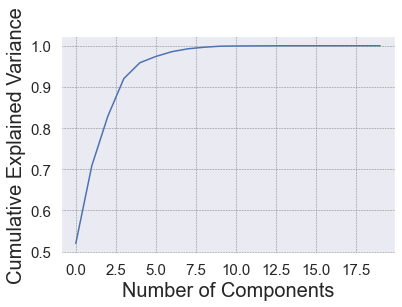

In [248]:
# do dimension reduction using PCA and find the best component
pca = PCA()
pca.fit(data_scaled.iloc[:, 1:])
# plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Cumulative Explained Variance', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

## 1. K-Means Clustering

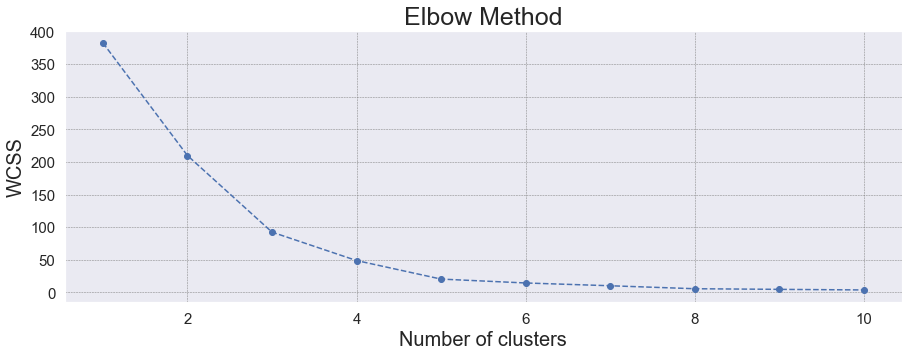

In [249]:
# reduce dimensionality with PCA
pca = PCA(n_components=2)
pca.fit(data_scaled.iloc[:, 1:])
data_pca = pca.transform(data_scaled.iloc[:, 1:])

# make kmeans model and determine k using elbow method
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data_pca)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method', fontsize=25)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


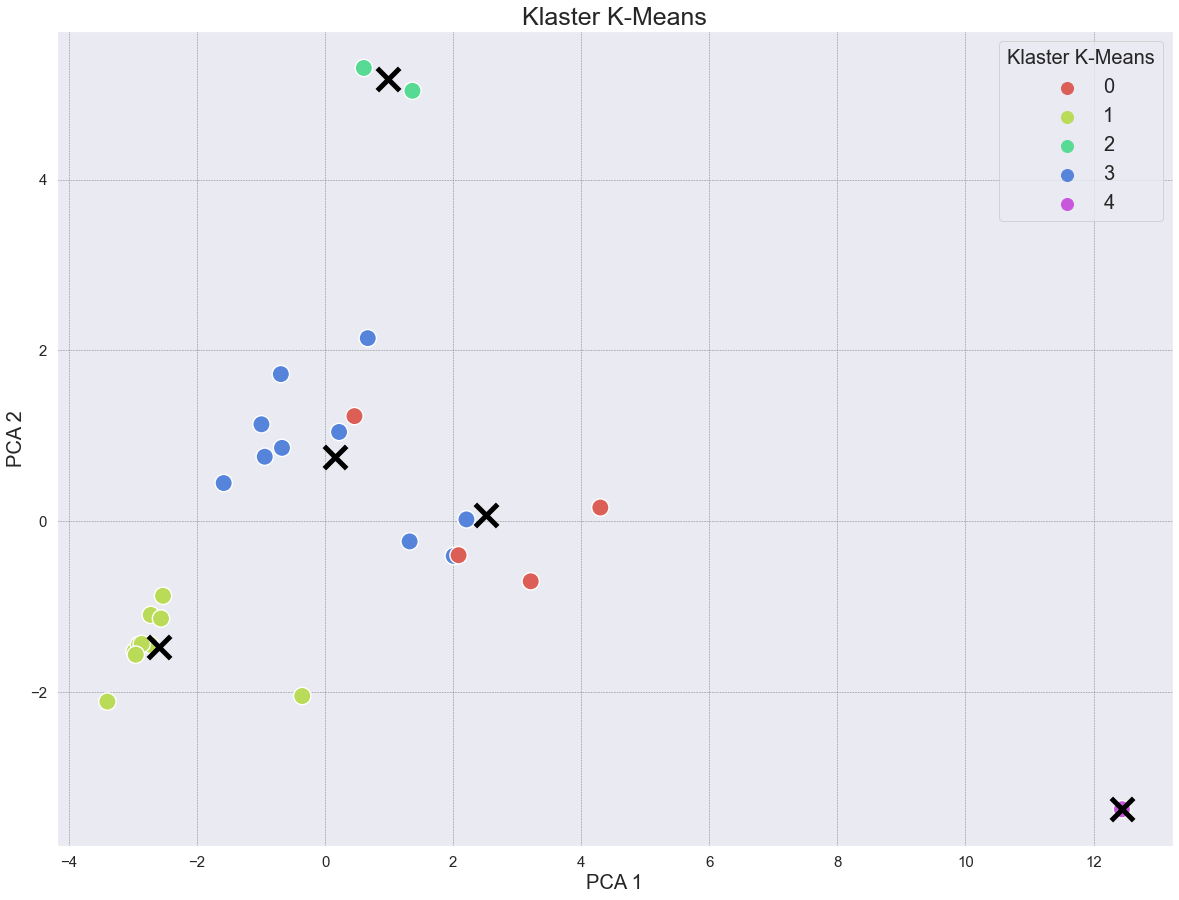

In [250]:
# make kmeans model with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# fit kmeans model
kmeans.fit_predict(data_scaled.iloc[:, 1:])

# add cluster column to data
data_klaster = data_scaled.copy()
data_klaster['klaster k-means'] = kmeans.labels_

# plot cluster
pca = PCA(n_components=2)
pca.fit(data_scaled.iloc[:, 1:])
data_pca = pca.transform(data_scaled.iloc[:, 1:])

plt.figure(figsize=(20, 15))
sns.scatterplot(
  x=data_pca[:, 0],
  y=data_pca[:, 1],
  hue=data_klaster['klaster k-means'],
  palette=sns.color_palette('hls', 5),
  s=300)

# # make center of cluster show in plot
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

plt.scatter(
  centers_pca[:, 0],
  centers_pca[:, 1],
  marker='x',
  s=500,
  linewidth=5,
  color='black')

plt.legend(title='Klaster K-Means', fontsize=20, markerscale=2, title_fontsize=20)
plt.title('Klaster K-Means', fontsize=25)
plt.xlabel('PCA 1', fontsize=20)
plt.ylabel('PCA 2', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

In [251]:
# calculate silhouette score
silhouette_score(data_scaled.iloc[:,1:], kmeans.labels_)

0.41504905119564633

## Fuzzy K-Means Clustering

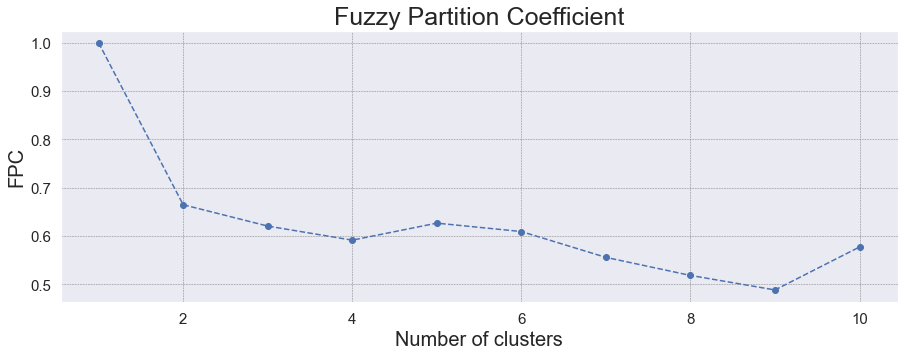

In [252]:
# make fuzzy c-means model and determine k using fuzzy partition coefficient
fpcs = []
for i in range(1, 11):
  cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.iloc[:, 1:].T, i, 2, error=0.005, maxiter=1000, init=None)
  fpcs.append(fpc)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), fpcs, marker='o', linestyle='--')
plt.title('Fuzzy Partition Coefficient', fontsize=25)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('FPC', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


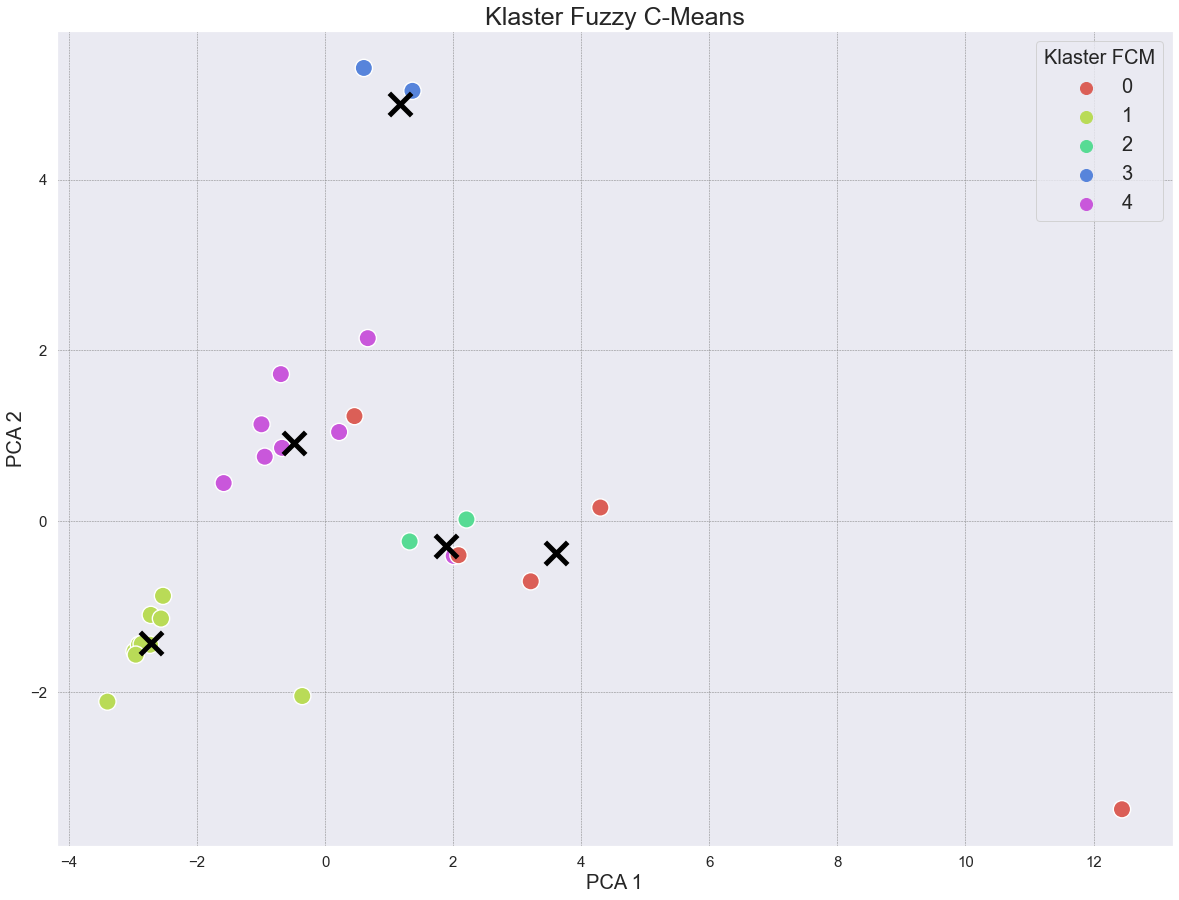

In [253]:
# make plot of fuzzy c-means model
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
  data_scaled.iloc[:,1:].values.T, 5, 2, error=0.005, maxiter=1000, init=None)

cluster_membership = np.argmax(u, axis=0)

# add cluster column to data
data_klaster['klaster fuzzy c-means'] = cluster_membership

# plot cluster
pca = PCA(n_components=2)

pca.fit(data_scaled.iloc[:, 1:])
data_pca = pca.transform(data_scaled.iloc[:, 1:])

plt.figure(figsize=(20, 15))
sns.scatterplot(
  x=data_pca[:, 0],
  y=data_pca[:, 1],
  hue=data_klaster['klaster fuzzy c-means'],
  palette=sns.color_palette('hls', 5),
  s=300)

# make center of cluster show in plot
centers = cntr
centers_pca = pca.transform(centers)

plt.scatter(
  centers_pca[:, 0],
  centers_pca[:, 1],
  marker='x',
  s=500,
  linewidth=5,
  color='black')

plt.legend(title='Klaster FCM', fontsize=20, markerscale=2, title_fontsize=20)
plt.title('Klaster Fuzzy C-Means', fontsize=25)
plt.xlabel('PCA 1', fontsize=20)
plt.ylabel('PCA 2', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

In [254]:
# calculate silhouette score
silhouette_score(data_scaled.iloc[:, 1:], cluster_membership)

0.39539712071405153

## 3. Hierarchical Clustering

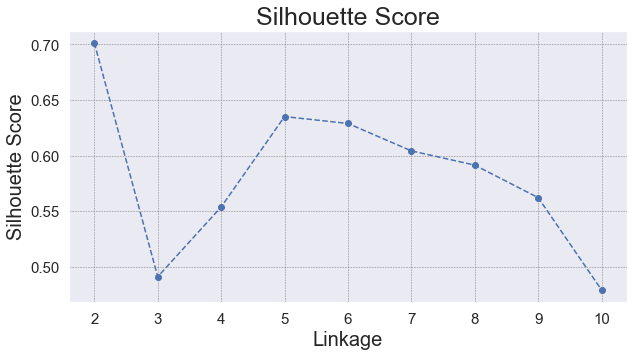

In [255]:
# find the best K silhouette score
silhouette = []

for i in range(2, 11):
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  cluster.fit_predict(data_pca)
  silhouette.append(silhouette_score(data_pca, cluster.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette, marker='o', linestyle='--')
plt.title('Silhouette Score', fontsize=25)
plt.xlabel('Linkage', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12104\3386577693.py:20: RuntimeWarning: Mean of empty slice.
  centers.append(data_pca[data_klaster['klaster agglomerative'] == i].mean(axis=0))
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


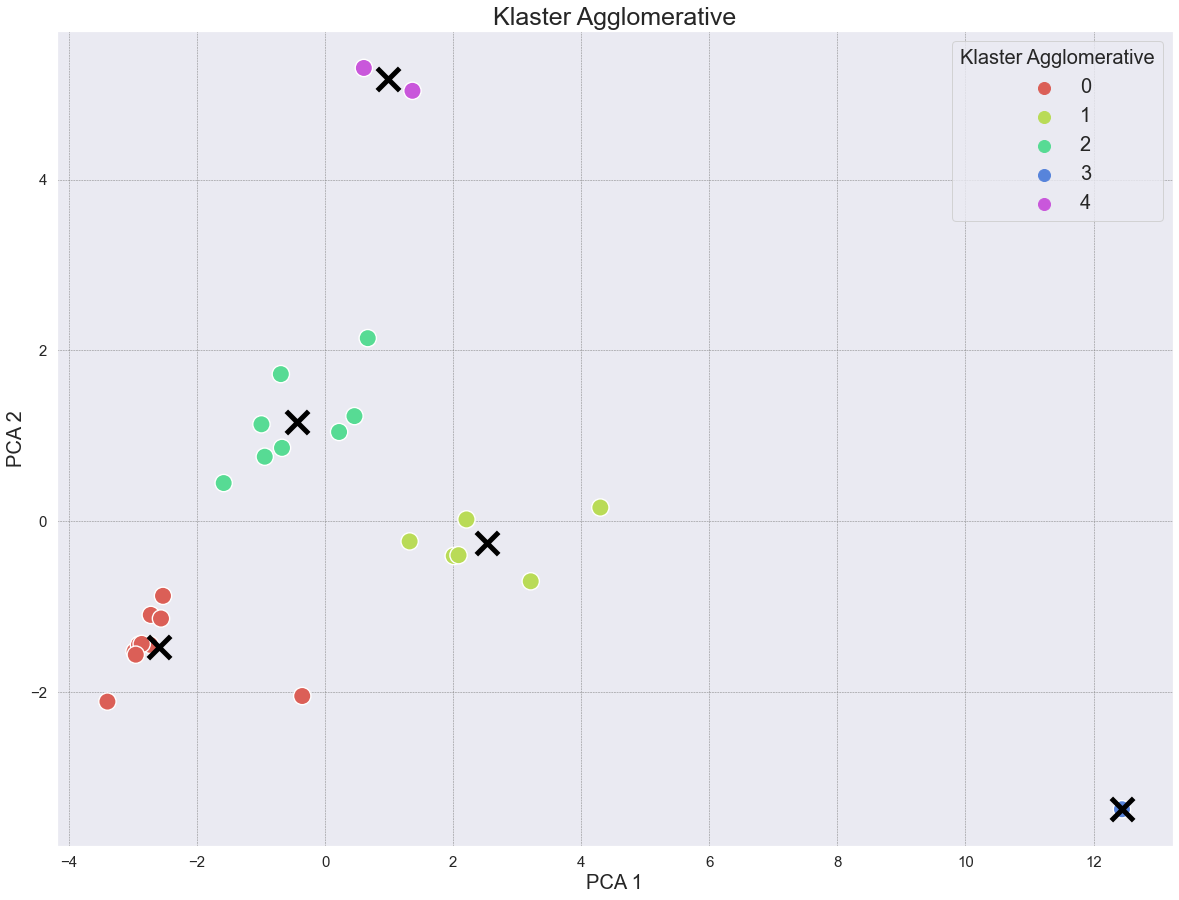

In [256]:
# make agglomerative clustering model
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglomerative.fit(data_pca)

# add cluster column to data
data_klaster['klaster agglomerative'] = agglomerative.labels_

# plot cluster
plt.figure(figsize=(20, 15))
sns.scatterplot(
  x=data_pca[:, 0],
  y=data_pca[:, 1],
  hue=data_klaster['klaster agglomerative'],
  palette=sns.color_palette('hls', 5),
  s=300)

# make center of cluster show in plot
centers = []
for i in range(6):
  centers.append(data_pca[data_klaster['klaster agglomerative'] == i].mean(axis=0))

centers = np.array(centers)

plt.scatter(
  centers[:, 0],
  centers[:, 1],
  marker='x',
  s=500,
  linewidth=5,
  color='black')

plt.legend(title='Klaster Agglomerative', fontsize=20, markerscale=2, title_fontsize=20)
plt.title('Klaster Agglomerative', fontsize=25)
plt.xlabel('PCA 1', fontsize=20)
plt.ylabel('PCA 2', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

In [257]:
# calculate silhouette score
silhouette_score(data_pca, agglomerative.labels_)

0.6350540998027306

## 4. Gaussian Mixture Model

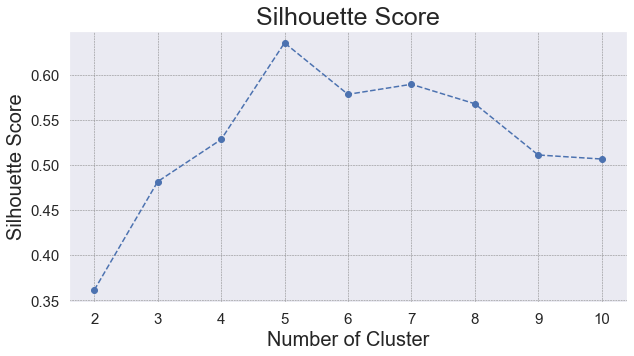

In [258]:
# find the best K silhouette score in gaussian mixture
silhouette = []

for i in range(2, 11):
  cluster = GaussianMixture(n_components=i)
  cluster.fit_predict(data_pca)
  silhouette.append(silhouette_score(data_pca, cluster.predict(data_pca)))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette, marker='o', linestyle='--')
plt.title('Silhouette Score', fontsize=25)
plt.xlabel('Number of Cluster', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12104\424449555.py:20: RuntimeWarning: Mean of empty slice.
  centers.append(data_pca[data_klaster['klaster gaussian'] == i].mean(axis=0))
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


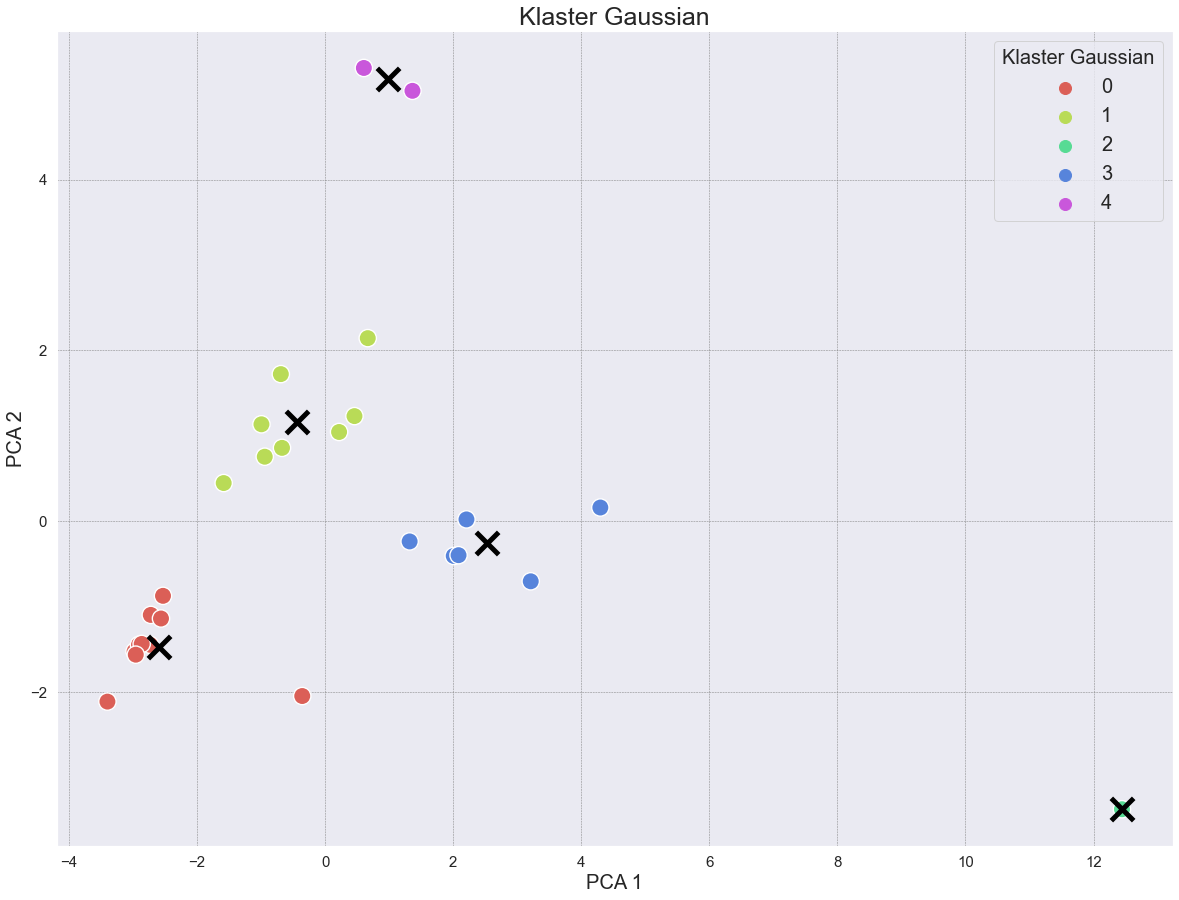

In [259]:
# make gaussian mixture model
gaussian = GaussianMixture(n_components=5)
gaussian.fit(data_pca)

# add cluster column to data
data_klaster['klaster gaussian'] = gaussian.predict(data_pca)

# plot cluster
plt.figure(figsize=(20, 15))
sns.scatterplot(
  x=data_pca[:, 0],
  y=data_pca[:, 1],
  hue=data_klaster['klaster gaussian'],
  palette=sns.color_palette('hls', 5),
  s=300)

# make center of cluster show in plot
centers = []
for i in range(6):
  centers.append(data_pca[data_klaster['klaster gaussian'] == i].mean(axis=0))

centers = np.array(centers)

plt.scatter(
  centers[:, 0],
  centers[:, 1],
  marker='x',
  s=500,
  linewidth=5,
  color='black')

plt.legend(title='Klaster Gaussian', fontsize=20, markerscale=2, title_fontsize=20)
plt.title('Klaster Gaussian', fontsize=25)
plt.xlabel('PCA 1', fontsize=20)
plt.ylabel('PCA 2', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.show()

In [260]:
# calculate silhouette score
silhouette_score(data_pca, gaussian.predict(data_pca))

0.6350540998027306

# Supervised Learning Modelling

## 1. Linear Regression

In [261]:
formula = 'luas_panen_ubi_kayu ~ luas_areal_tanam_ubi_kayu + produksi_ubi_kayu + produktivitas_ubi_kayu'
model = smf.ols(formula=formula, data=data).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     luas_panen_ubi_kayu   R-squared:                       0.989
Model:                             OLS   Adj. R-squared:                  0.989
Method:                  Least Squares   F-statistic:                     5446.
Date:                 Mon, 05 Dec 2022   Prob (F-statistic):          3.78e-180
Time:                         16:01:27   Log-Likelihood:                -1430.3
No. Observations:                  189   AIC:                             2869.
Df Residuals:                      185   BIC:                             2882.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

In [262]:
formula = 'luas_panen_ubi_jalar ~ luas_areal_tanam_ubi_jalar + produksi_ubi_jalar + produktivitas_ubi_jalar'
model = smf.ols(formula=formula, data=data).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     luas_panen_ubi_jalar   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 4.332e+04
Date:                  Mon, 05 Dec 2022   Prob (F-statistic):          4.60e-263
Time:                          16:01:27   Log-Likelihood:                -1027.2
No. Observations:                   189   AIC:                             2062.
Df Residuals:                       185   BIC:                             2075.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [263]:
formula = 'luas_panen_kedelai ~ luas_areal_tanam_kedelai + produksi_kedelai + produktivitas_kedelai'
model = smf.ols(formula=formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     luas_panen_kedelai   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.156e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          3.73e-210
Time:                        16:01:27   Log-Likelihood:                -1347.8
No. Observations:                 189   AIC:                             2704.
Df Residuals:                     185   BIC:                             2717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [264]:
formula = 'luas_panen_kacang_tanah ~ luas_areal_tanam_kacang_tanah + produksi_kacang_tanah + produktivitas_kacang_tanah'
model = smf.ols(formula=formula, data=data).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     luas_panen_kacang_tanah   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.356e+05
Date:                     Mon, 05 Dec 2022   Prob (F-statistic):          7.18e-309
Time:                             16:01:27   Log-Likelihood:                -1033.7
No. Observations:                      189   AIC:                             2075.
Df Residuals:                          185   BIC:                             2088.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [265]:
formula = 'luas_panen_kacang_hijau ~ luas_areal_tanam_kacang_hijau + produksi_kacang_hijau + produktivitas_kacang_hijau'
model = smf.ols(formula=formula, data=data).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     luas_panen_kacang_hijau   R-squared:                       0.985
Model:                                 OLS   Adj. R-squared:                  0.985
Method:                      Least Squares   F-statistic:                     4075.
Date:                     Mon, 05 Dec 2022   Prob (F-statistic):          1.19e-168
Time:                             16:01:27   Log-Likelihood:                -1061.8
No. Observations:                      189   AIC:                             2132.
Df Residuals:                          185   BIC:                             2145.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## 2. Support Vector Regressor

In [266]:
# make SVR model
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)

pipeline = make_pipeline(StandardScaler(), svr)
x = data.copy()[['luas_areal_tanam_ubi_kayu', 'produksi_ubi_kayu', 'produktivitas_ubi_kayu']]
y = data.copy()['luas_panen_ubi_kayu']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

# show equation of model
print(f'intercept: {pipeline.named_steps["svr"].intercept_}')
print(f'coef: {pipeline.named_steps["svr"].coef_}')

MAE: 254.6291310965529
R2: 0.9312416553707816
intercept: [2453.83611263]
coef: [[2483.3453837  2091.28391439  -12.65218675]]


In [267]:
# make SVR model
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)

pipeline = make_pipeline(StandardScaler(), svr)
x = data.copy()[['luas_areal_tanam_ubi_jalar', 'produksi_ubi_jalar', 'produktivitas_ubi_jalar']]
y = data.copy()['luas_panen_ubi_jalar']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

# show equation of model
print(f'intercept: {pipeline.named_steps["svr"].intercept_}')
print(f'coef: {pipeline.named_steps["svr"].coef_}')

MAE: 32.72782519910704
R2: 0.9945527447436772
intercept: [828.09477588]
coef: [[1.32278001e+03 2.30455931e+02 5.07180877e-01]]


In [268]:
# make SVR model
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)

pipeline = make_pipeline(StandardScaler(), svr)
x = data.copy()[['luas_areal_tanam_kedelai', 'produksi_kedelai', 'produktivitas_kedelai']]
y = data.copy()['luas_panen_kedelai']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

# show equation of model
print(f'intercept: {pipeline.named_steps["svr"].intercept_}')
print(f'coef: {pipeline.named_steps["svr"].coef_}')

MAE: 63.66968965122015
R2: 0.9960758559925447
intercept: [2084.98486072]
coef: [[2.28422660e+03 1.97454647e+03 1.18513554e-02]]


In [269]:
# make SVR model
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)

pipeline = make_pipeline(StandardScaler(), svr)
x = data.copy()[['luas_areal_tanam_kacang_tanah', 'produksi_kacang_tanah', 'produktivitas_kacang_tanah']]
y = data.copy()['luas_panen_kacang_tanah']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

# show equation of model
print(f'intercept: {pipeline.named_steps["svr"].intercept_}')
print(f'coef: {pipeline.named_steps["svr"].coef_}')

MAE: 33.023054863638514
R2: 0.991226885544438
intercept: [1314.41373938]
coef: [[ 1.95529624e+03  1.02881295e+03 -1.58297222e+00]]


In [270]:
# make SVR model
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)

pipeline = make_pipeline(StandardScaler(), svr)
x = data.copy()[['luas_areal_tanam_kacang_hijau', 'produksi_kacang_hijau', 'produktivitas_kacang_hijau']]
y = data.copy()['luas_panen_kacang_hijau']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

# show equation of model
print(f'intercept: {pipeline.named_steps["svr"].intercept_}')
print(f'coef: {pipeline.named_steps["svr"].coef_}')

MAE: 8.26388733714482
R2: 0.9933367678667687
intercept: [326.55274368]
coef: [[456.12240218 140.48071427  -0.76557778]]


In [271]:
data_klaster.to_csv('data_klaster.csv', index=False)